Importamos aquellas librerías que vamos a necesitar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Cargamos los ficheros

In [2]:
# Dataset con contenido potencialmente lgtbiq+fobico
file_path_orgullo = 'colectivo.csv'
# Dataset con contenido aleatorio en español
file_path_espanol = 'aleatorio.csv'

# cargamos ambos ficheros
df_espanol = pd.read_csv(file_path_espanol)
df_orgullo1 = pd.read_csv(file_path_orgullo)

In [3]:
# Filtrar las filas que contienen las palabras "transgenero", "trans", "travesti" o "travelo" en la columna 'texto_analisis'
palabras_clave = ['transfobia', 'transfobo', 'transfoba', 'transfobas', 'transfobos', 'transfobico', 'transfobicos', 'transfobica', 'transfobicas', 'transexual', 'transexuales', 'transgenero', 'transgeneros', 'trans', 'transes', 'travesti', 'travestis', 'travelo', 'travelos', 'travela', 'travelas', 'drag', 'drags', 'no binario', 'no binarios', 'no binarias', 'no binaria', 'no binarie', 'no binaries', 'genero fluido']
df_orgullo = df_orgullo1[df_orgullo1['texto_analisis'].str.contains('|'.join(palabras_clave), case=False, na=False)]

Modificamos el formato de la fecha para que nos sea más sencillo el estudio temporal

In [4]:
# Convertir la columna 'createdAt' a tipo datetime
df_orgullo['createdAt'] = pd.to_datetime(df_orgullo['createdAt'], errors='coerce')
df_espanol['createdAt'] = pd.to_datetime(df_espanol['createdAt'], errors='coerce')

# Crear una columna 'year' a partir de la columna 'createdAt'
df_orgullo['year'] = df_orgullo['createdAt'].dt.year
df_espanol['year'] = df_espanol['createdAt'].dt.year

C:\Users\mar\AppData\Local\Temp\ipykernel_15628\574891241.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orgullo['createdAt'] = pd.to_datetime(df_orgullo['createdAt'], errors='coerce')
C:\Users\mar\AppData\Local\Temp\ipykernel_15628\574891241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orgullo['createdAt'] = pd.to_datetime(df_orgullo['createdAt'], errors='coerce')
C:\Users\mar\AppData\Local\Temp\ipykernel_15628\574891241.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please 

En primer lugar observamos la cantidad de tuits para cada uno de los datasets a lo largo de los años

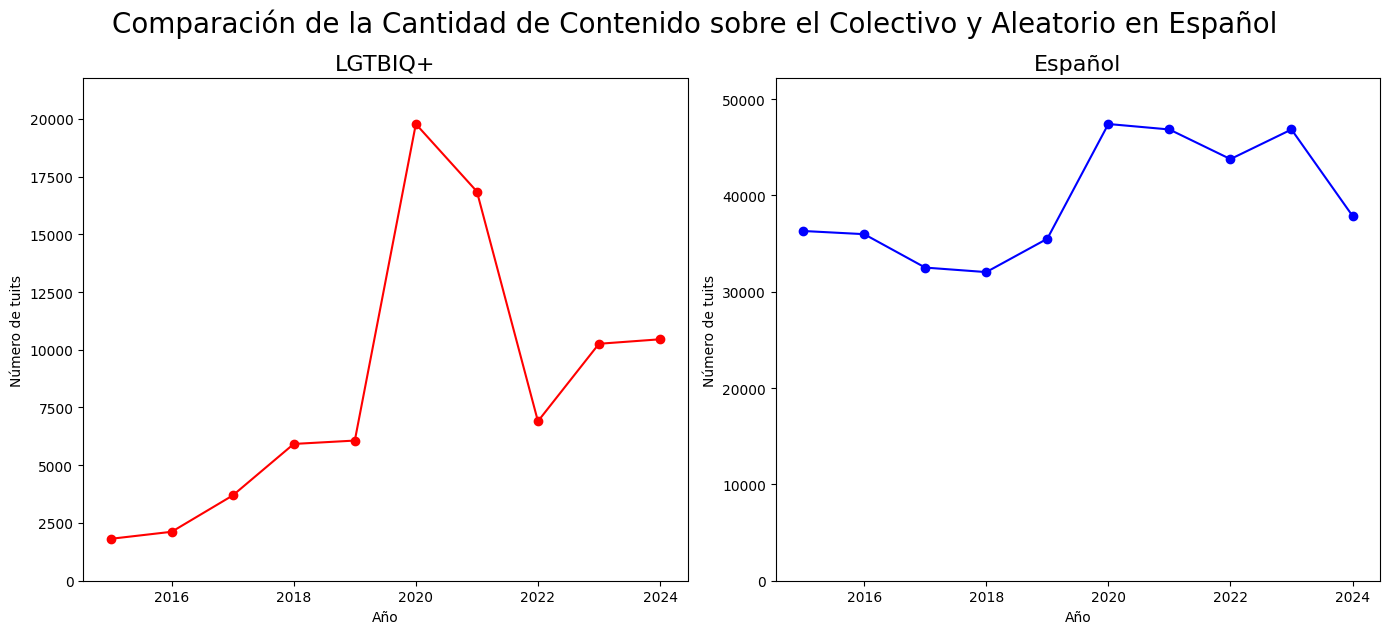

In [5]:
tuits_per_year_orgullo = df_orgullo.groupby('year').size()
tuits_per_year_espanol = df_espanol.groupby('year').size()

# Crear una figura con dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de df_orgullo (primer gráfico)
ax[0].plot(tuits_per_year_orgullo, marker='o', color='r')
ax[0].set_title("LGTBIQ+", fontsize=16)
ax[0].set_xlabel("Año")
ax[0].set_ylabel("Número de tuits")
ax[0].set_ylim(0, tuits_per_year_orgullo.max() * 1.1)  # Establecer el rango del eje Y

# Gráfico de df_espanol (segundo gráfico)
ax[1].plot(tuits_per_year_espanol, marker='o', color='b')
ax[1].set_title("Español", fontsize=16)
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Número de tuits")
ax[1].set_ylim(0, tuits_per_year_espanol.max() * 1.1)  # Establecer el rango del eje Y

# Ajustar el diseño y agregar un título general
plt.tight_layout()
plt.suptitle("Comparación de la Cantidad de Contenido sobre el Colectivo y Aleatorio en Español", fontsize=20, y=1.05)
plt.show()

## Tuits en contra del colectivo
Vamos a estudiar la cantidad de tuits que cumplen los distintos atributos (valor > 0.7) para cada año 

In [6]:
toxicity_threshold = 0.7

In [7]:
# Lista de columnas a verificar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Diccionario para almacenar los dataframes filtrados
df_filtered = {col: df_orgullo[df_orgullo[col] > toxicity_threshold] for col in toxicity_columns}

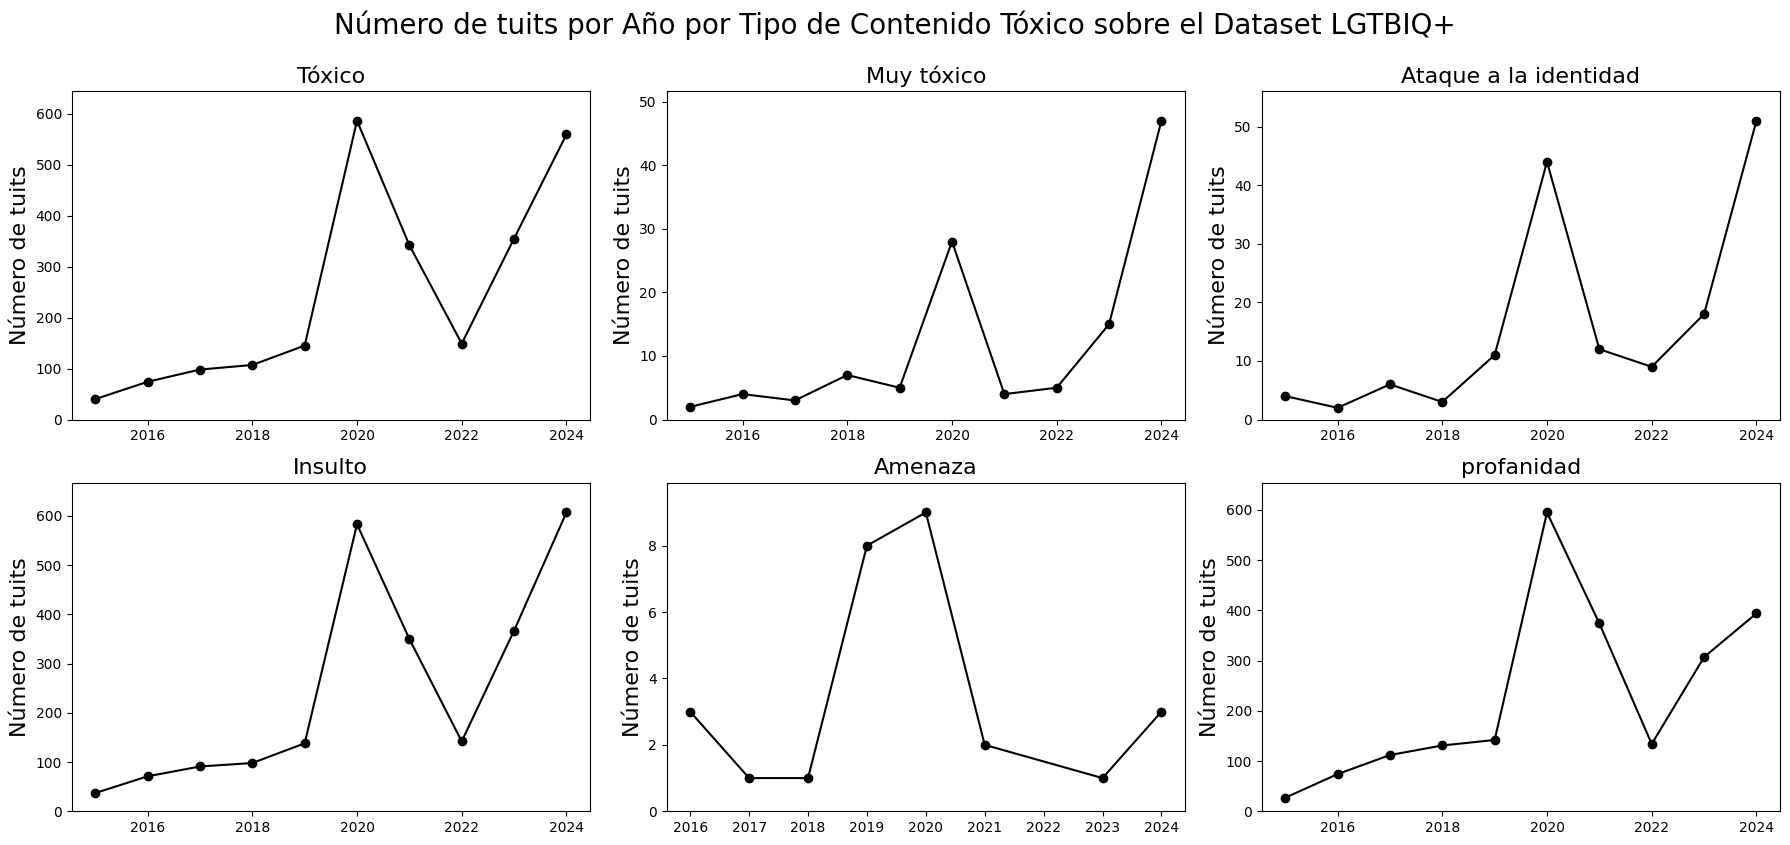

In [8]:
# Crear el diccionario con las proporciones de tuits por año
# Podríamos hacerlo directamente en el bucle de abajo, pero así queda más limpio
tuits_per_year = {
    key: df.groupby('year').size()
    for key, df in df_filtered.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='black')
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Número de tuits por Año por Tipo de Contenido Tóxico sobre el Dataset LGTBIQ+", fontsize=20, y=1.05)
plt.show()

ahora igual pero para el de contenido en español

In [9]:
# Diccionario para almacenar los dataframes filtrados
df_filtered_espanol = {col: df_espanol[df_espanol[col] > toxicity_threshold] for col in toxicity_columns}

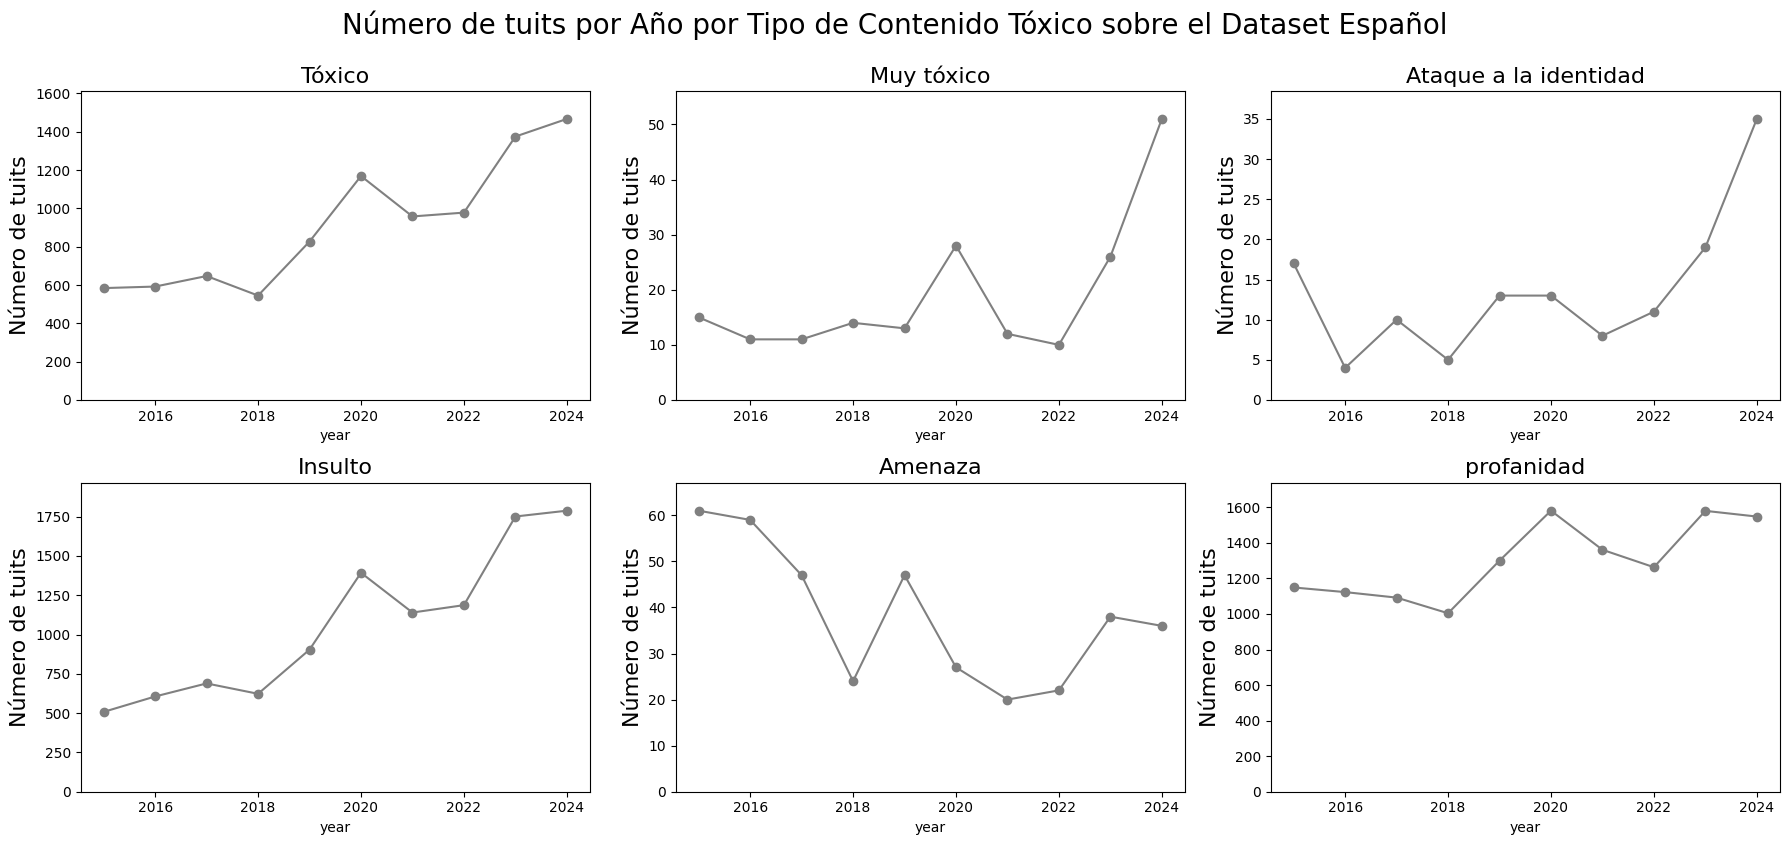

In [10]:
# Crear el diccionario con las proporciones de tuits por año
# Podríamos hacerlo directamente en el bucle de abajo, pero así queda más limpio
tuits_per_year_espanol = {
    key: df.groupby('year').size()
    for key, df in df_filtered_espanol.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year_espanol.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='gray')
    plt.title(titles[i], fontsize=16)
    #plt.xlabel("Año", fontsize=16)
    plt.ylabel("Número de tuits",fontsize=16)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Número de tuits por Año por Tipo de Contenido Tóxico sobre el Dataset Español", fontsize=20, y=1.05)
plt.show()

## Tuits a favor del colectivo
Vamos a estudiar la cantidad de tuits que cumplen los distintos atributos (valor > 0.7) para cada año 

In [11]:
not_toxicity_threshold = 0.05

# Diccionario para almacenar los dataframes filtrados
df_filtered_apoyo = {col: df_orgullo[df_orgullo[col] < not_toxicity_threshold] for col in toxicity_columns}

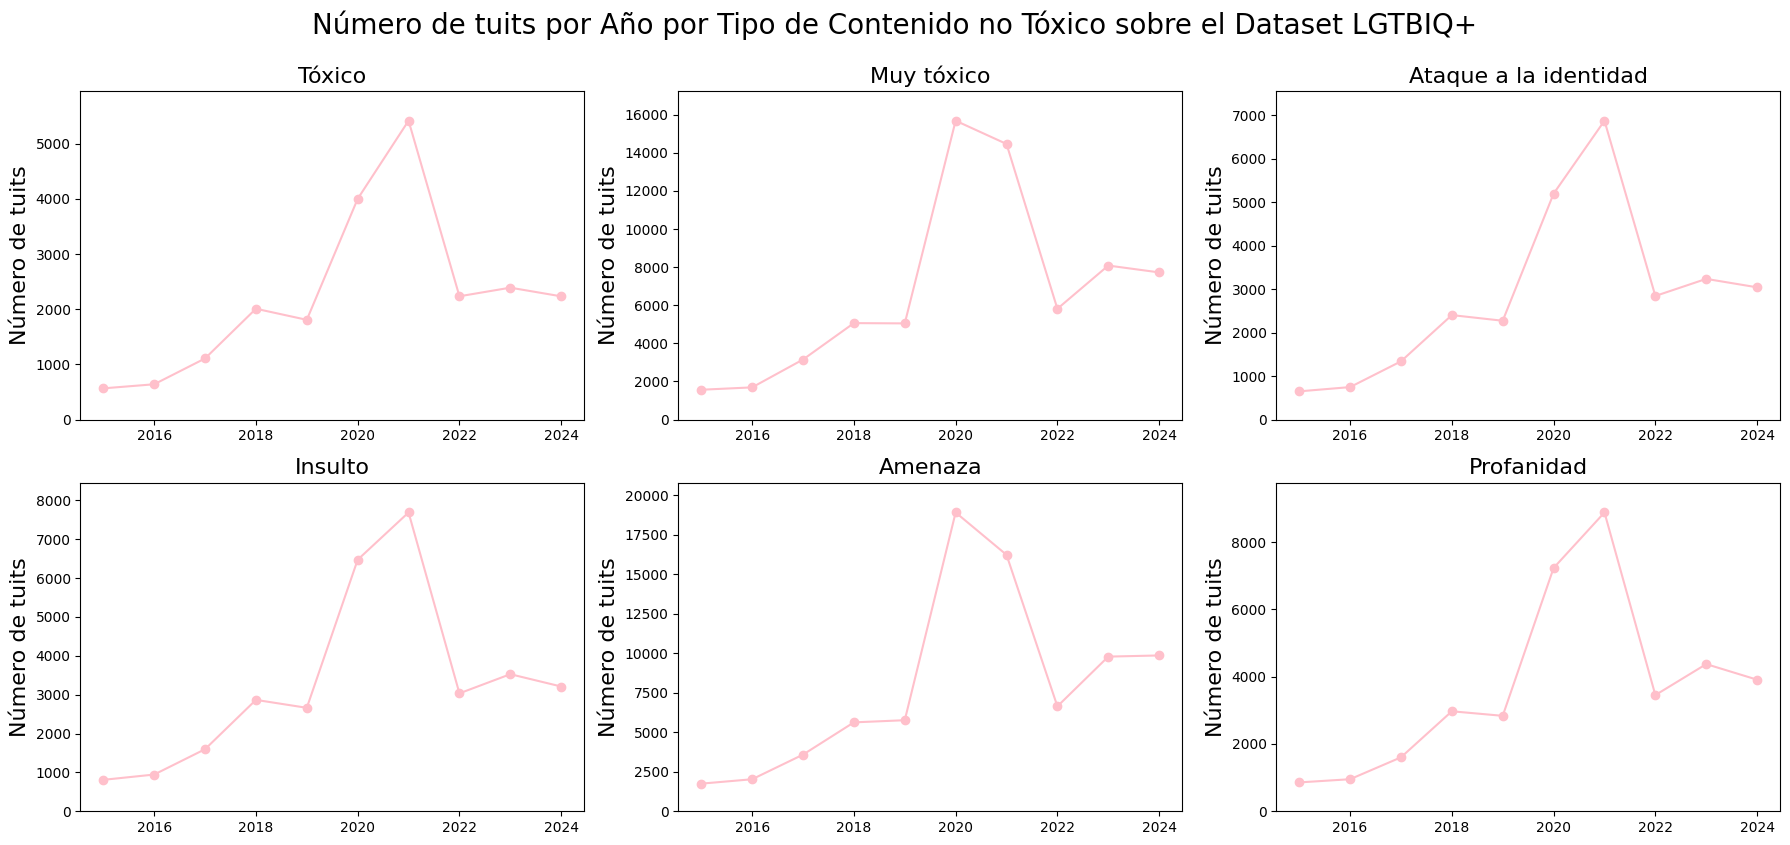

In [12]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size()
    for key, df in df_filtered_apoyo.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "Profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='pink')
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

plt.suptitle("Número de tuits por Año por Tipo de Contenido no Tóxico sobre el Dataset LGTBIQ+", fontsize=20, y=1.05)
# Mostrar el gráfico
plt.show()

Vamos a ver ahora los no tóxicos del dataset en español

In [13]:
not_toxicity_threshold = 0.1

# Diccionario para almacenar los dataframes filtrados
df_filtered_e_notox = {col: df_espanol[df_espanol[col] < not_toxicity_threshold] for col in toxicity_columns}

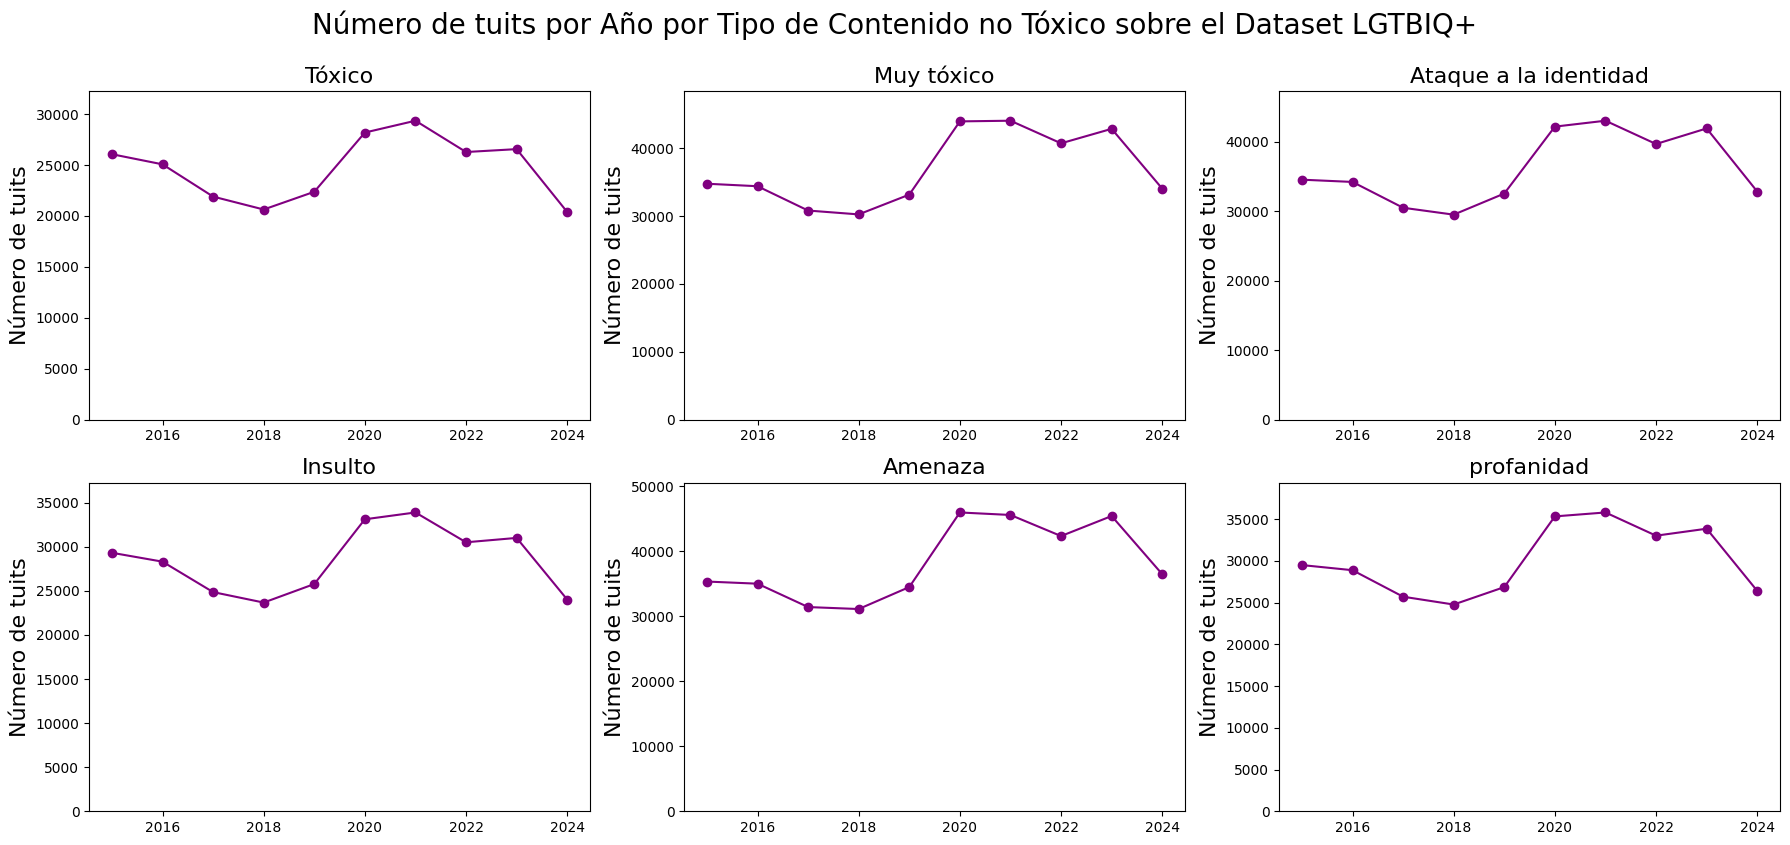

In [14]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size()
    for key, df in df_filtered_e_notox.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='purple')
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

plt.suptitle("Número de tuits por Año por Tipo de Contenido no Tóxico sobre el Dataset LGTBIQ+", fontsize=20, y=1.05)
# Mostrar el gráfico
plt.show()

# Estadísticamente significativos
El objetivo de este apartado es asegurarnos de que nuestros datos son estadísticamente significativos.
Para ello en primer lugar exploramos la cantidad de tuits del orgullo / español / tóxicos / no tóxicos que hay en cada uno de los periodos que hemos definido como cambios de políticas. Una vez observada que esta división tiene sentido, nos aseguramos que la cantidad de 'me gustas' 'retuits', así como los valores de los atributos de la Perspective API son independientes entre los periodos. Es decir, esto nos garantiza la diferencia entre los distintos periodos es estadísticamente significativa.

En primer lugar mostramos el valor de la toxicidad de los diferentes tuits a lo largo del tiempo, mostrando una mayor acumulación tanto en 2020 como en 2021 y 2022, sugiriendo que nuestra hipótesis será cierta

In [15]:
media = df_orgullo['toxicity'].mean()

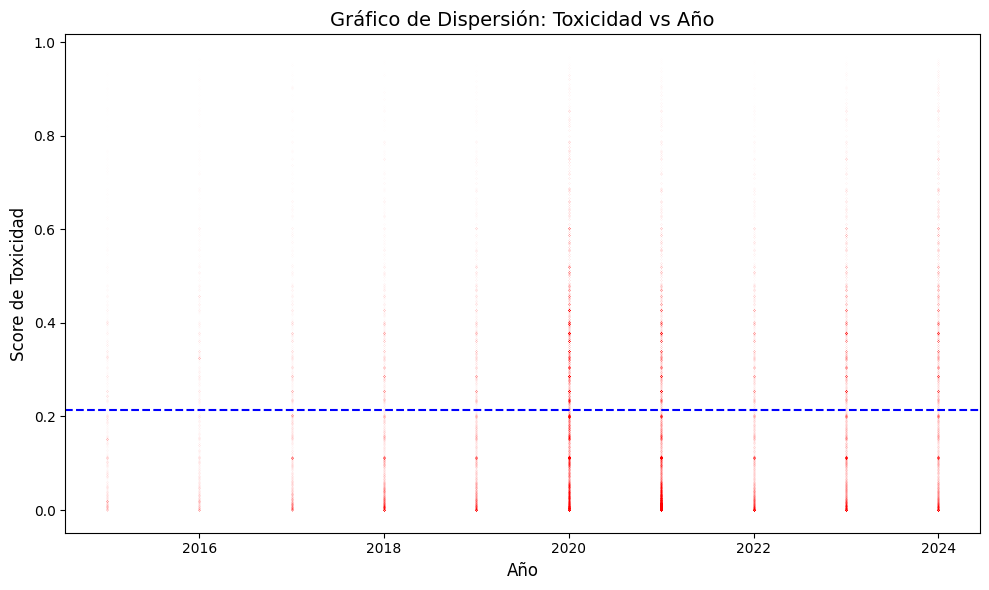

In [16]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_orgullo['year'], df_orgullo['toxicity'], color='red', s=0.000004, alpha = 0.5)

# Títulos y etiquetas
plt.title('Gráfico de Dispersión: Toxicidad vs Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Score de Toxicidad', fontsize=12)

# Dibujar la línea discontinua en la media de toxicidad
plt.axhline(y=media, color='b', linestyle='--', label=f'Media de Toxicidad: {media:.2f}')

# Mejorar los márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()

In [17]:
# Filtrar los datos para los tuits que tienen toxicidad mayor a 0.7
df_filtered_toxicity = df_filtered['toxicity']
df_identity_attack = df_filtered['identity_attack']

In [18]:
# Preparar los datos para Kruskal-Wallis (obtenemos los tuits por año)
data_for_kruskal = [df_filtered_toxicity[df_filtered_toxicity['year'] == year]['toxicity']
                    for year in range(2015,2025)]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los años en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los años en términos de toxicidad.")


Estadística H: 25.26188201584829
Valor p: 0.002694742853008019
Existen diferencias significativas entre los años en términos de toxicidad.


In [19]:
# Preparar los datos para Kruskal-Wallis (obtenemos los tuits por año)
data_for_kruskal = [df_filtered_toxicity[df_filtered_toxicity['year'] == year]['toxicity']
                    for year in range(2015,2025)]

# Realizar el test de Kruskal-Wallis
stats.kruskal(*data_for_kruskal)

KruskalResult(statistic=25.26188201584829, pvalue=0.002694742853008019)

In [20]:
# Agrupar los datos por año
tuits_per_year = df_filtered_toxicity.groupby('year')['toxicity'].apply(list)

# Crear las listas para la prueba de Kruskal-Wallis
data_for_kruskal = [
    [len(tuits_per_year.loc[2015]), len(tuits_per_year.loc[2016]), len(tuits_per_year.loc[2017]), len(tuits_per_year.loc[2018]), len(tuits_per_year.loc[2019])],  # 2015-2019
    [len(tuits_per_year.loc[2020])],  # 2020
    [len(tuits_per_year.loc[2021]), len(tuits_per_year.loc[2022])],  # 2021-2022
    [len(tuits_per_year.loc[2023]), len(tuits_per_year.loc[2024])]  # 2023-2024
]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los periodos en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los periodos en términos de toxicidad.")



Estadística H: 7.799999999999997
Valor p: 0.05033109785985342
No hay diferencias significativas entre los periodos en términos de toxicidad.


In [21]:
# Agrupar los datos por año
tuits_per_year = (df_filtered_toxicity.groupby('year').size() / df_orgullo.groupby('year').size())

# Crear las listas para la prueba de Kruskal-Wallis
data_for_kruskal = [
    [tuits_per_year[2015], tuits_per_year[2016], tuits_per_year[2017], tuits_per_year[2018], tuits_per_year[2019]],  # 2015-201
    [tuits_per_year[2020]],  # 2020
    [tuits_per_year[2021], tuits_per_year[2022]],  # 2021-2022
    [tuits_per_year[2023], tuits_per_year[2024]]  # 2023-2024
]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los periodos en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los periodos en términos de toxicidad.")


Estadística H: 5.018181818181816
Valor p: 0.170470613303421
No hay diferencias significativas entre los periodos en términos de toxicidad.


In [22]:
# Asignar los periodos a cada fila del dataframe
def assign_period(year):
    if 2015 <= year <= 2019:
        return '2015-2019'
    elif year == 2020:
        return '2020'
    elif 2021 <= year <= 2022:
        return '2021-2022'
    elif 2023 <= year <= 2024:
        return '2023-2024'
    else:
        return 'Otro'

# Crear una nueva columna en el dataframe con los periodos asignados
df_filtered_toxicity['period'] = df_filtered_toxicity['year'].apply(assign_period)

# Calcular las medias de toxicidad por periodo
period_means = df_filtered_toxicity.groupby('period')['toxicity'].mean()

# Preparar los datos para Kruskal-Wallis (obtenemos los tuits por periodo)
data_for_kruskal = [df_filtered_toxicity[df_filtered_toxicity['period'] == period]['toxicity']
                    for period in period_means.index]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los periodos en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los periodos en términos de toxicidad.")

Estadística H: 3.5611119570732
Valor p: 0.3129221709012443
No hay diferencias significativas entre los periodos en términos de toxicidad.


C:\Users\mar\AppData\Local\Temp\ipykernel_15628\2068426256.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_toxicity['period'] = df_filtered_toxicity['year'].apply(assign_period)


In [23]:
# Asignar los periodos a cada fila del dataframe
def assign_period(year):
    if 2015 <= year <= 2019:
        return '2015-2019'
    elif year == 2020:
        return '2020'
    elif 2021 <= year <= 2022:
        return '2021-2022'
    elif 2023 <= year <= 2024:
        return '2023-2024'

# Crear una nueva columna en el dataframe con los periodos asignados
df_filtered_toxicity['period'] = df_filtered_toxicity['year'].apply(assign_period)

# Calcular las medias de toxicidad por periodo
period_means = df_filtered_toxicity.groupby('period')['likeCount'].mean()

# Preparar los datos para Kruskal-Wallis (obtenemos los tuits por periodo)
data_for_kruskal = [df_filtered_toxicity[df_filtered_toxicity['period'] == period]['likeCount']
                    for period in period_means.index]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los periodos en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los periodos en términos de toxicidad.")

Estadística H: 40.42332289212009
Valor p: 8.665901157716217e-09
Existen diferencias significativas entre los periodos en términos de toxicidad.


C:\Users\mar\AppData\Local\Temp\ipykernel_15628\4233001480.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_toxicity['period'] = df_filtered_toxicity['year'].apply(assign_period)


In [24]:
# Asignar los periodos a cada fila del dataframe
def assign_period(year):
    if 2015 <= year <= 2019:
        return '2015-2019'
    elif year == 2020:
        return '2020'
    elif 2021 <= year <= 2022:
        return '2021-2022'
    elif 2023 <= year <= 2024:
        return '2023-2024'
    else:
        return 'Otro'

# Crear una nueva columna en el dataframe con los periodos asignados
df_filtered_toxicity['period'] = df_filtered_toxicity['year'].apply(assign_period)

# Calcular las medias de toxicidad por periodo
period_means = df_filtered_toxicity.groupby('period')['retweetCount'].mean()

# Preparar los datos para Kruskal-Wallis (obtenemos los tuits por periodo)
data_for_kruskal = [df_filtered_toxicity[df_filtered_toxicity['period'] == period]['retweetCount']
                    for period in period_means.index]

# Realizar el test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*data_for_kruskal)

# Mostrar los resultados
print(f"Estadística H: {h_statistic}")
print(f"Valor p: {p_value}")

# Interpretación de los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los periodos en términos de toxicidad.")
else:
    print("No hay diferencias significativas entre los periodos en términos de toxicidad.")

Estadística H: 31.15465468940039
Valor p: 7.886379069200017e-07
Existen diferencias significativas entre los periodos en términos de toxicidad.


C:\Users\mar\AppData\Local\Temp\ipykernel_15628\3315228188.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_toxicity['period'] = df_filtered_toxicity['year'].apply(assign_period)


## Estudio del porcentaje de tuits tóxicos y no tóxicos

Dataset LGTBIQ+

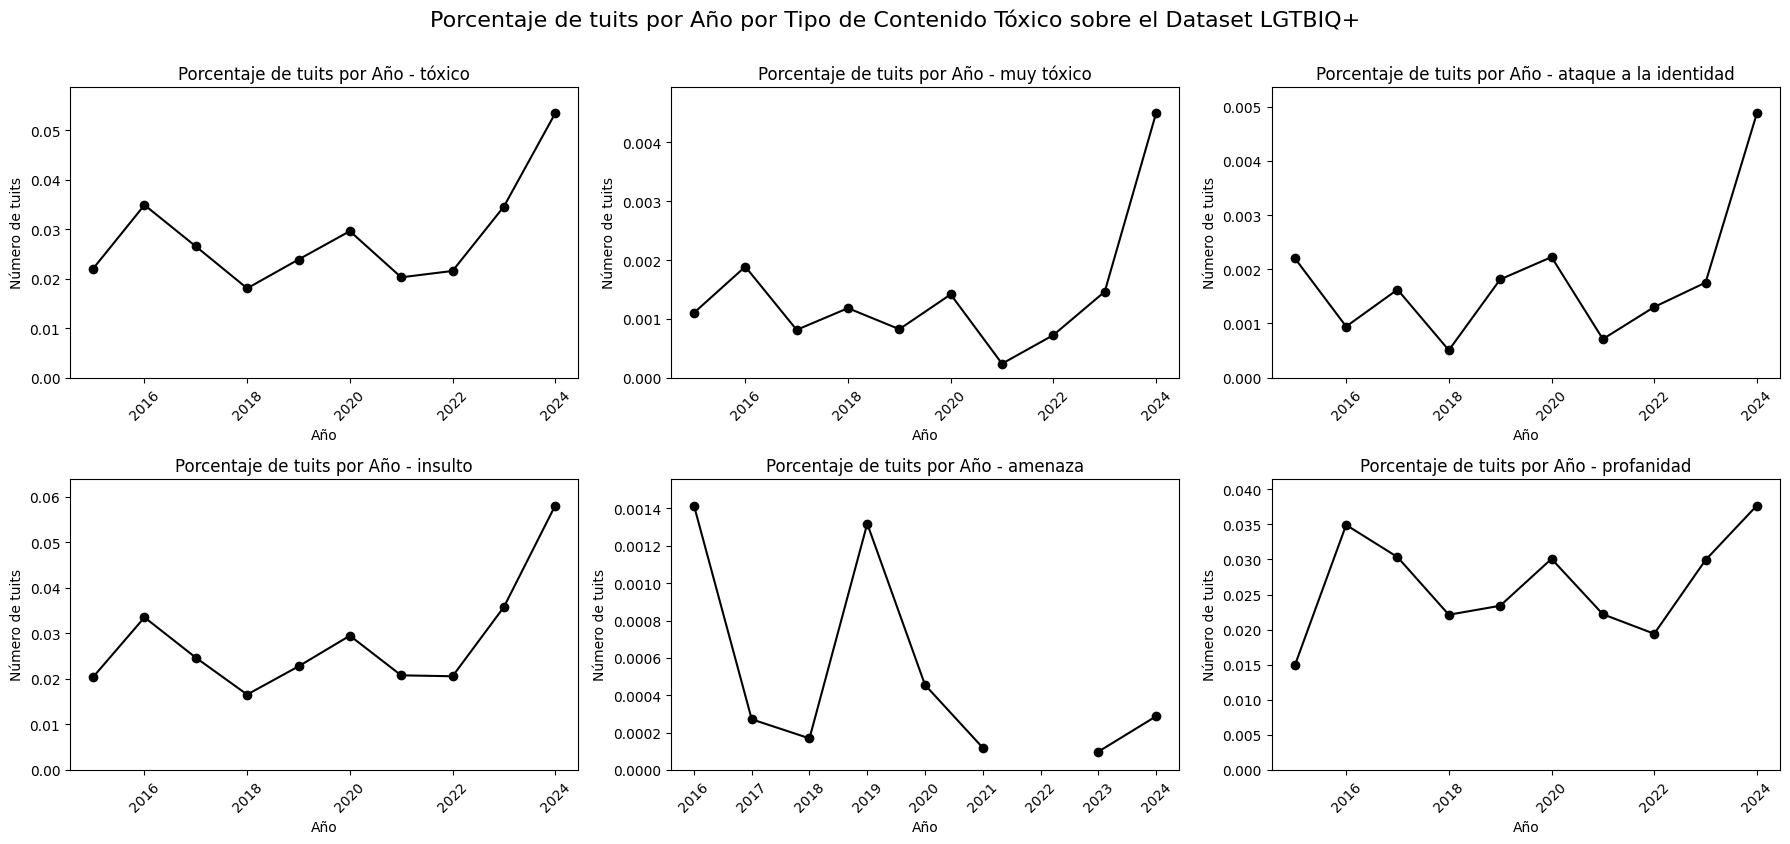

In [25]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size() / df_orgullo.groupby('year').size()
    for key, df in df_filtered.items()
}

# Títulos de los gráficos
titles = [
    "Porcentaje de tuits por Año - tóxico",
    "Porcentaje de tuits por Año - muy tóxico",
    "Porcentaje de tuits por Año - ataque a la identidad",
    "Porcentaje de tuits por Año - insulto",
    "Porcentaje de tuits por Año - amenaza",
    "Porcentaje de tuits por Año - profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='black')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Número de tuits")
    plt.xticks(rotation=45)
    plt.ylim(0, tuits.max() * 1.1)
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido Tóxico sobre el Dataset LGTBIQ+", fontsize=16, y=1.05)
plt.show()

lo mismo pero para los de apoyo

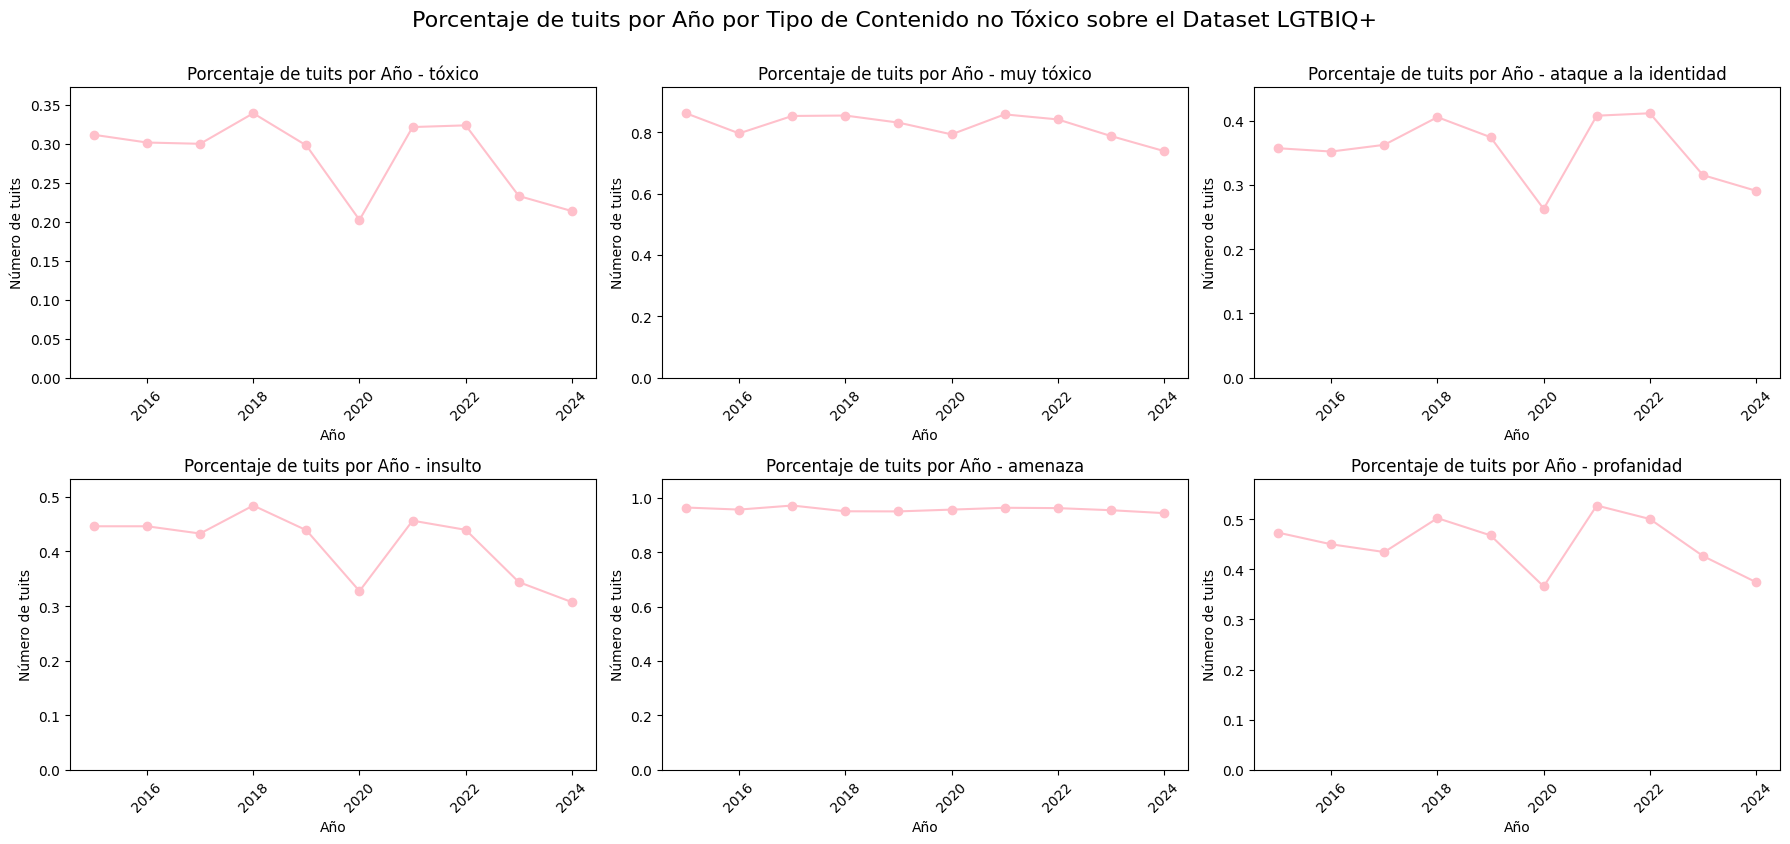

In [26]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size() / df_orgullo.groupby('year').size()
    for key, df in df_filtered_apoyo.items()
}

# Títulos de los gráficos
titles = [
    "Porcentaje de tuits por Año - tóxico",
    "Porcentaje de tuits por Año - muy tóxico",
    "Porcentaje de tuits por Año - ataque a la identidad",
    "Porcentaje de tuits por Año - insulto",
    "Porcentaje de tuits por Año - amenaza",
    "Porcentaje de tuits por Año - profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='pink')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Número de tuits")
    plt.xticks(rotation=45)
    plt.ylim(0, tuits.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido no Tóxico sobre el Dataset LGTBIQ+", fontsize=16, y=1.05)
# Mostrar el gráfico
plt.show()

Ahora para espanol

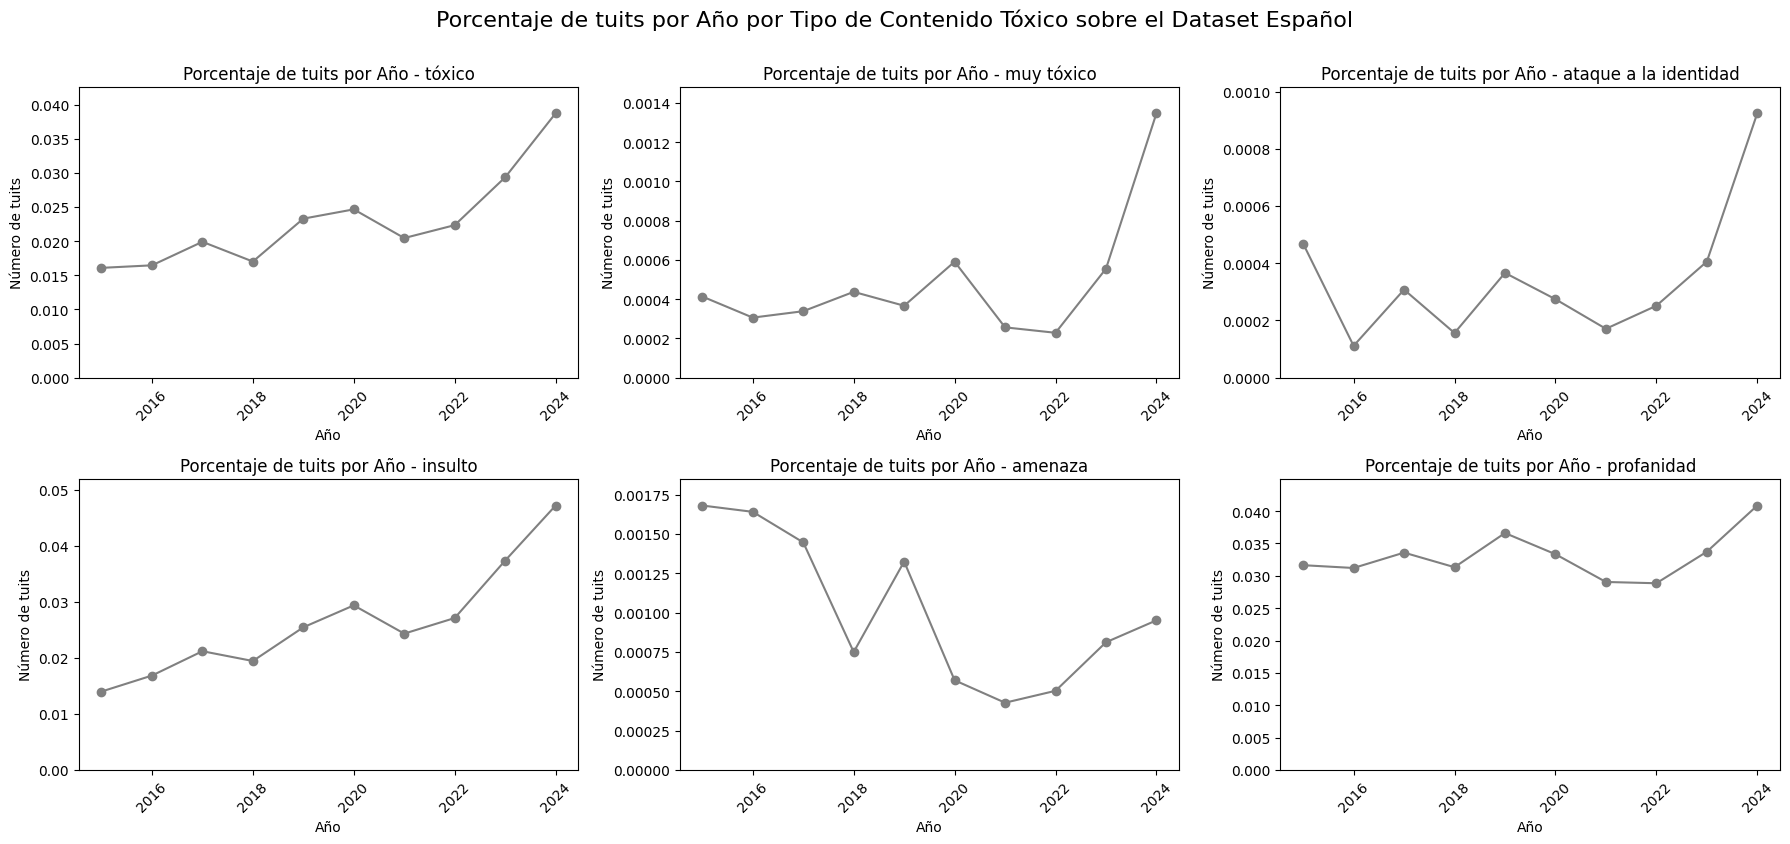

In [27]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year_espanol = {
    key: df.groupby('year').size() / df_espanol.groupby('year').size()
    for key, df in df_filtered_espanol.items()
}

# Títulos de los gráficos
titles = [
    "Porcentaje de tuits por Año - tóxico",
    "Porcentaje de tuits por Año - muy tóxico",
    "Porcentaje de tuits por Año - ataque a la identidad",
    "Porcentaje de tuits por Año - insulto",
    "Porcentaje de tuits por Año - amenaza",
    "Porcentaje de tuits por Año - profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year_espanol.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='gray')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Número de tuits")
    plt.xticks(rotation=45)
    plt.ylim(0, tuits.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido Tóxico sobre el Dataset Español", fontsize=16, y=1.05)
# Mostrar el gráfico
plt.show()

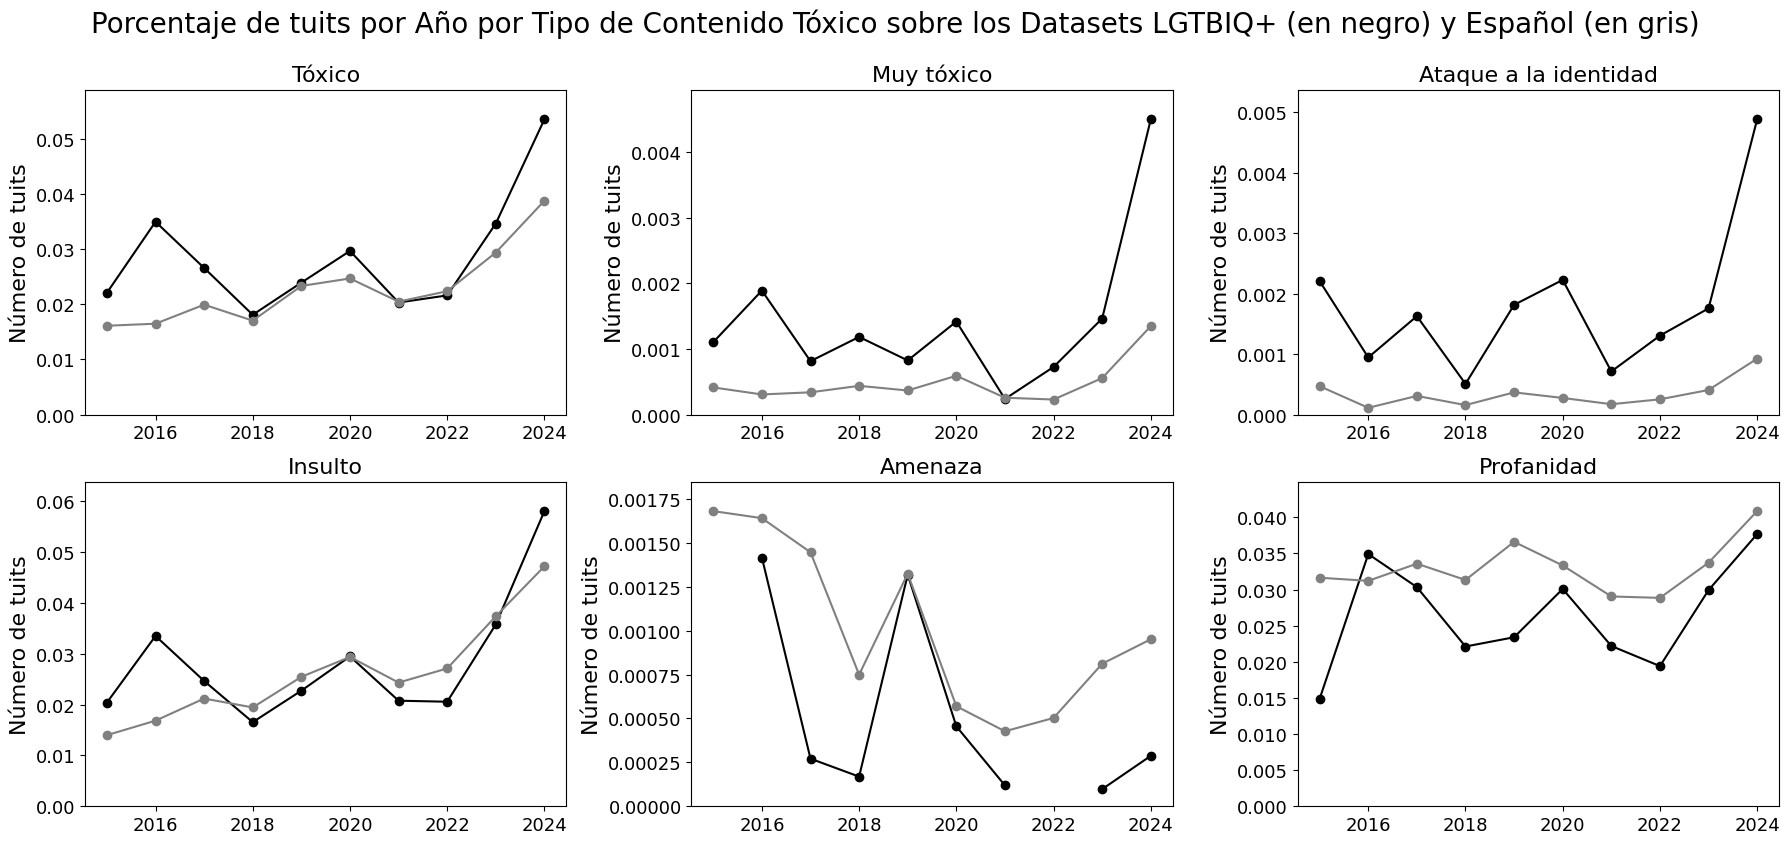

In [28]:
# Crear los diccionarios con las proporciones de tuits por año para ambos datasets
tuits_per_year = {
    key: df.groupby('year').size() / df_orgullo.groupby('year').size()
    for key, df in df_filtered.items()
}

tuits_per_year_espanol = {
    key: df.groupby('year').size() / df_espanol.groupby('year').size()
    for key, df in df_filtered_espanol.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "Profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    # Subplot para el dataset LGTBIQ+
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='black', label="Dataset LGTBIQ+", fontsize=13)
    
    # Subplot para el dataset Español
    tuits_per_year_espanol[key].plot(marker='o', color='gray', label="Dataset Español")
    
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, max(tuits.max(), tuits_per_year_espanol[key].max()) * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Título general para la figura
plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido Tóxico sobre los Datasets LGTBIQ+ (en negro) y Español (en gris)", fontsize=20, y=1.05)

# Mostrar la gráfica
plt.show()


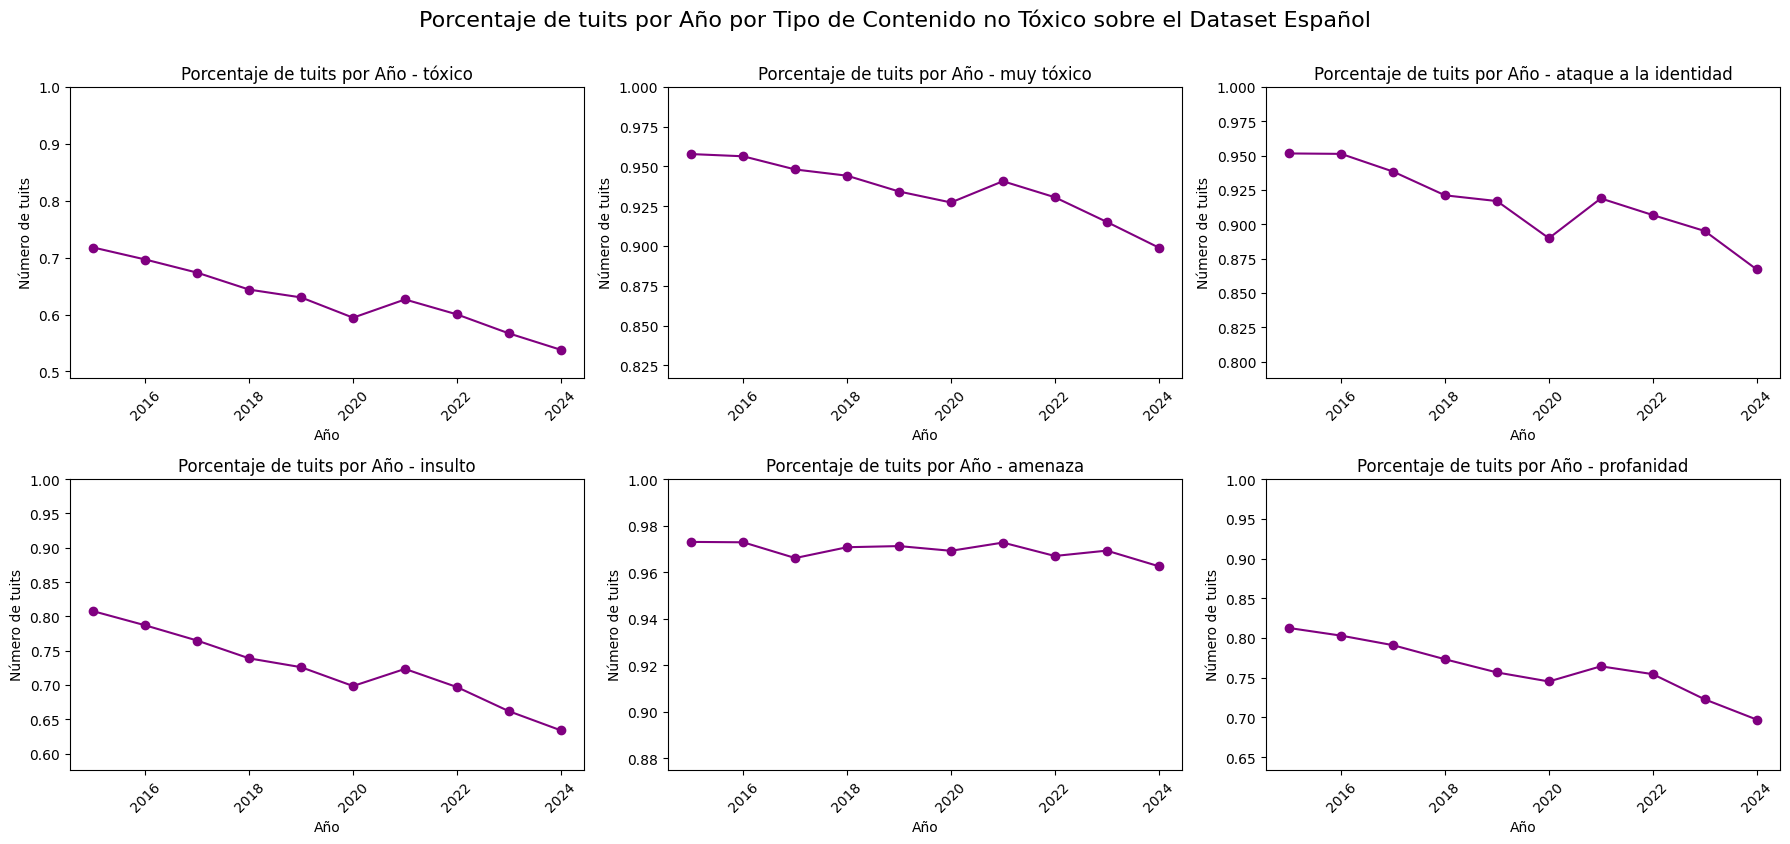

In [29]:
# Crear el diccionario con las proporciones de tuits por año
tuits_per_year = {
    key: df.groupby('year').size() / df_espanol.groupby('year').size()
    for key, df in df_filtered_e_notox.items()
}

# Títulos de los gráficos
titles = [
    "Porcentaje de tuits por Año - tóxico",
    "Porcentaje de tuits por Año - muy tóxico",
    "Porcentaje de tuits por Año - ataque a la identidad",
    "Porcentaje de tuits por Año - insulto",
    "Porcentaje de tuits por Año - amenaza",
    "Porcentaje de tuits por Año - profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year.items()):
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='purple')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Número de tuits")
    plt.xticks(rotation=45)
    plt.ylim(tuits.min() / 1.1, 1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido no Tóxico sobre el Dataset Español", fontsize=16, y=1.05)
# Mostrar el gráfico
plt.show()

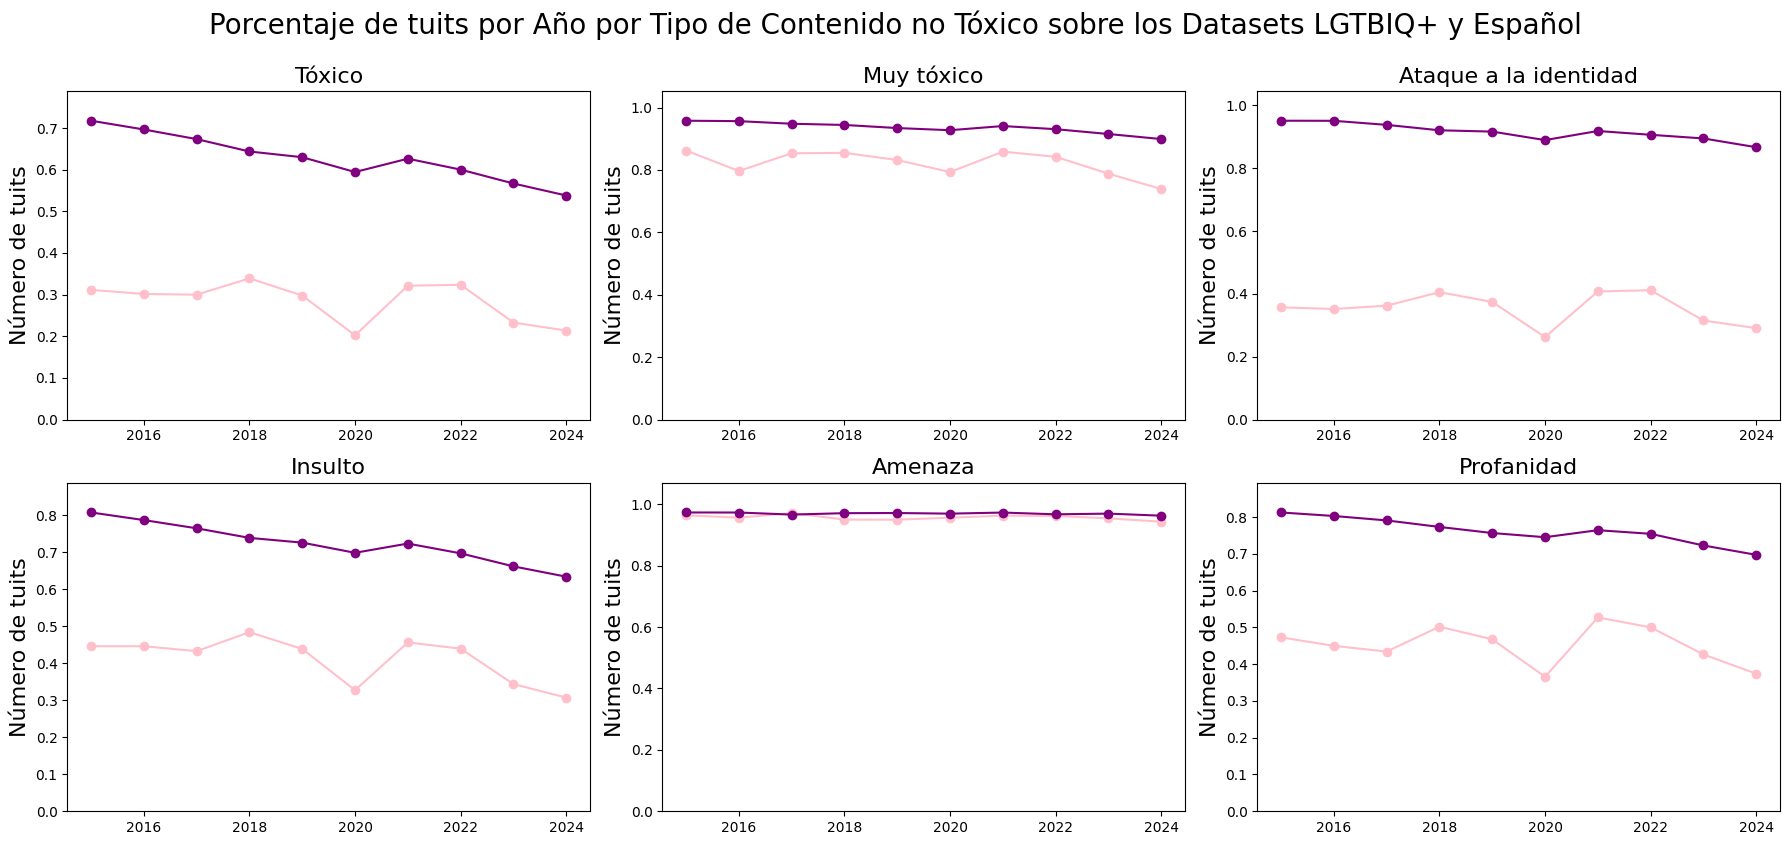

In [30]:
# Crear los diccionarios con las proporciones de tuits por año para ambos datasets
tuits_per_year_apoyo = {
    key: df.groupby('year').size() / df_orgullo.groupby('year').size()
    for key, df in df_filtered_apoyo.items()
}

tuits_per_year_espanol = {
    key: df.groupby('year').size() / df_espanol.groupby('year').size()
    for key, df in df_filtered_e_notox.items()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "Profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre los diccionarios para crear los gráficos
for i, (key, tuits) in enumerate(tuits_per_year_apoyo.items()):
    # Subplot para el dataset LGTBIQ+ (Apoyo)
    plt.subplot(2, 3, i + 1)
    tuits.plot(marker='o', color='pink', label="Dataset LGTBIQ+")
    
    # Subplot para el dataset Español
    tuits_per_year_espanol[key].plot(marker='o', color='purple', label="Dataset Español")
    
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Número de tuits", fontsize=16)
    plt.ylim(0, max(tuits.max(), tuits_per_year_espanol[key].max()) * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Título general para la figura
plt.suptitle("Porcentaje de tuits por Año por Tipo de Contenido no Tóxico sobre los Datasets LGTBIQ+ y Español", fontsize=20, y=1.05)

# Mostrar la gráfica
plt.show()


## Media del score de cada uno de los atributos por año

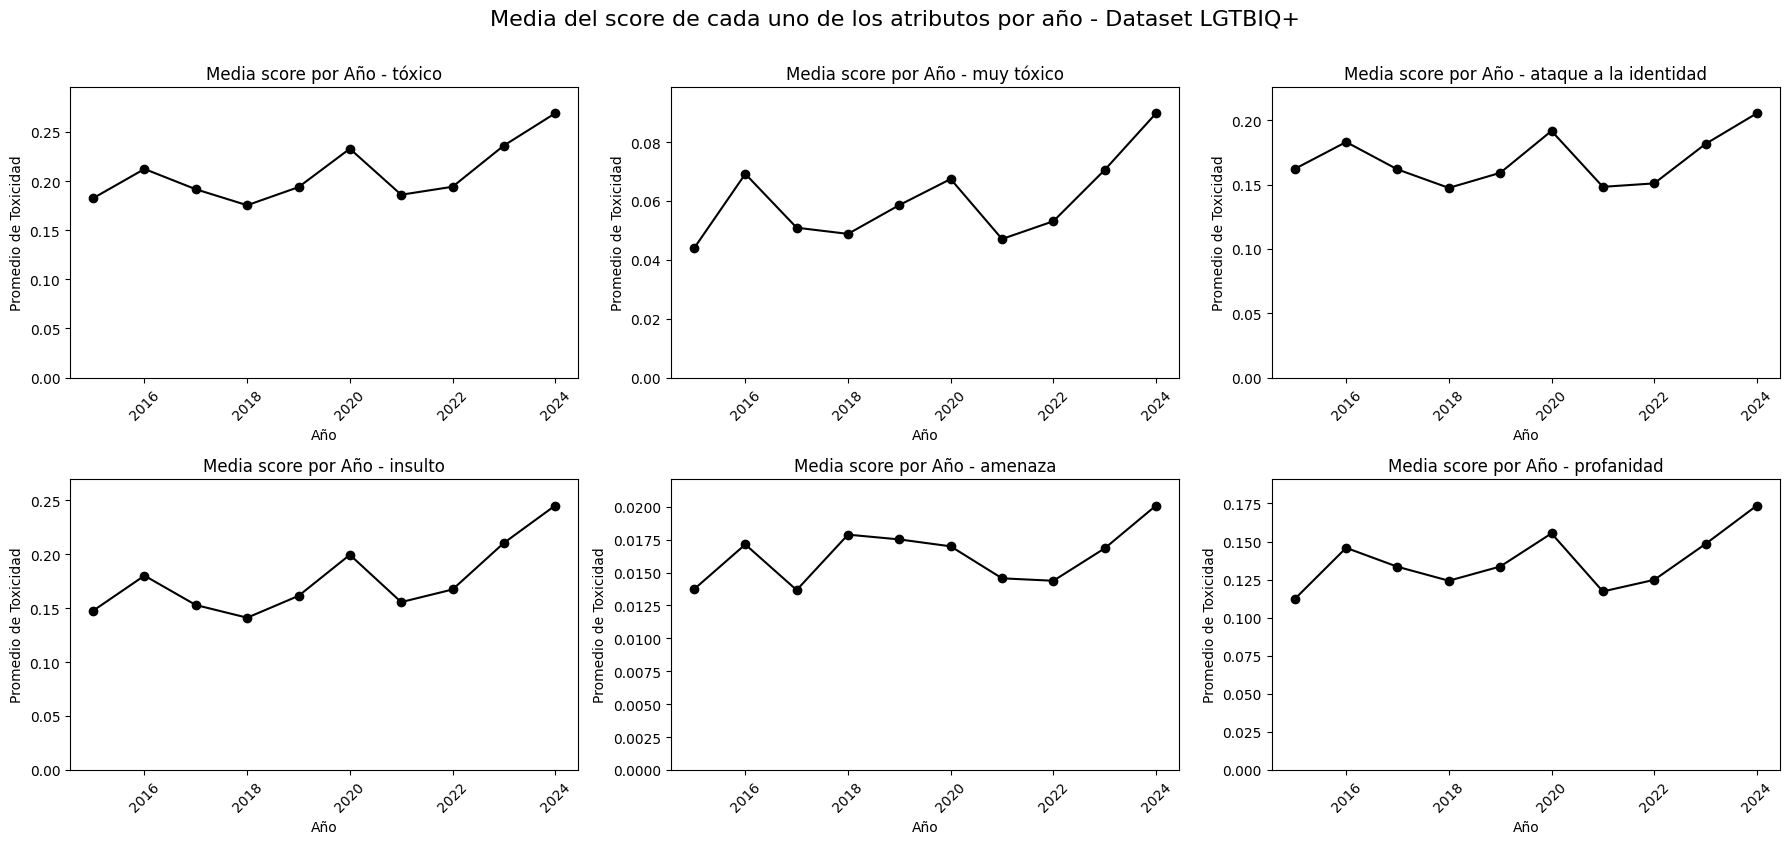

In [31]:
# Crear el diccionario con las medias de toxicidad por año
media_toxicidad = {
    'toxicity': df_orgullo.groupby('year')['toxicity'].mean(),
    'severe_toxicity': df_orgullo.groupby('year')['severe_toxicity'].mean(),
    'identity_attack': df_orgullo.groupby('year')['identity_attack'].mean(),
    'insult': df_orgullo.groupby('year')['insult'].mean(),
    'threat': df_orgullo.groupby('year')['threat'].mean(),
    'profanity': df_orgullo.groupby('year')['profanity'].mean()
}

# Títulos de los gráficos
titles = [
    "Media score por Año - tóxico",
    "Media score por Año - muy tóxico",
    "Media score por Año - ataque a la identidad",
    "Media score por Año - insulto",
    "Media score por Año - amenaza",
    "Media score por Año - profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario `media_toxicidad` para crear los gráficos
for i, (key, media) in enumerate(media_toxicidad.items()):
    plt.subplot(2, 3, i + 1)
    media.plot(marker='o', color='black')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Promedio de Toxicidad")
    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x
    plt.ylim(0, media.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Media del score de cada uno de los atributos por año - Dataset LGTBIQ+", fontsize=16, y=1.05)
plt.show()

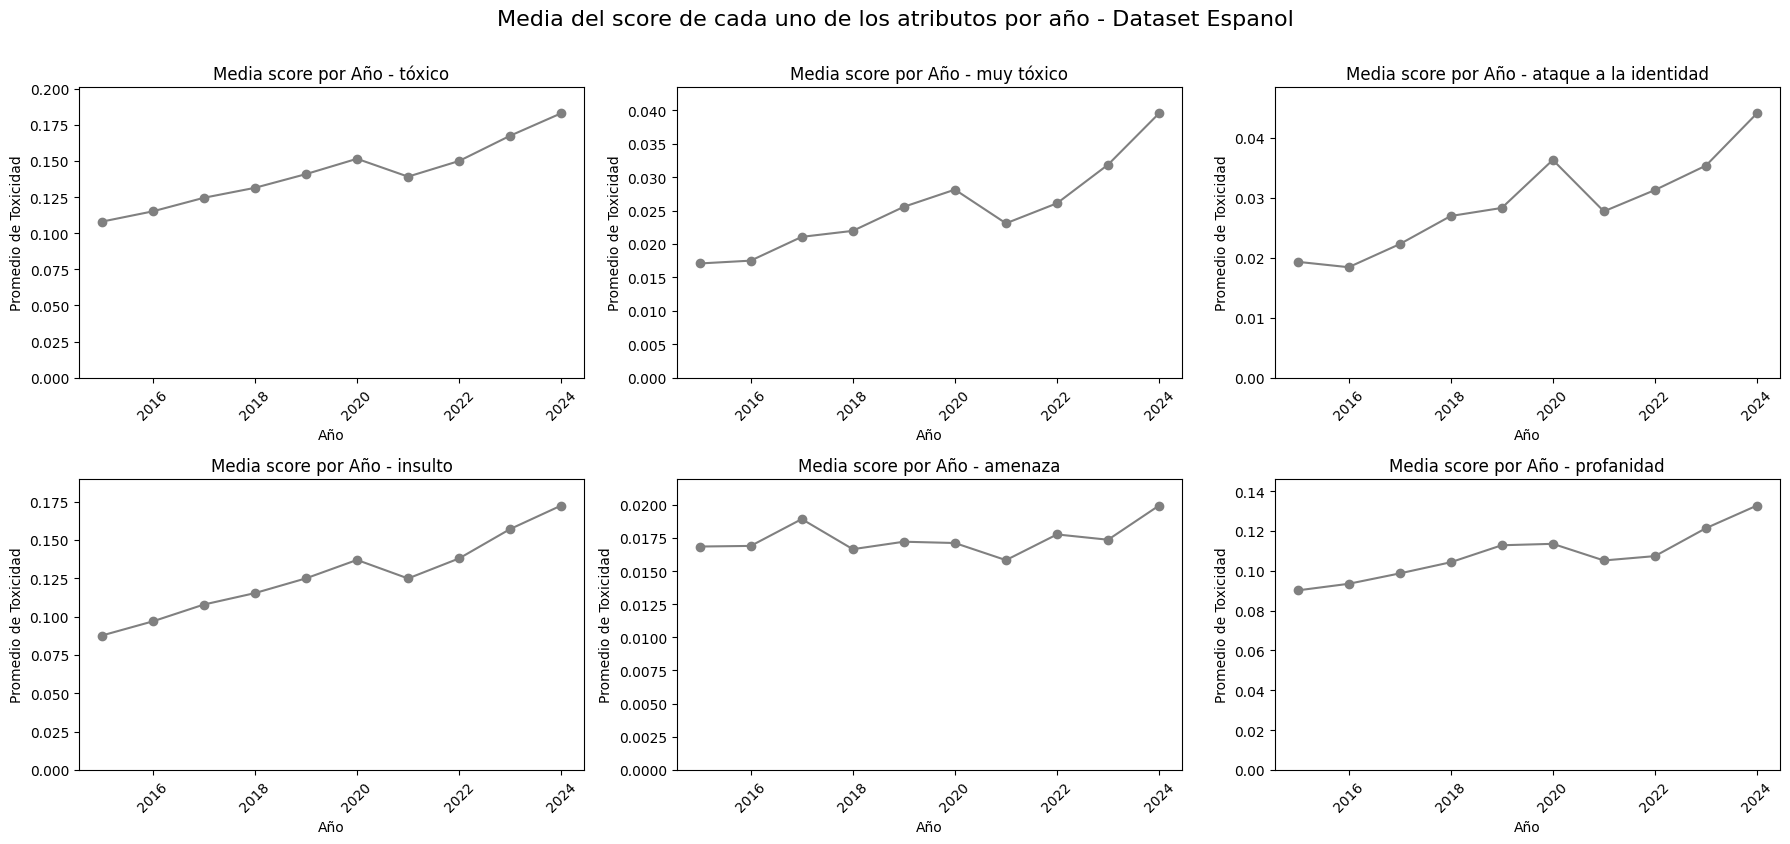

In [32]:
# Crear el diccionario con las medias de toxicidad por año
media_toxicidad_espanol = {
    'toxicity': df_espanol.groupby('year')['toxicity'].mean(),
    'severe_toxicity': df_espanol.groupby('year')['severe_toxicity'].mean(),
    'identity_attack': df_espanol.groupby('year')['identity_attack'].mean(),
    'insult': df_espanol.groupby('year')['insult'].mean(),
    'threat': df_espanol.groupby('year')['threat'].mean(),
    'profanity': df_espanol.groupby('year')['profanity'].mean()
}

# Títulos de los gráficos
titles = [
    "Media score por Año - tóxico",
    "Media score por Año - muy tóxico",
    "Media score por Año - ataque a la identidad",
    "Media score por Año - insulto",
    "Media score por Año - amenaza",
    "Media score por Año - profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario `media_toxicidad` para crear los gráficos
for i, (key, media) in enumerate(media_toxicidad_espanol.items()):
    plt.subplot(2, 3, i + 1)
    media.plot(marker='o', color='gray')
    plt.title(titles[i])
    plt.xlabel("Año")
    plt.ylabel("Promedio de Toxicidad")
    plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x
    # Ajustar los límites del eje Y
    plt.ylim(0, media.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Mostrar el gráfico
plt.suptitle("Media del score de cada uno de los atributos por año - Dataset Espanol", fontsize=16, y=1.05)
plt.show()


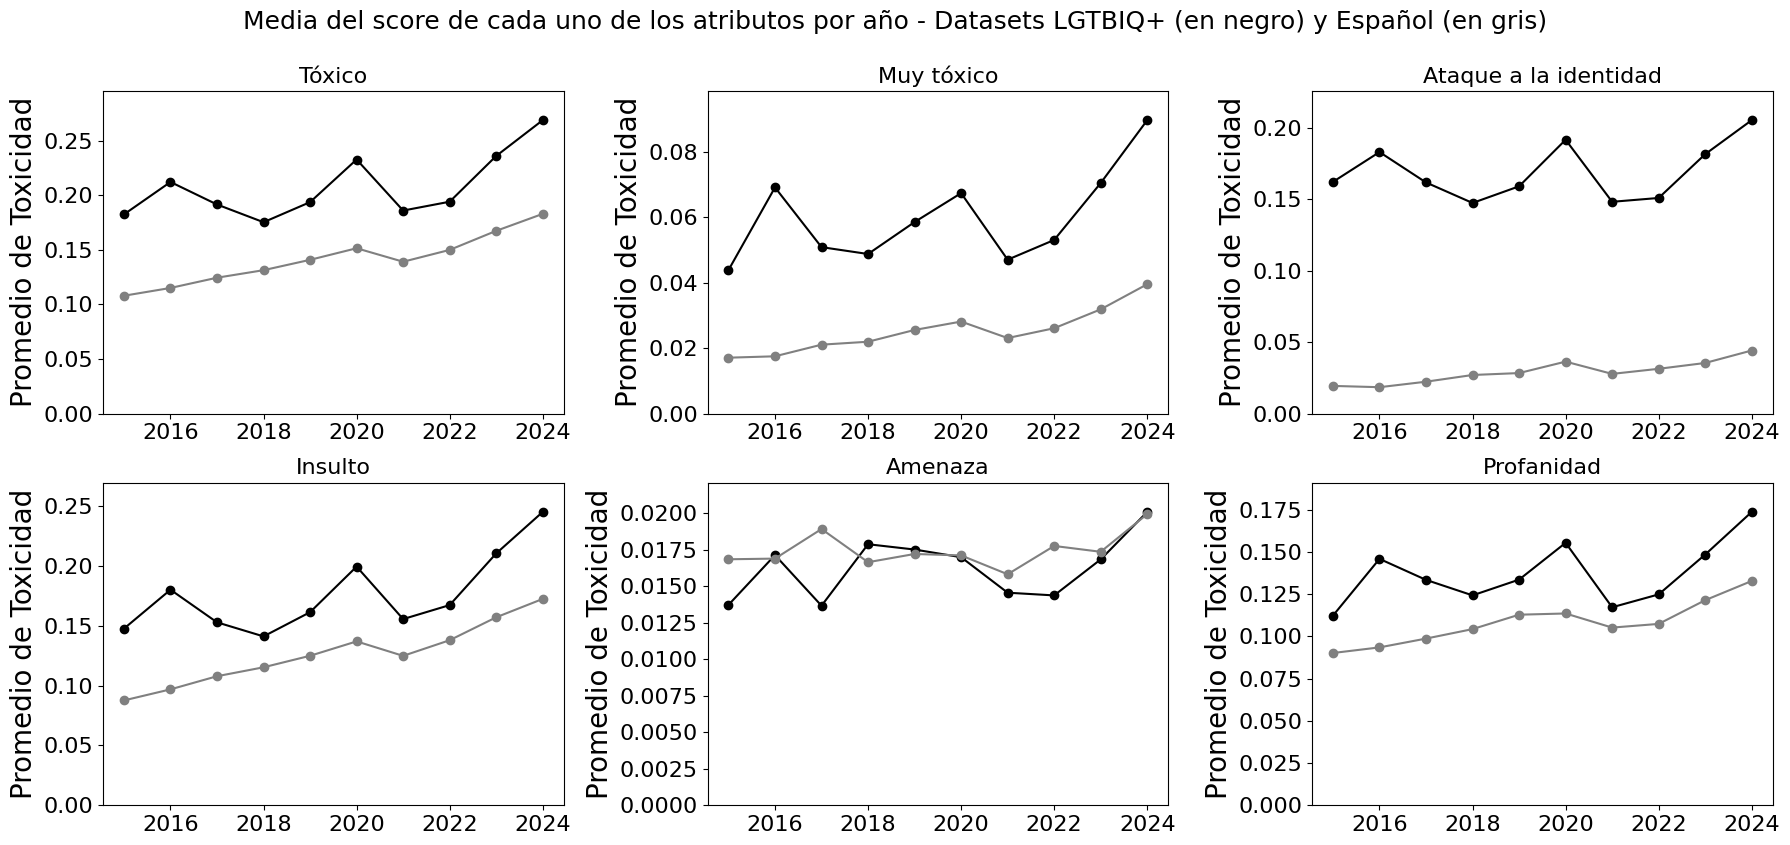

In [33]:
# Crear los diccionarios con las medias de toxicidad por año para ambos datasets
media_toxicidad = {
    'toxicity': df_orgullo.groupby('year')['toxicity'].mean(),
    'severe_toxicity': df_orgullo.groupby('year')['severe_toxicity'].mean(),
    'identity_attack': df_orgullo.groupby('year')['identity_attack'].mean(),
    'insult': df_orgullo.groupby('year')['insult'].mean(),
    'threat': df_orgullo.groupby('year')['threat'].mean(),
    'profanity': df_orgullo.groupby('year')['profanity'].mean()
}

media_toxicidad_espanol = {
    'toxicity': df_espanol.groupby('year')['toxicity'].mean(),
    'severe_toxicity': df_espanol.groupby('year')['severe_toxicity'].mean(),
    'identity_attack': df_espanol.groupby('year')['identity_attack'].mean(),
    'insult': df_espanol.groupby('year')['insult'].mean(),
    'threat': df_espanol.groupby('year')['threat'].mean(),
    'profanity': df_espanol.groupby('year')['profanity'].mean()
}

# Títulos de los gráficos
titles = [
    "Tóxico",
    "Muy tóxico",
    "Ataque a la identidad",
    "Insulto",
    "Amenaza",
    "Profanidad"
]

# Crear la figura
plt.figure(figsize=(18, 8))

# Iterar sobre el diccionario media_toxicidad para crear los gráficos (Dataset LGTBIQ+)
for i, (key, media) in enumerate(media_toxicidad.items()):
    plt.subplot(2, 3, i + 1)
    media.plot(marker='o', color='black', label="Dataset LGTBIQ+", fontsize=16)
    
    # Añadir el gráfico para el dataset Español
    media_toxicidad_espanol[key].plot(marker='o', color='gray', label="Dataset Español", fontsize=16)
    
    plt.title(titles[i], fontsize=16)
    plt.xlabel(None)
    plt.ylabel("Promedio de Toxicidad", fontsize=20)
    plt.ylim(0, media.max() * 1.1)  # El *1.1 es para dejar un poco de margen por encima del valor máximo
    plt.tight_layout()

# Añadir título general para la figura
plt.suptitle("Media del score de cada uno de los atributos por año - Datasets LGTBIQ+ (en negro) y Español (en gris)", fontsize=18, y=1.05)

# Mostrar la gráfica
plt.show()


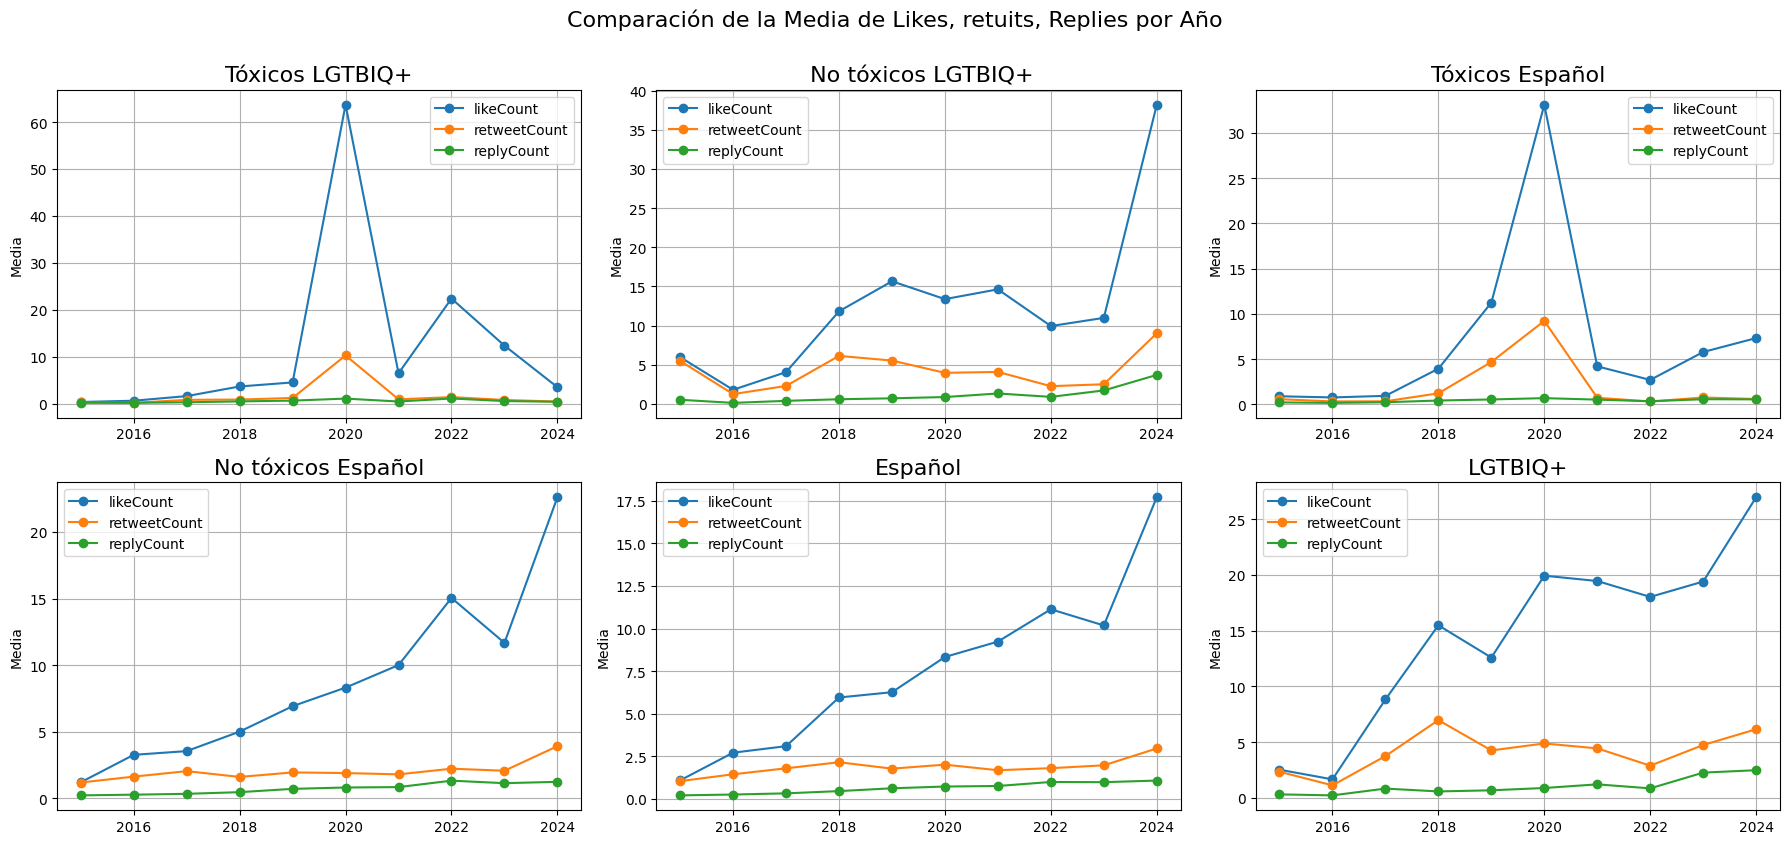

In [34]:
# Calcular la media por año de las columnas de interés para df_orgullo
mean_values_by_year_to = df_filtered['toxicity'].groupby('year')[['likeCount', 'retweetCount', 'replyCount']].mean()

# Calcular la media por año de las columnas de interés para df_orgullo
mean_values_by_year_notoa = df_filtered_apoyo['toxicity'].groupby('year')[['likeCount', 'retweetCount', 'replyCount']].mean()

# Calcular la media por año de las columnas de interés para df_orgullo
mean_values_by_year_toe = df_filtered_espanol['toxicity'].groupby('year')[['likeCount', 'retweetCount', 'replyCount']].mean()

# Calcular la media por año de las columnas de interés para df_orgullo
mean_values_by_year_notoe = df_filtered_e_notox['toxicity'].groupby('year')[['likeCount', 'retweetCount', 'replyCount']].mean()

# Calcular la media por año de las columnas de interés para df_espanol
mean_values_by_year_espanol = df_espanol.groupby('year')[['likeCount', 'retweetCount', 'replyCount']].mean()

# Calcular la media por año de las columnas de interés para df_espanol
mean_values_by_year_orgullo = df_orgullo.groupby('year')[['likeCount', 'retweetCount', 'replyCount']].mean()


# Crear la figura comparativa correctamente con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Graficar para df_orgullo (primer gráfico en la posición 1)
mean_values_by_year_to.plot(kind='line', marker='o', ax=axes[0, 0])

# Personalizar el gráfico para df_orgullo
axes[0, 0].set_title("Tóxicos LGTBIQ+", fontsize=16)
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel("Media")
axes[0, 0].grid(True)

# Graficar para df_orgullo (segundo gráfico en la posición 2)
mean_values_by_year_notoa.plot(kind='line', marker='o', ax=axes[0, 1])

# Personalizar el gráfico para df_orgullo
axes[0, 1].set_title(" No tóxicos LGTBIQ+", fontsize=16)
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel("Media")
axes[0, 1].grid(True)

# Graficar para df_orgullo (tercer gráfico en la posición 3)
mean_values_by_year_toe.plot(kind='line', marker='o', ax=axes[0, 2])

# Personalizar el gráfico para df_orgullo
axes[0, 2].set_title("Tóxicos Español", fontsize=16)
axes[0, 2].set_xlabel(None)
axes[0, 2].set_ylabel("Media")
axes[0, 2].grid(True)

# Graficar para df_orgullo (cuarto gráfico en la posición 4)
mean_values_by_year_notoe.plot(kind='line', marker='o', ax=axes[1, 0])

# Personalizar el gráfico para df_orgullo
axes[1, 0].set_title("No tóxicos Español", fontsize=16)
axes[1, 0].set_xlabel(None)
axes[1, 0].set_ylabel("Media")
axes[1, 0].grid(True)

# Graficar para df_espanol (quinto gráfico en la posición 5)
mean_values_by_year_espanol.plot(kind='line', marker='o', ax=axes[1, 1])

# Personalizar el gráfico para df_espanol
axes[1, 1].set_title("Español", fontsize=16)
axes[1, 1].set_xlabel(None)
axes[1, 1].set_ylabel("Media")
axes[1, 1].grid(True)

# Graficar para df_espanol (quinto gráfico en la posición 5)
mean_values_by_year_orgullo.plot(kind='line', marker='o', ax=axes[1, 2])

# Personalizar el gráfico para df_espanol
axes[1, 2].set_title("LGTBIQ+", fontsize=16)
axes[1, 2].set_xlabel(None)
axes[1, 2].set_ylabel("Media")
axes[1, 2].grid(True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.suptitle("Comparación de la Media de Likes, retuits, Replies por Año", fontsize=16, y=1.05)
plt.show()

# Estudio por periodos

In [35]:
# Crear una función para filtrar por tipo de toxicidad
def filter_toxicity(df, toxicity_column, thresholds):
    """
    Filtra el DataFrame por una columna de toxicidad dada y los umbrales de año especificados.
    """
    # Filtrar para los valores dentro de los rangos de años
    df_2015_2019 = df[(df[toxicity_column] > thresholds['threshold']) & (df['year'] >= 2015) & (df['year'] <= 2019)]
    df_2020 = df[(df[toxicity_column] > thresholds['threshold']) & (df['year'] == 2020)]
    df_2021_2022 = df[(df[toxicity_column] > thresholds['threshold']) & (df['year'] >= 2021) & (df['year'] <= 2022)]
    df_2023_2024 = df[(df[toxicity_column] > thresholds['threshold']) & (df['year'] >= 2023) & (df['year'] <= 2024)]

    return df_2015_2019, df_2020, df_2021_2022, df_2023_2024

# Definir columnas de toxicidad
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Umbral de toxicidad
threshold = 0.7
thresholds = {'threshold': threshold}

# Crear los DataFrames para los diferentes rangos de años usando la función
df_2015_2019 = {}
df_2020 = {}
df_2021_2022 = {}
df_2023_2024 = {}

for column in toxicity_columns:
    df_2015_2019[column], df_2020[column], df_2021_2022[column], df_2023_2024[column] = filter_toxicity(df_orgullo, column, thresholds)


In [36]:
import scipy.stats as stats

# Suponiendo que tienes los datos de toxicidad por cada periodo
toxicidad_2015_2019 = df_2015_2019['toxicity']['toxicity']
toxicidad_2020 = df_2020['toxicity']['toxicity']
toxicidad_2021_2022 = df_2021_2022['toxicity']['toxicity']
toxicidad_2023_2024 = df_2023_2024['toxicity']['toxicity']

In [37]:
# Comparaciones por pares utilizando Mann-Whitney U
pairs = [
    ("2015-2019 vs 2020", toxicidad_2015_2019, toxicidad_2020),
    ("2020 vs 2021-2022", toxicidad_2020, toxicidad_2021_2022),
    ("2021-2022 vs 2023-2024", toxicidad_2021_2022, toxicidad_2023_2024),
    ("2015-2019 vs 2021-2022", toxicidad_2015_2019, toxicidad_2021_2022),
    ("2015-2019 vs 2023-2024", toxicidad_2015_2019, toxicidad_2023_2024),
    ("2020 vs 2023-2024", toxicidad_2020, toxicidad_2023_2024),
]

for pair in pairs:
    name, group1, group2 = pair
    u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"{name} - Estadística U: {u_statistic}, Valor p: {p_value}")
    
    # Interpretación
    if p_value < 0.05:
        print(f"Las diferencias entre {name} son significativas.")
    else:
        print(f"No hay diferencias significativas entre {name}.")


2015-2019 vs 2020 - Estadística U: 134491.5, Valor p: 0.7647326148952363
No hay diferencias significativas entre 2015-2019 vs 2020.
2020 vs 2021-2022 - Estadística U: 143713.5, Valor p: 0.976613130879457
No hay diferencias significativas entre 2020 vs 2021-2022.
2021-2022 vs 2023-2024 - Estadística U: 214624.5, Valor p: 0.17810575778114957
No hay diferencias significativas entre 2021-2022 vs 2023-2024.
2015-2019 vs 2021-2022 - Estadística U: 113018.5, Valor p: 0.8339261011820391
No hay diferencias significativas entre 2015-2019 vs 2021-2022.
2015-2019 vs 2023-2024 - Estadística U: 201768.0, Valor p: 0.14076970972949782
No hay diferencias significativas entre 2015-2019 vs 2023-2024.
2020 vs 2023-2024 - Estadística U: 256074.0, Valor p: 0.1518044274490609
No hay diferencias significativas entre 2020 vs 2023-2024.


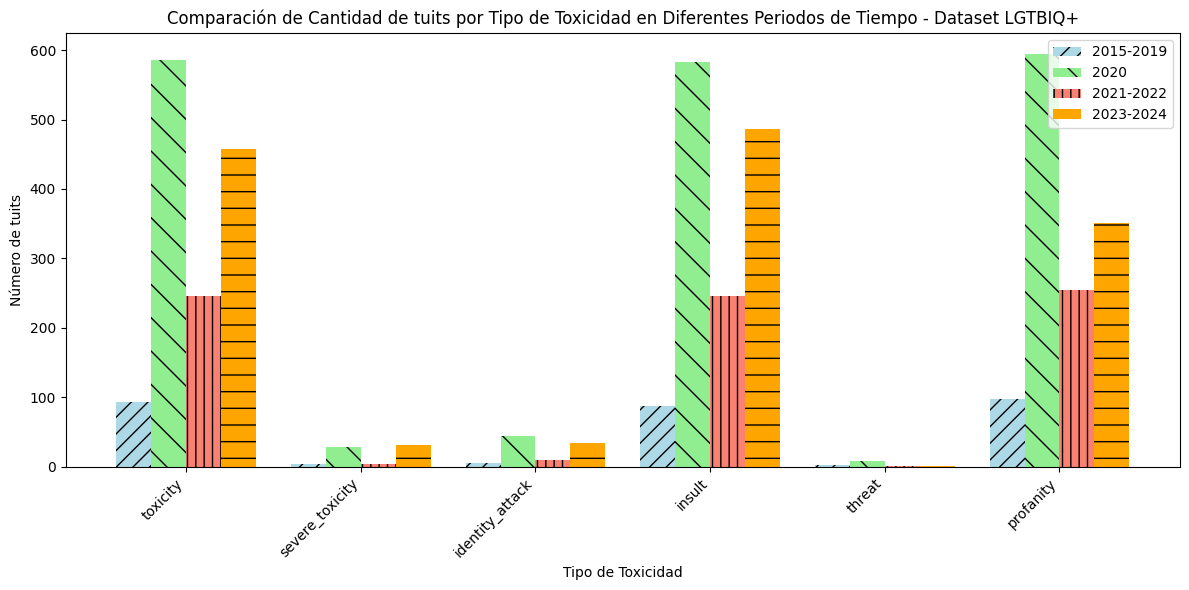

In [38]:
# Calcular la longitud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019 = []
lengths_2020 = []
lengths_2021_2022 = []
lengths_2023_2024 = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular las longitudes de cada columna en los dataframes
for column in toxicity_columns:
    len_2015_2019 = len(df_2015_2019[column]) / 5
    len_2020 = len(df_2020[column])
    len_2021_2022 = len(df_2021_2022[column]) / 2
    len_2023_2024 = len(df_2023_2024[column]) / 2
    
    lengths_2015_2019.append(len_2015_2019)
    lengths_2020.append(len_2020)
    lengths_2021_2022.append(len_2021_2022)
    lengths_2023_2024.append(len_2023_2024)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Comparación de Cantidad de tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

[531.4655172413793, 566.6666666666667, 746.1538461538461, 570.1149425287357, 246.15384615384616, 512.1399176954733]
[-58.10580204778157, -83.92857142857143, -76.13636363636364, -57.80445969125214, -88.88888888888889, -57.310924369747895]
[86.15071283095723, 588.8888888888889, 228.57142857142856, 97.96747967479675, 100.0, 37.99212598425197]


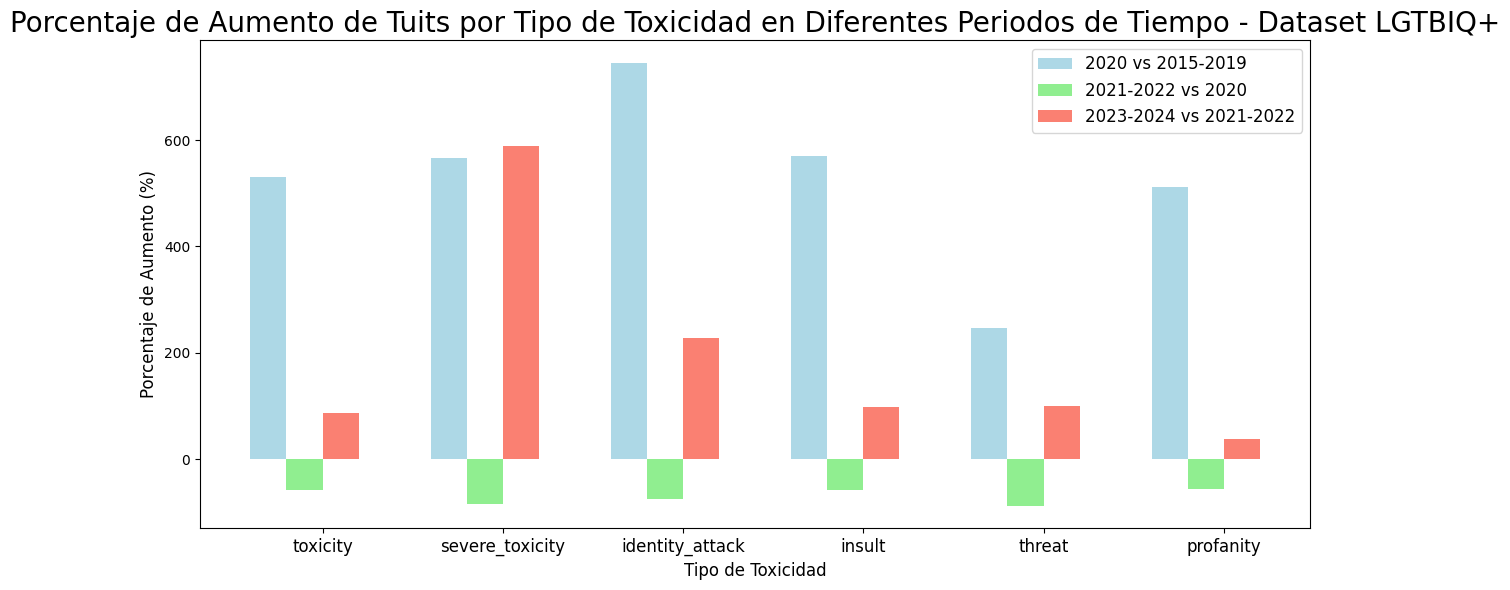

In [ ]:
def calcular_aumento(antiguo, nuevo):
    return ((nuevo - antiguo) / antiguo) * 100

aumento_2020_vs_2015_2019 = []
aumento_2021_2022_vs_2020 = []
aumento_2023_2024_vs_2021_2022 = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019.append(calcular_aumento(lengths_2015_2019[i], lengths_2020[i]))
    aumento_2021_2022_vs_2020.append(calcular_aumento(lengths_2020[i], lengths_2021_2022[i]))
    aumento_2023_2024_vs_2021_2022.append(calcular_aumento(lengths_2021_2022[i], lengths_2023_2024[i]))

print(aumento_2020_vs_2015_2019)
print(aumento_2021_2022_vs_2020)
print(aumento_2023_2024_vs_2021_2022)

# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad', fontsize=12)
ax.set_ylabel('Porcentaje de Aumento (%)', fontsize=12)
ax.set_title('Porcentaje de Aumento de Tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, fontsize=12)
ax.legend(fontsize=12)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Estudiamos el promedio de megustas antes y después de Elon Musk

Aquí no se multiplica por 4 porque ya es una media

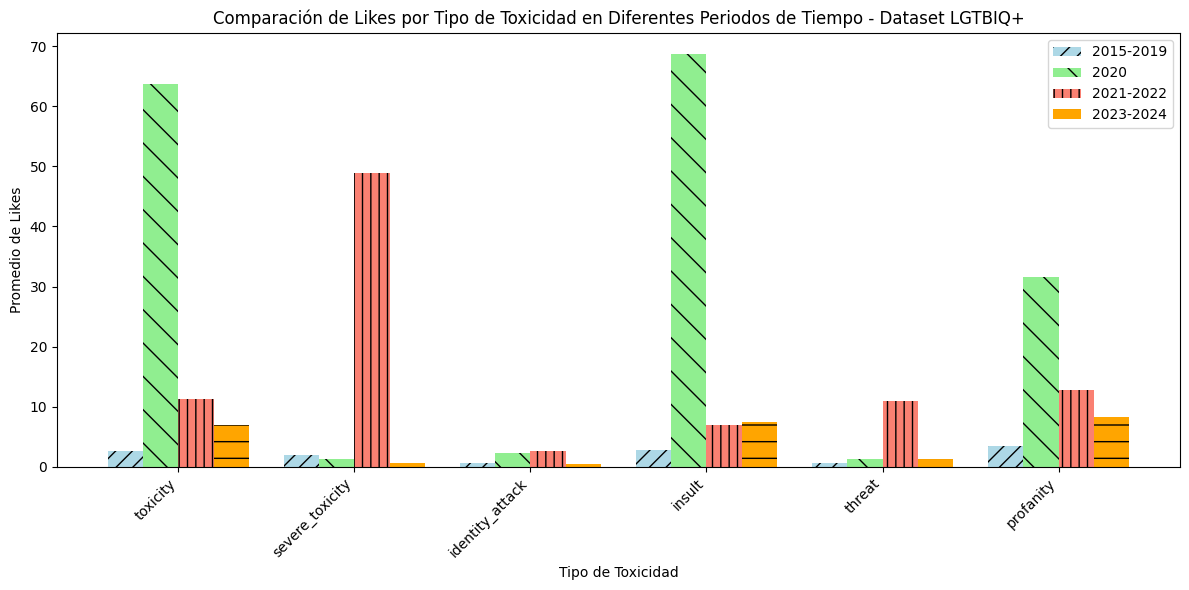

In [40]:
# Calcular la media de likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019 = []
mgs_2020 = []
mgs_2021_2022 = []
mgs_2023_2024 = []

# Calcular la media de likes de cada columna en los dataframes
for column in toxicity_columns:
    mgs_2015_2019_mean = df_2015_2019[column]['likeCount'].mean()
    mgs_2020_mean = df_2020[column]['likeCount'].mean()
    mgs_2021_2022_mean = df_2021_2022[column]['likeCount'].mean()
    mgs_2023_2024_mean = df_2023_2024[column]['likeCount'].mean()
    
    mgs_2015_2019.append(mgs_2015_2019_mean)
    mgs_2020.append(mgs_2020_mean)
    mgs_2021_2022.append(mgs_2021_2022_mean)
    mgs_2023_2024.append(mgs_2023_2024_mean)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, mgs_2015_2019, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Likes')
ax.set_title('Comparación de Likes por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

[2239.691778878503, -26.875, 228.28282828282832, 2282.1847243010566, 116.66666666666666, 824.731365470376]
[-82.25765821223611, 3409.97150997151, 15.238095238095228, -89.8524927518602, 725.0, -59.34578001968504]
[-38.543568049045604, -98.71334310850439, -80.0790513833992, 7.116538444519663, -88.63636363636364, -35.676552799542016]


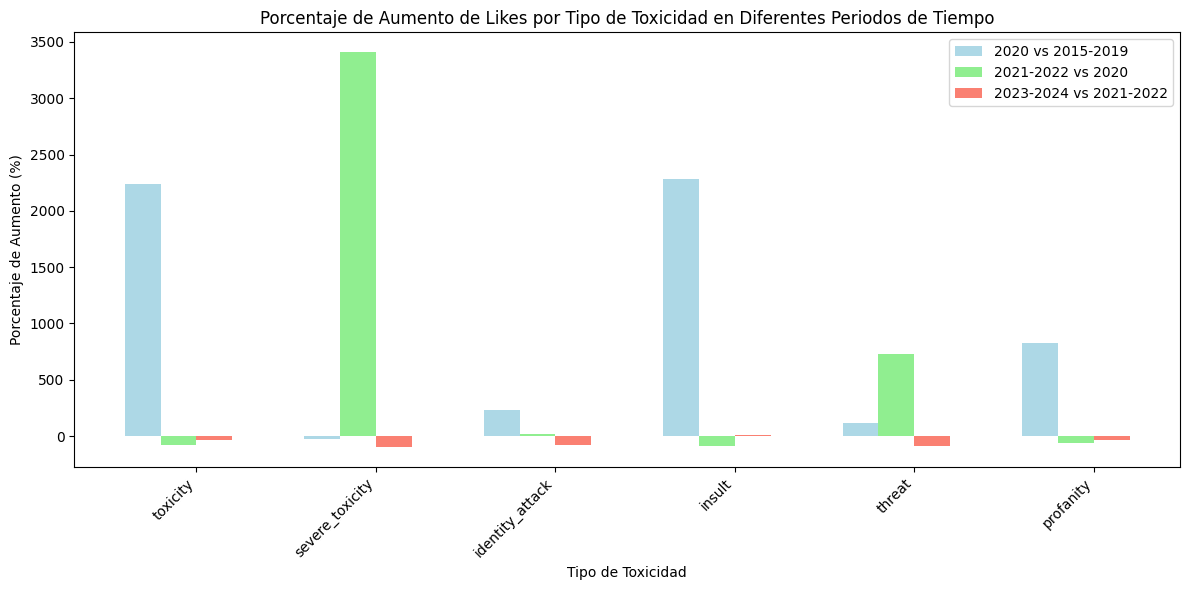

In [ ]:
def calcular_aumento(antiguo, nuevo):
    return ((nuevo - antiguo) / antiguo) * 100

aumento_2020_vs_2015_2019_mgs = []
aumento_2021_2022_vs_2020_mgs = []
aumento_2023_2024_vs_2021_2022_mgs = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019_mgs.append(calcular_aumento(mgs_2015_2019[i], mgs_2020[i]))
    aumento_2021_2022_vs_2020_mgs.append(calcular_aumento(mgs_2020[i], mgs_2021_2022[i]))
    aumento_2023_2024_vs_2021_2022_mgs.append(calcular_aumento(mgs_2021_2022[i], mgs_2023_2024[i]))

print(aumento_2020_vs_2015_2019_mgs)
print(aumento_2021_2022_vs_2020_mgs)
print(aumento_2023_2024_vs_2021_2022_mgs)

# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019_mgs, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020_mgs, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022_mgs, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Porcentaje de Aumento (%)')
ax.set_title('Porcentaje de Aumento de Likes por Tipo de Toxicidad en Diferentes Periodos de Tiempo')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


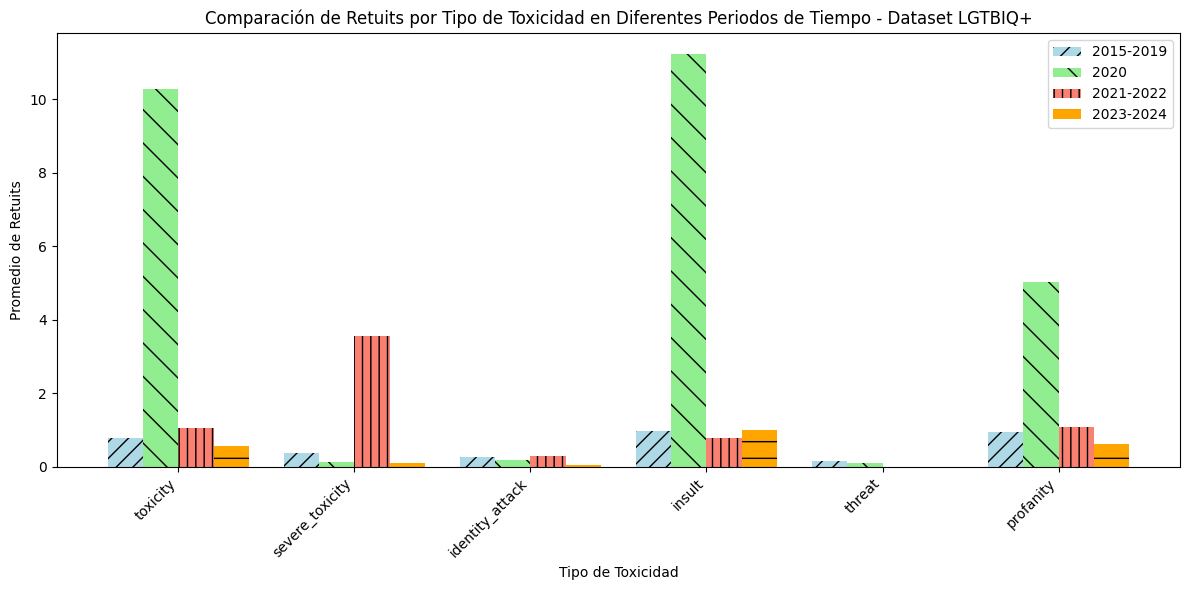

In [42]:
# Calcular la media de retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019 = []
rts_2020 = []
rts_2021_2022 = []
rts_2023_2024 = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular la media de retuits de cada columna en los dataframes
for column in toxicity_columns:
    rts_2015_2019_mean = df_2015_2019[column]['retweetCount'].mean()
    rts_2020_mean = df_2020[column]['retweetCount'].mean()
    rts_2021_2022_mean = df_2021_2022[column]['retweetCount'].mean()
    rts_2023_2024_mean = df_2023_2024[column]['retweetCount'].mean()
    
    rts_2015_2019.append(rts_2015_2019_mean)
    rts_2020.append(rts_2020_mean)
    rts_2021_2022.append(rts_2021_2022_mean)
    rts_2023_2024.append(rts_2023_2024_mean)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, rts_2015_2019, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Retuits')
ax.set_title('Comparación de Retuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Lo mismo para tuits no tóxicos

In [43]:
# Crear una función para filtrar por tipo de toxicidad
def filter_toxicity_apoyo(df, toxicity_column, thresholds):
    """
    Filtra el DataFrame por una columna de toxicidad dada y los umbrales de año especificados.
    """
    # Filtrar para los valores dentro de los rangos de años
    df_2015_2019_apoyo = df[(df[toxicity_column] < thresholds['threshold']) & (df['year'] >= 2015) & (df['year'] <= 2019)]
    df_2020_apoyo = df[(df[toxicity_column] < thresholds['threshold']) & (df['year'] == 2020)]
    df_2021_2022_apoyo = df[(df[toxicity_column] < thresholds['threshold']) & (df['year'] >= 2021) & (df['year'] <= 2022)]
    df_2023_2024_apoyo = df[(df[toxicity_column] < thresholds['threshold']) & (df['year'] >= 2023) & (df['year'] <= 2024)]

    return df_2015_2019_apoyo, df_2020_apoyo, df_2021_2022_apoyo, df_2023_2024_apoyo

# Definir columnas de toxicidad
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Umbral de toxicidad
threshold_apoyo = 0.05
thresholds_apoyo = {'threshold': threshold_apoyo}

# Crear los DataFrames para los diferentes rangos de años usando la función
df_2015_2019_apoyo = {}
df_2020_apoyo = {}
df_2021_2022_apoyo = {}
df_2023_2024_apoyo = {}

for column in toxicity_columns:
    df_2015_2019_apoyo[column], df_2020_apoyo[column], df_2021_2022_apoyo[column], df_2023_2024_apoyo[column] = filter_toxicity_apoyo(df_orgullo, column, thresholds_apoyo)


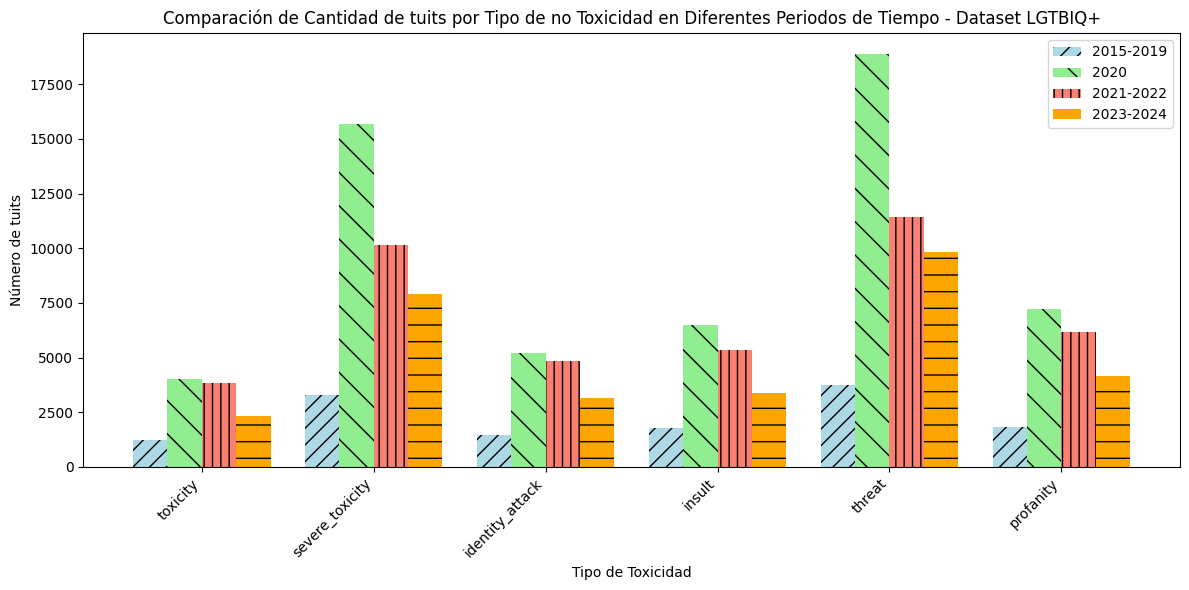

In [44]:
# Calcular la longitud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019_apoyo = []
lengths_2020_apoyo = []
lengths_2021_2022_apoyo = []
lengths_2023_2024_apoyo = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular las longitudes de cada columna en los dataframes
for column in toxicity_columns:
    len_2015_2019_apoyo = len(df_2015_2019_apoyo[column]) / 5
    len_2020_apoyo = len(df_2020_apoyo[column])
    len_2021_2022_apoyo = len(df_2021_2022_apoyo[column]) / 2
    len_2023_2024_apoyo = len(df_2023_2024_apoyo[column]) / 2
    
    lengths_2015_2019_apoyo.append(len_2015_2019_apoyo)
    lengths_2020_apoyo.append(len_2020_apoyo)
    lengths_2021_2022_apoyo.append(len_2021_2022_apoyo)
    lengths_2023_2024_apoyo.append(len_2023_2024_apoyo)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Comparación de Cantidad de tuits por Tipo de no Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

[226.477309826967, 375.07722124644175, 250.7291385363219, 264.45545669557384, 404.26803243704654, 292.00910766561856]
[-4.375, -35.358235594084654, -6.496631376323387, -17.16625463535229, -39.533961066440966, -14.714424007744434]
[-39.568627450980394, -22.05896854353614, -35.398867730313945, -37.166573400484985, -14.076374611784262, -32.8279552456624]


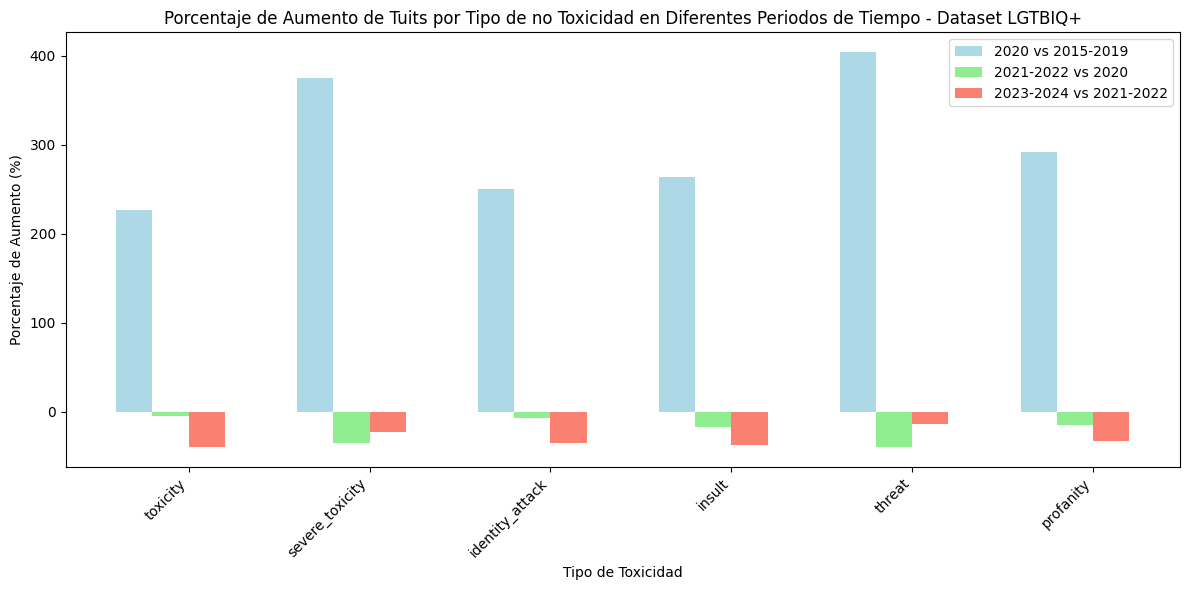

In [ ]:
aumento_2020_vs_2015_2019_apoyo = []
aumento_2021_2022_vs_2020_apoyo = []
aumento_2023_2024_vs_2021_2022_apoyo = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019_apoyo.append(calcular_aumento(lengths_2015_2019_apoyo[i], lengths_2020_apoyo[i]))
    aumento_2021_2022_vs_2020_apoyo.append(calcular_aumento(lengths_2020_apoyo[i], lengths_2021_2022_apoyo[i]))
    aumento_2023_2024_vs_2021_2022_apoyo.append(calcular_aumento(lengths_2021_2022_apoyo[i], lengths_2023_2024_apoyo[i]))

print(aumento_2020_vs_2015_2019_apoyo)
print(aumento_2021_2022_vs_2020_apoyo)
print(aumento_2023_2024_vs_2021_2022_apoyo)

# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019_apoyo, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020_apoyo, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022_apoyo, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Porcentaje de Aumento (%)')
ax.set_title('Porcentaje de Aumento de Tuits por Tipo de no Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


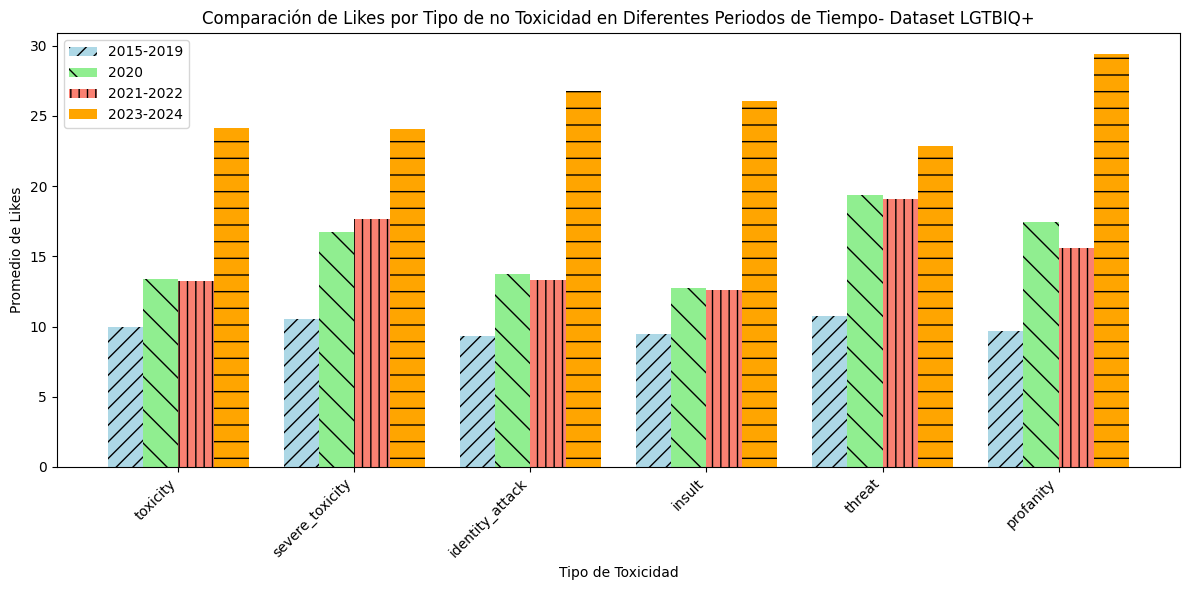

In [46]:
# Calcular la media de likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_apoyo = []
mgs_2020_apoyo = []
mgs_2021_2022_apoyo = []
mgs_2023_2024_apoyo = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular la media de likes de cada columna en los dataframes
for column in toxicity_columns:
    mgs_2015_2019_mean_apoyo = df_2015_2019_apoyo[column]['likeCount'].mean()
    mgs_2020_mean_apoyo = df_2020_apoyo[column]['likeCount'].mean()
    mgs_2021_2022_mean_apoyo = df_2021_2022_apoyo[column]['likeCount'].mean()
    mgs_2023_2024_mean_apoyo = df_2023_2024_apoyo[column]['likeCount'].mean()
    
    mgs_2015_2019_apoyo.append(mgs_2015_2019_mean_apoyo)
    mgs_2020_apoyo.append(mgs_2020_mean_apoyo)
    mgs_2021_2022_apoyo.append(mgs_2021_2022_mean_apoyo)
    mgs_2023_2024_apoyo.append(mgs_2023_2024_mean_apoyo)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Likes')
ax.set_title('Comparación de Likes por Tipo de no Toxicidad en Diferentes Periodos de Tiempo- Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

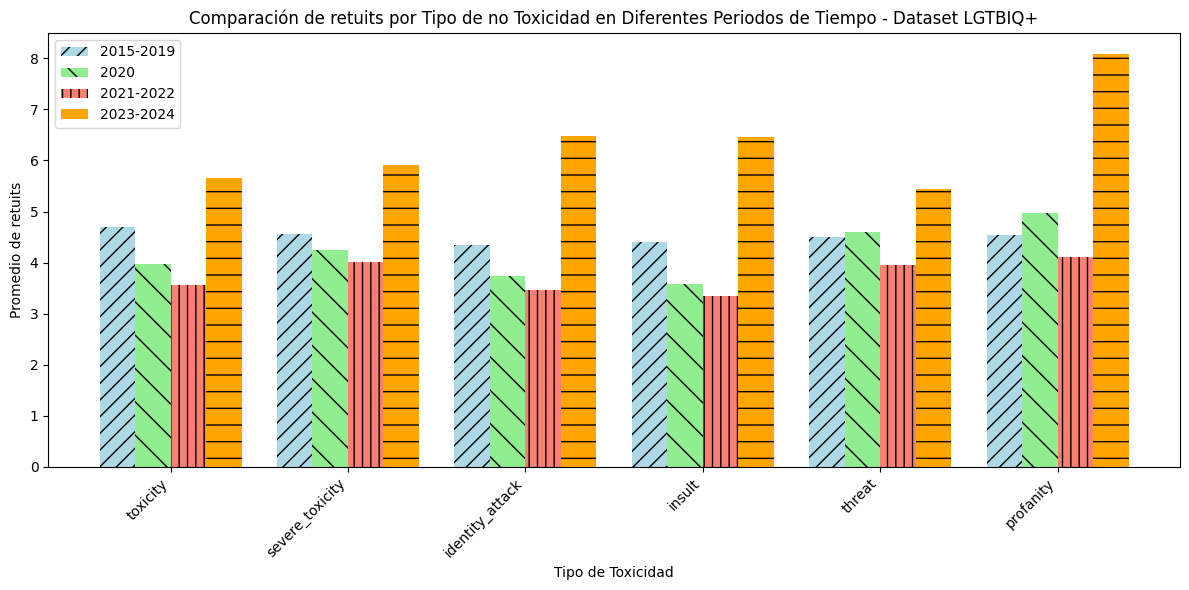

In [47]:
# Calcular la media de retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_apoyo = []
rts_2020_apoyo = []
rts_2021_2022_apoyo = []
rts_2023_2024_apoyo = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular la media de tuitss de cada columna en los dataframes
for column in toxicity_columns:
    rts_2015_2019_mean_apoyo = df_2015_2019_apoyo[column]['retweetCount'].mean()
    rts_2020_mean_apoyo = df_2020_apoyo[column]['retweetCount'].mean()
    rts_2021_2022_mean_apoyo = df_2021_2022_apoyo[column]['retweetCount'].mean()
    rts_2023_2024_mean_apoyo = df_2023_2024_apoyo[column]['retweetCount'].mean()
    
    rts_2015_2019_apoyo.append(rts_2015_2019_mean_apoyo)
    rts_2020_apoyo.append(rts_2020_mean_apoyo)
    rts_2021_2022_apoyo.append(rts_2021_2022_mean_apoyo)
    rts_2023_2024_apoyo.append(rts_2023_2024_mean_apoyo)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, rts_2015_2019_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de retuits')
ax.set_title('Comparación de retuits por Tipo de no Toxicidad en Diferentes Periodos de Tiempo - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Lo mismo para Tuits Tóxicos del Dataset Español

In [48]:
# Crear los DataFrames para los diferentes rangos de años usando la función
df_2015_2019_toe = {}
df_2020_toe = {}
df_2021_2022_toe = {}
df_2023_2024_toe = {}

for column in toxicity_columns:
    df_2015_2019_toe[column], df_2020_toe[column], df_2021_2022_toe[column], df_2023_2024_toe[column] = filter_toxicity(df_espanol, column, thresholds)


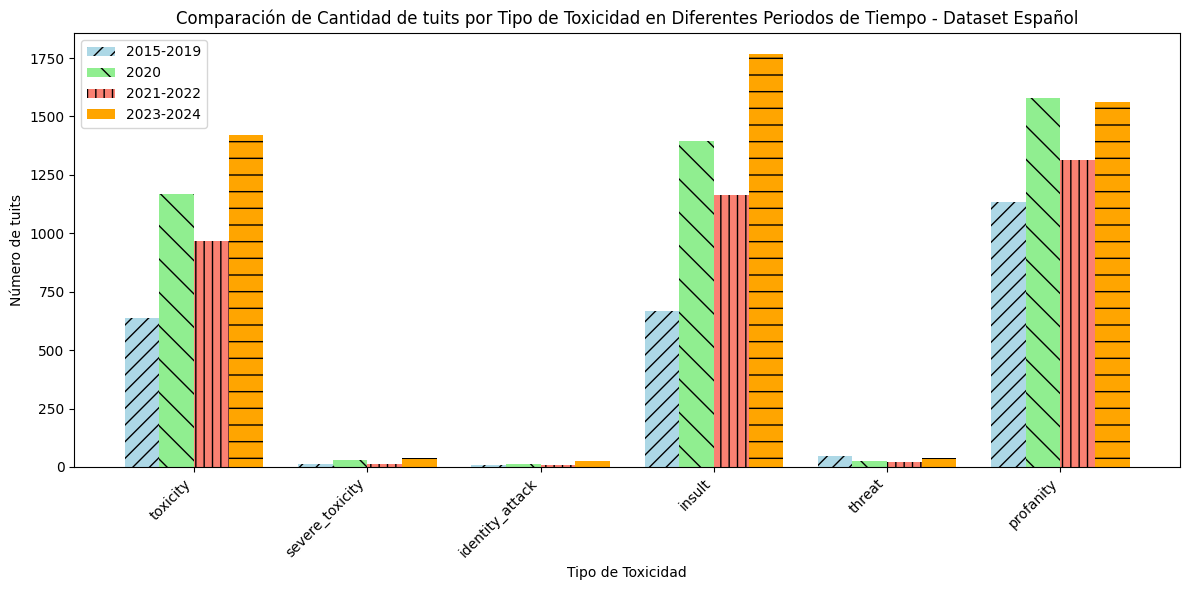

In [49]:
# Calcular la longitud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019_toe = []
lengths_2020_toe = []
lengths_2021_2022_toe = []
lengths_2023_2024_toe = []

# Calcular las longitudes de cada columna en los dataframes
for column in toxicity_columns:
    len_2015_2019_toe = len(df_2015_2019_toe[column]) / 5
    len_2020_toe = len(df_2020_toe[column])
    len_2021_2022_toe = len(df_2021_2022_toe[column]) / 2
    len_2023_2024_toe = len(df_2023_2024_toe[column]) / 2
    
    lengths_2015_2019_toe.append(len_2015_2019_toe)
    lengths_2020_toe.append(len_2020_toe)
    lengths_2021_2022_toe.append(len_2021_2022_toe)
    lengths_2023_2024_toe.append(len_2023_2024_toe)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Comparación de Cantidad de tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset Español')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

[82.94209702660407, 118.74999999999997, 32.65306122448979, 109.15915915915917, -43.27731092436975, 39.46718419195484]
[-17.194183062446537, -60.71428571428571, -26.923076923076923, -16.475233309404164, -22.22222222222222, -17.014547754585703]
[46.79752066115703, 250.0, 184.21052631578948, 52.084228620541474, 76.19047619047619, 19.20731707317073]


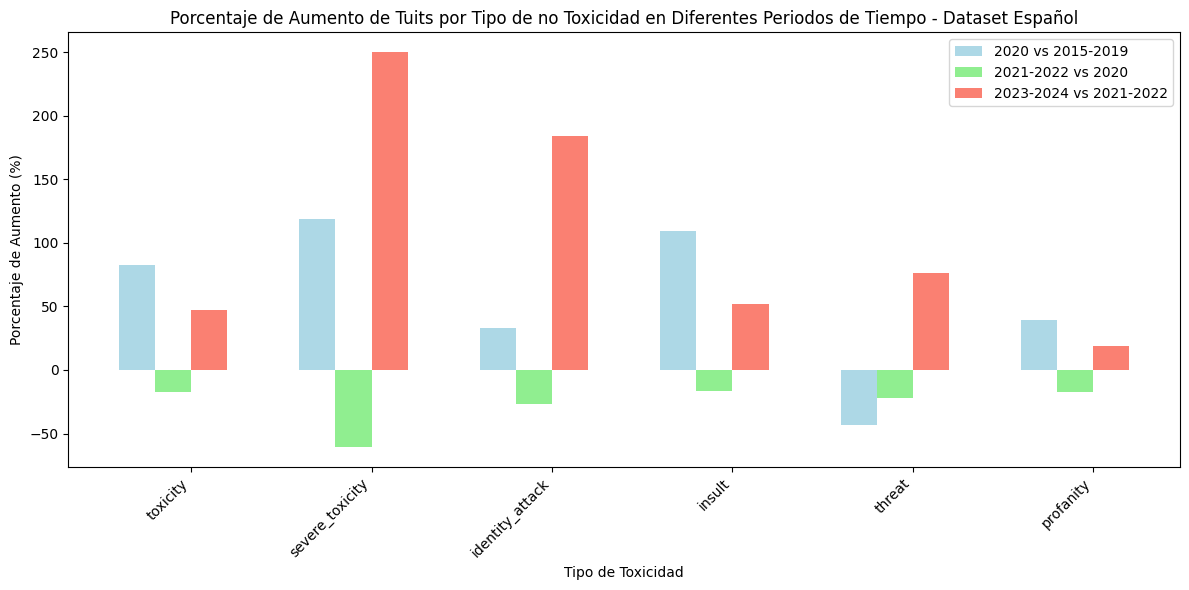

In [ ]:
aumento_2020_vs_2015_2019_toe = []
aumento_2021_2022_vs_2020_toe = []
aumento_2023_2024_vs_2021_2022_toe = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019_toe.append(calcular_aumento(lengths_2015_2019_toe[i], lengths_2020_toe[i]))
    aumento_2021_2022_vs_2020_toe.append(calcular_aumento(lengths_2020_toe[i], lengths_2021_2022_toe[i]))
    aumento_2023_2024_vs_2021_2022_toe.append(calcular_aumento(lengths_2021_2022_toe[i], lengths_2023_2024_toe[i]))

print(aumento_2020_vs_2015_2019_toe)
print(aumento_2021_2022_vs_2020_toe)
print(aumento_2023_2024_vs_2021_2022_toe)

# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019_toe, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020_toe, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022_toe, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Porcentaje de Aumento (%)')
ax.set_title('Porcentaje de Aumento de Tuits por Tipo de no Toxicidad en Diferentes Periodos de Tiempo - Dataset Español')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


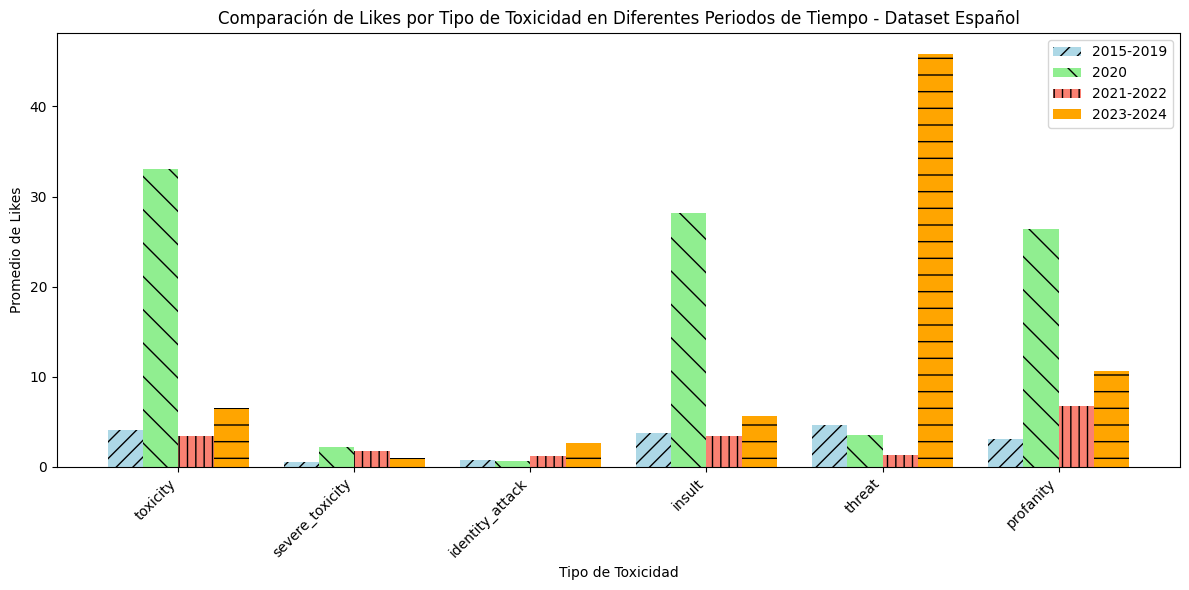

In [51]:
# Calcular la media de likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_toe = []
mgs_2020_toe = []
mgs_2021_2022_toe = []
mgs_2023_2024_toe = []

# Calcular la media de likes de cada columna en los dataframes
for column in toxicity_columns:
    mgs_2015_2019_mean_toe = df_2015_2019_toe[column]['likeCount'].mean()
    mgs_2020_mean_toe = df_2020_toe[column]['likeCount'].mean()
    mgs_2021_2022_mean_toe = df_2021_2022_toe[column]['likeCount'].mean()
    mgs_2023_2024_mean_toe = df_2023_2024_toe[column]['likeCount'].mean()
    
    mgs_2015_2019_toe.append(mgs_2015_2019_mean_toe)
    mgs_2020_toe.append(mgs_2020_mean_toe)
    mgs_2021_2022_toe.append(mgs_2021_2022_mean_toe)
    mgs_2023_2024_toe.append(mgs_2023_2024_mean_toe)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Likes')
ax.set_title('Comparación de Likes por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset Español')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

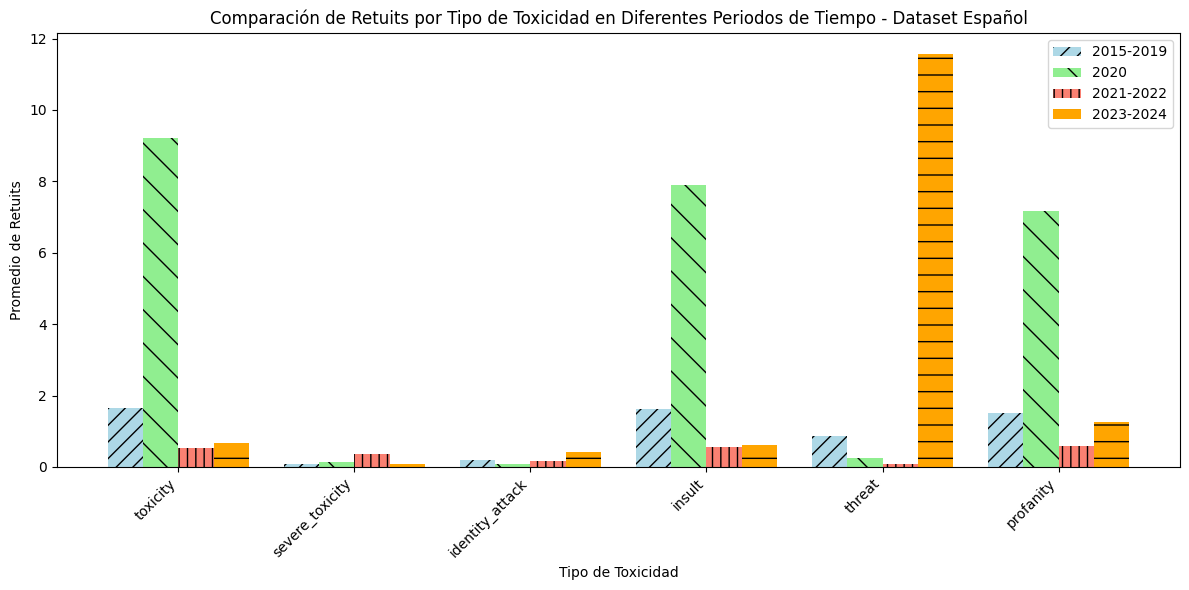

In [52]:
# Calcular la media de retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_toe = []
rts_2020_toe = []
rts_2021_2022_toe = []
rts_2023_2024_toe = []

# Lista de las columnas de toxicidad a comparar
toxicity_columns = ['toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'threat', 'profanity']

# Calcular la media de retuits de cada columna en los dataframes
for column in toxicity_columns:
    rts_2015_2019_mean_toe = df_2015_2019_toe[column]['retweetCount'].mean()
    rts_2020_mean_toe = df_2020_toe[column]['retweetCount'].mean()
    rts_2021_2022_mean_toe = df_2021_2022_toe[column]['retweetCount'].mean()
    rts_2023_2024_mean_toe = df_2023_2024_toe[column]['retweetCount'].mean()
    
    rts_2015_2019_toe.append(rts_2015_2019_mean_toe)
    rts_2020_toe.append(rts_2020_mean_toe)
    rts_2021_2022_toe.append(rts_2021_2022_mean_toe)
    rts_2023_2024_toe.append(rts_2023_2024_mean_toe)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años
rects1 = ax.bar(x - width*1.5, rts_2015_2019_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Promedio de Retuits')
ax.set_title('Comparación de Retuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset Español')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

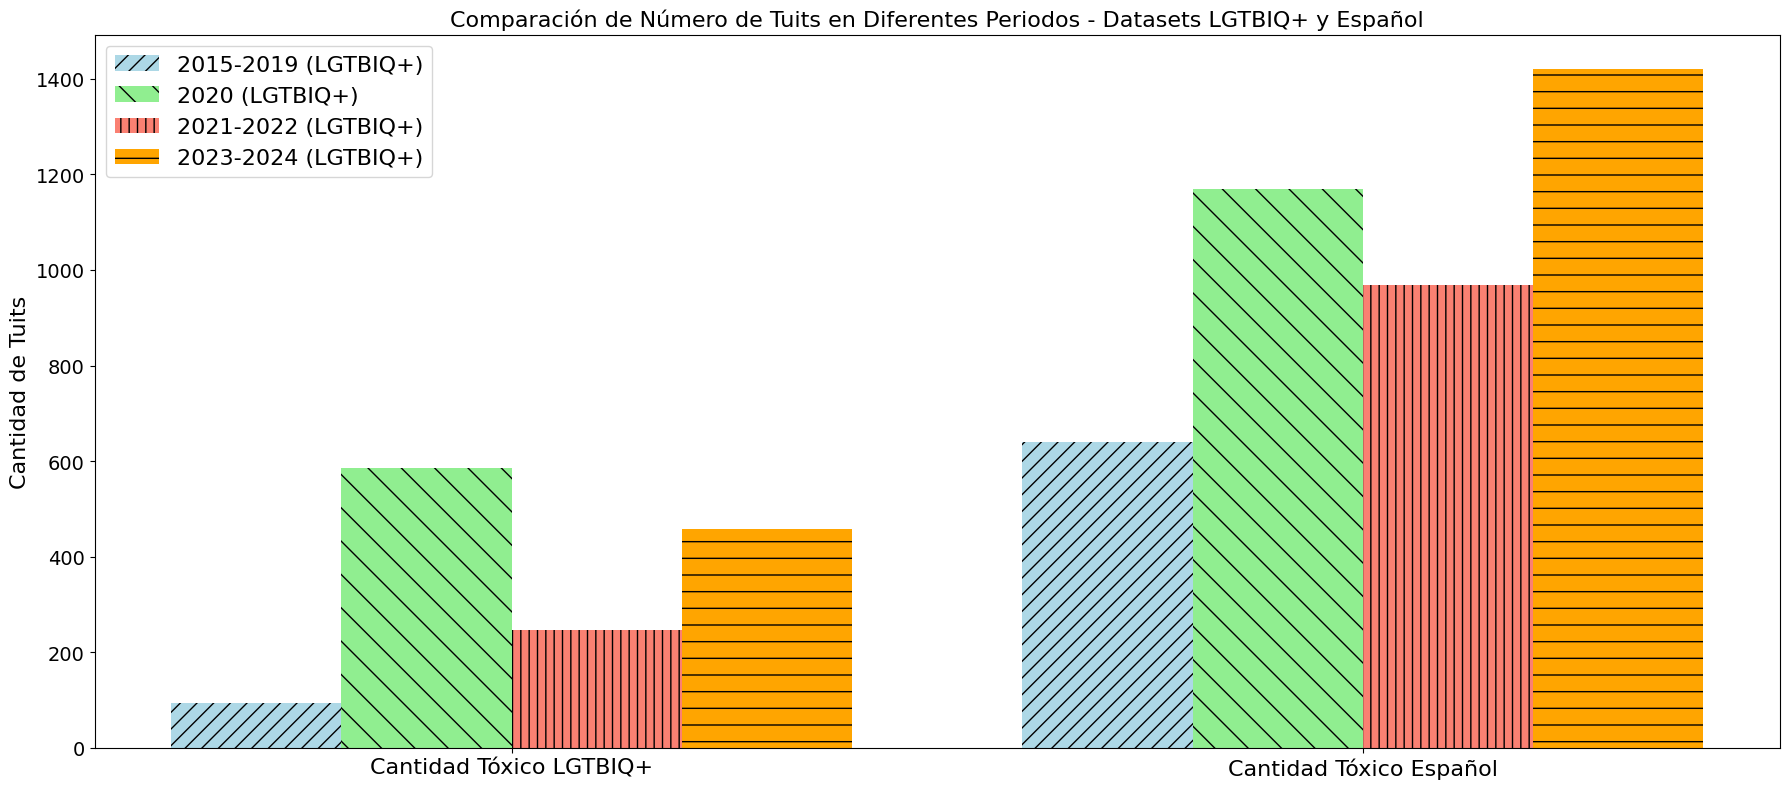

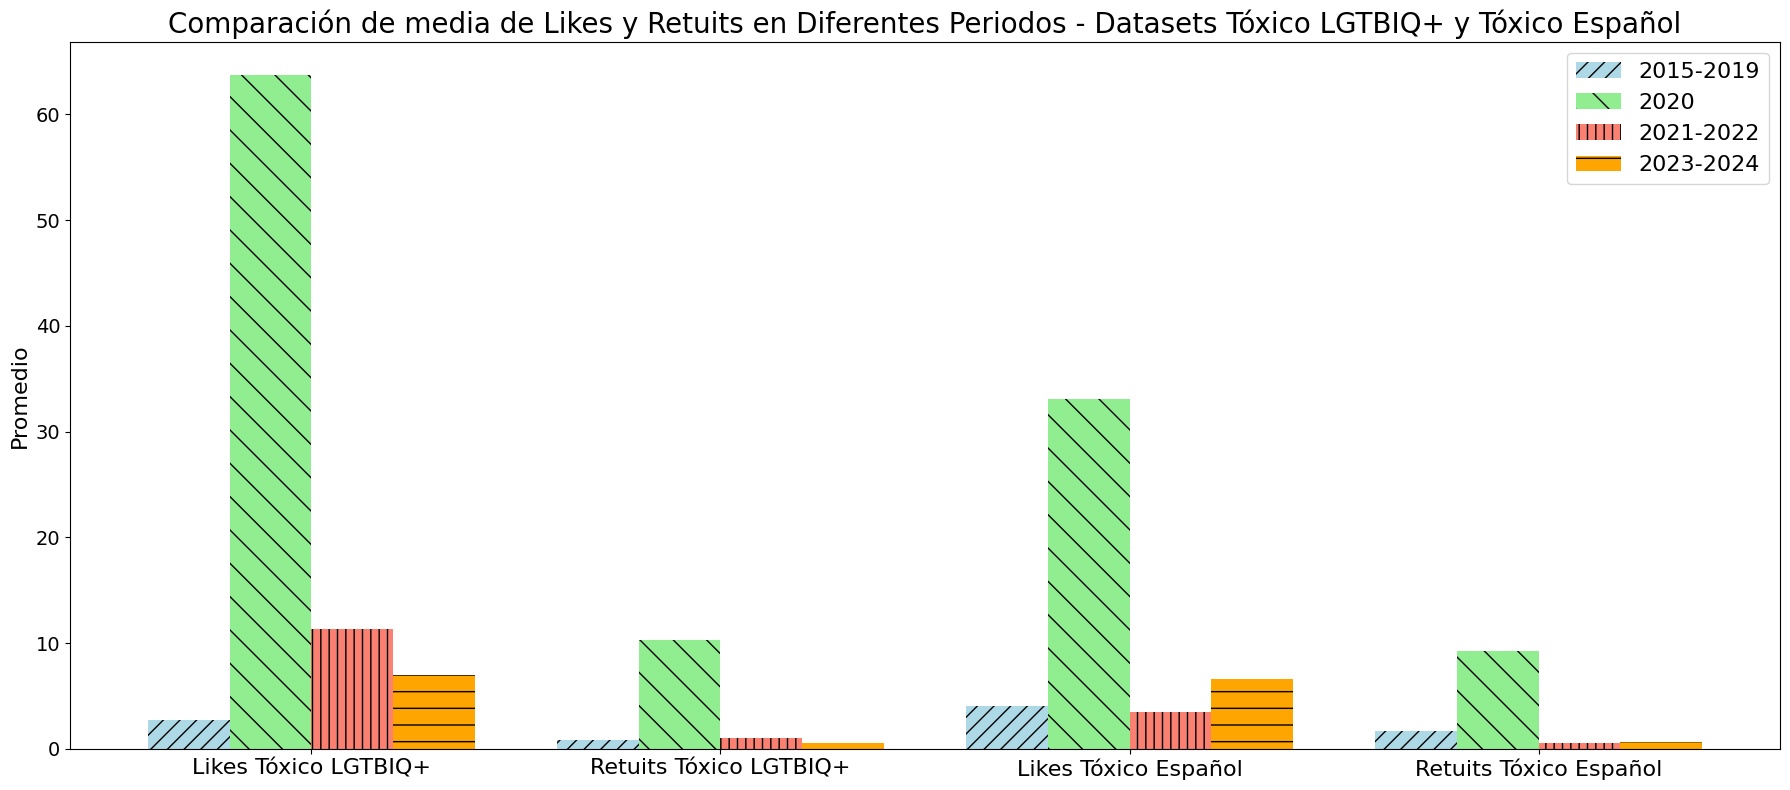

In [53]:
# Crear la figura y los ejes para la comparación de los números de tuits (longitudes)
fig, ax1 = plt.subplots(figsize=(18, 8))

# Configuración de las posiciones de las barras para el número de tuits
x1 = np.arange(2)  # Solo una barra para la comparación de número de tuits
width = 0.2  # Ancho de las barras

# Crear las barras para cada grupo de años para el número de tuits (Dataset LGTBIQ+)
rects1 = ax1.bar(x1 - width*1.5, [lengths_2015_2019[0], lengths_2015_2019_toe[0]], width, label='2015-2019 (LGTBIQ+)', color='lightblue', hatch='//')
rects2 = ax1.bar(x1 - width/2, [lengths_2020[0], lengths_2020_toe[0]], width, label='2020 (LGTBIQ+)', color='lightgreen', hatch='\\')
rects3 = ax1.bar(x1 + width/2, [lengths_2021_2022[0], lengths_2021_2022_toe[0]], width, label='2021-2022 (LGTBIQ+)', color='salmon', hatch='||')
rects4 = ax1.bar(x1 + width*1.5, [lengths_2023_2024[0], lengths_2023_2024_toe[0]], width, label='2023-2024 (LGTBIQ+)', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de números de tuits
ax1.set_xlabel(None)
ax1.set_ylabel('Cantidad de Tuits', fontsize=16)
ax1.set_title('Comparación de Número de Tuits en Diferentes Periodos - Datasets LGTBIQ+ y Español', fontsize=16)
ax1.set_xticks(x1)
ax1.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax1.set_xticklabels(['Cantidad Tóxico LGTBIQ+', 'Cantidad Tóxico Español'], fontsize=16)
ax1.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Crear la figura para la comparación de likes y retuits
fig2, ax2 = plt.subplots(figsize=(18, 8))

# Configuración de las posiciones de las barras para likes y retuits
x2 = np.arange(4)  # Dos barras para Likes y Retuits

# Crear las barras para cada grupo de años para likes y retuits (Dataset LGTBIQ+)
rects9 = ax2.bar(x2 - width*1.5, [mgs_2015_2019[0], rts_2015_2019[0], mgs_2015_2019_toe[0], rts_2015_2019_toe[0]], width, label='2015-2019', color='lightblue', hatch='//')
rects10 = ax2.bar(x2 - width/2, [mgs_2020[0], rts_2020[0], mgs_2020_toe[0], rts_2020_toe[0]], width, label='2020', color='lightgreen', hatch='\\')
rects11 = ax2.bar(x2 + width/2, [mgs_2021_2022[0], rts_2021_2022[0], mgs_2021_2022_toe[0], rts_2021_2022_toe[0]], width, label='2021-2022', color='salmon', hatch='||')
rects12 = ax2.bar(x2 + width*1.5, [mgs_2023_2024[0], rts_2023_2024[0], mgs_2023_2024_toe[0], rts_2023_2024_toe[0]], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de likes y retuits
ax2.set_xlabel(None)
ax2.set_ylabel('Promedio', fontsize=16)
ax2.set_title('Comparación de media de Likes y Retuits en Diferentes Periodos - Datasets Tóxico LGTBIQ+ y Tóxico Español', fontsize=20)
ax2.set_xticks(x2)
ax2.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax2.set_xticklabels(['Likes Tóxico LGTBIQ+', 'Retuits Tóxico LGTBIQ+', 'Likes Tóxico Español', 'Retuits Tóxico Español'], fontsize=16)
ax2.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


ahora mostramos la situacion de los tuits relacionados con el colectivo en general

In [54]:
# Filtrar el DataFrame en los diferentes grupos de años
df_2015_2019_o = df_orgullo[(df_orgullo['year'] >= 2015) & (df_orgullo['year'] <= 2019)]
df_2020_o = df_orgullo[df_orgullo['year'] == 2020]
df_2021_2022_o = df_orgullo[(df_orgullo['year'] >= 2021) & (df_orgullo['year'] <= 2022)]
df_2023_2024_o = df_orgullo[(df_orgullo['year'] >= 2023) & (df_orgullo['year'] <= 2024)]

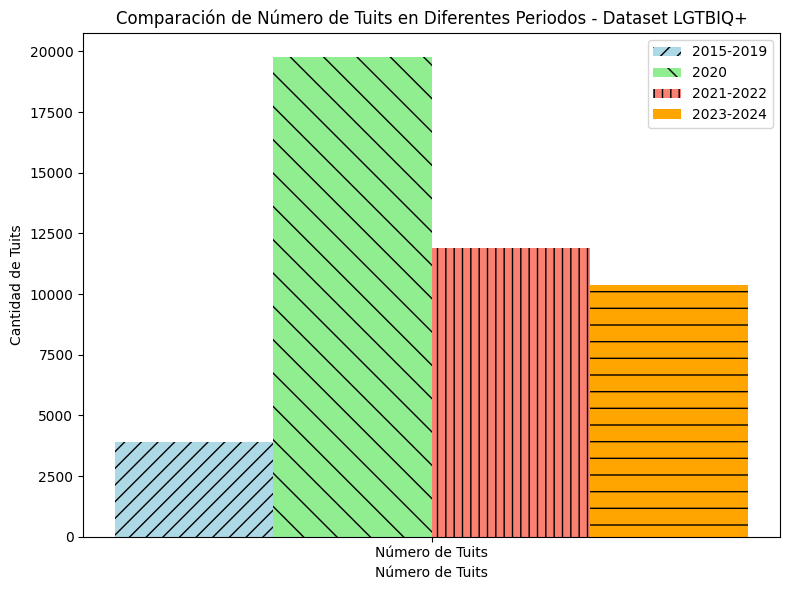

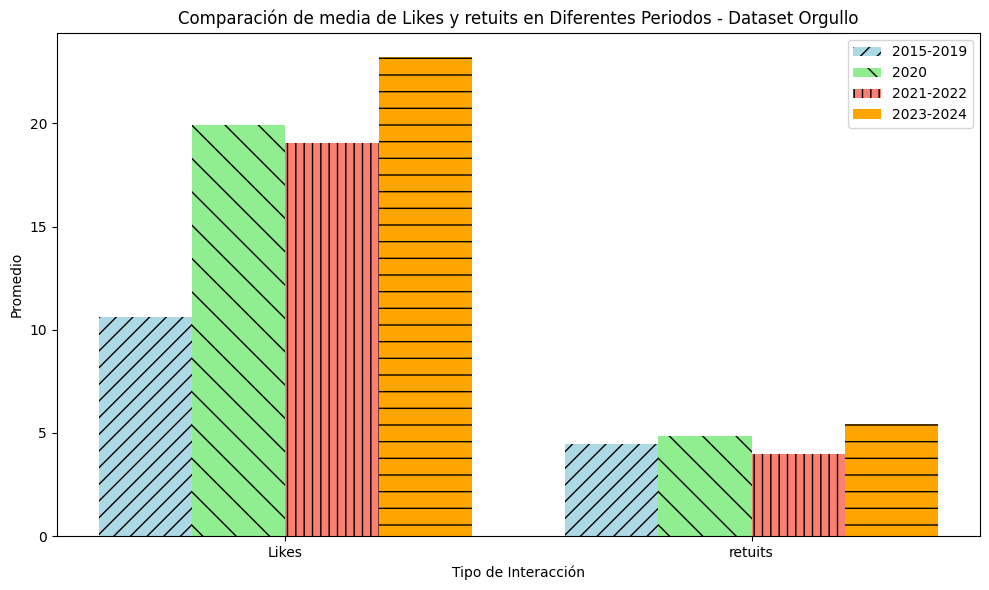

In [55]:
# Calcular la longitud de los DataFrames para cada grupo de años
lengths_2015_2019_o = len(df_2015_2019_o) / 5
lengths_2020_o = len(df_2020_o)
lengths_2021_2022_o = len(df_2021_2022_o) / 2
lengths_2023_2024_o = len(df_2023_2024_o) / 2

# Calcular la media de likes y retuits para cada grupo de años
mgs_2015_2019_o = df_2015_2019_o['likeCount'].mean()
mgs_2020_o = df_2020_o['likeCount'].mean()
mgs_2021_2022_o = df_2021_2022_o['likeCount'].mean()
mgs_2023_2024_o = df_2023_2024_o['likeCount'].mean()

rts_2015_2019_o = df_2015_2019_o['retweetCount'].mean()
rts_2020_o = df_2020_o['retweetCount'].mean()
rts_2021_2022_o = df_2021_2022_o['retweetCount'].mean()
rts_2023_2024_o = df_2023_2024_o['retweetCount'].mean()

# Configuración de las posiciones de las barras para el número de tuits
x1 = np.arange(1)  # Solo una barra para la comparación de número de tuits
width = 0.2  # Ancho de las barras

# Crear la figura para la comparación de número de tuits
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Crear las barras para cada grupo de años para número de tuits
rects1 = ax1.bar(x1 - width*1.5, [lengths_2015_2019_o], width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax1.bar(x1 - width/2, [lengths_2020_o], width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax1.bar(x1 + width/2, [lengths_2021_2022_o], width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax1.bar(x1 + width*1.5, [lengths_2023_2024_o], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 1
ax1.set_xlabel('Número de Tuits')
ax1.set_ylabel('Cantidad de Tuits')
ax1.set_title('Comparación de Número de Tuits en Diferentes Periodos - Dataset LGTBIQ+')
ax1.set_xticks(x1)
ax1.set_xticklabels(['Número de Tuits'])
ax1.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Crear la figura para la comparación de likes y retuits
x2 = np.arange(2)  # Dos barras para Likes y retuits
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Crear las barras para cada grupo de años para likes y retuits
rects5 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_o, rts_2015_2019_o], width, label='2015-2019', color='lightblue', hatch='//')
rects6 = ax2.bar(x2 - width/2, [mgs_2020_o, rts_2020_o], width, label='2020', color='lightgreen', hatch='\\')
rects7 = ax2.bar(x2 + width/2, [mgs_2021_2022_o, rts_2021_2022_o], width, label='2021-2022', color='salmon', hatch='||')
rects8 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_o, rts_2023_2024_o], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 2
ax2.set_xlabel('Tipo de Interacción')
ax2.set_ylabel('Promedio')
ax2.set_title('Comparación de media de Likes y retuits en Diferentes Periodos - Dataset Orgullo')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Likes', 'retuits'])
ax2.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


In [56]:
# Filtrar el DataFrame en los diferentes grupos de años
df_2015_2019_e = df_espanol[(df_espanol['year'] >= 2015) & (df_espanol['year'] <= 2019)]
df_2020_e = df_espanol[df_espanol['year'] == 2020]
df_2021_2022_e = df_espanol[(df_espanol['year'] >= 2021) & (df_espanol['year'] <= 2022)]
df_2023_2024_e = df_espanol[(df_espanol['year'] >= 2023) & (df_espanol['year'] <= 2024)]

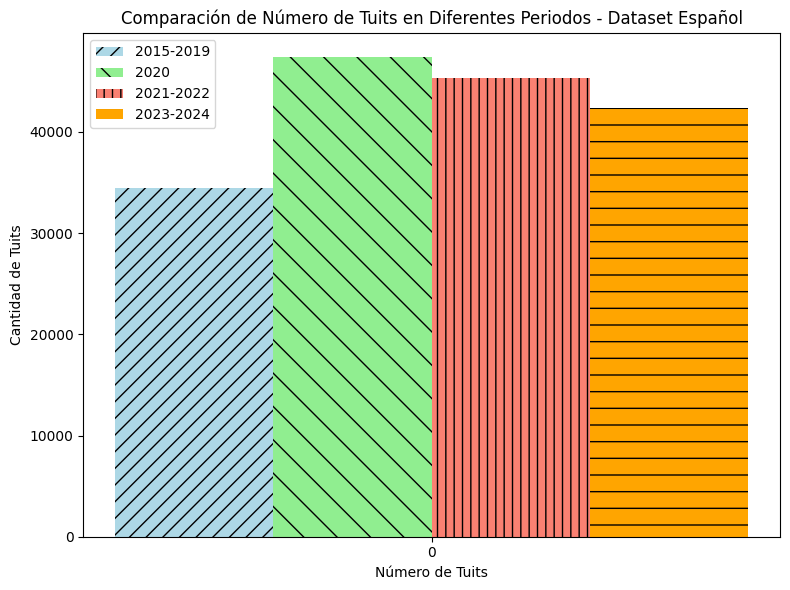

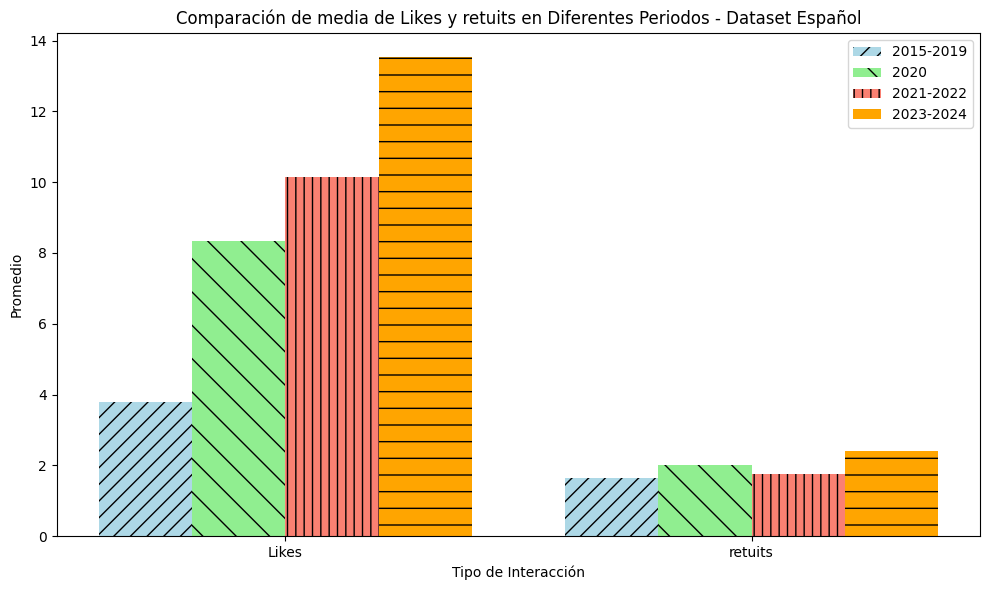

In [57]:
# Calcular la longitud de los DataFrames para cada grupo de años
lengths_2015_2019_e = len(df_2015_2019_e) / 5
lengths_2020_e = len(df_2020_e)
lengths_2021_2022_e = len(df_2021_2022_e) / 2
lengths_2023_2024_e = len(df_2023_2024_e) / 2

# Calcular la media de likes y retuits para cada grupo de años
mgs_2015_2019_e = df_2015_2019_e['likeCount'].mean()
mgs_2020_e = df_2020_e['likeCount'].mean()
mgs_2021_2022_e = df_2021_2022_e['likeCount'].mean()
mgs_2023_2024_e = df_2023_2024_e['likeCount'].mean()

rts_2015_2019_e = df_2015_2019_e['retweetCount'].mean()
rts_2020_e = df_2020_e['retweetCount'].mean()
rts_2021_2022_e = df_2021_2022_e['retweetCount'].mean()
rts_2023_2024_e = df_2023_2024_e['retweetCount'].mean()

# Configuración de las posiciones de las barras para el número de tuits
x1 = np.arange(1)  # Solo una barra para la comparación de número de tuits
width = 0.2  # Ancho de las barras

# Crear la figura para la comparación de número de tuits
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Crear las barras para cada grupo de años para número de tuits
rects1 = ax1.bar(x1 - width*1.5, [lengths_2015_2019_e], width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax1.bar(x1 - width/2, [lengths_2020_e], width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax1.bar(x1 + width/2, [lengths_2021_2022_e], width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax1.bar(x1 + width*1.5, [lengths_2023_2024_e], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 1
ax1.set_xlabel('Número de Tuits')
ax1.set_ylabel('Cantidad de Tuits')
ax1.set_title('Comparación de Número de Tuits en Diferentes Periodos - Dataset Español')
ax1.set_xticks(x1)
ax1.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Crear la figura para la comparación de likes y retuits
x2 = np.arange(2)  # Dos barras para Likes y retuits
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Crear las barras para cada grupo de años para likes y retuits
rects5 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_e, rts_2015_2019_e], width, label='2015-2019', color='lightblue', hatch='//')
rects6 = ax2.bar(x2 - width/2, [mgs_2020_e, rts_2020_e], width, label='2020', color='lightgreen', hatch='\\')
rects7 = ax2.bar(x2 + width/2, [mgs_2021_2022_e, rts_2021_2022_e], width, label='2021-2022', color='salmon', hatch='||')
rects8 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_e, rts_2023_2024_e], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 2
ax2.set_xlabel('Tipo de Interacción')
ax2.set_ylabel('Promedio')
ax2.set_title('Comparación de media de Likes y retuits en Diferentes Periodos - Dataset Español')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Likes', 'retuits'])
ax2.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


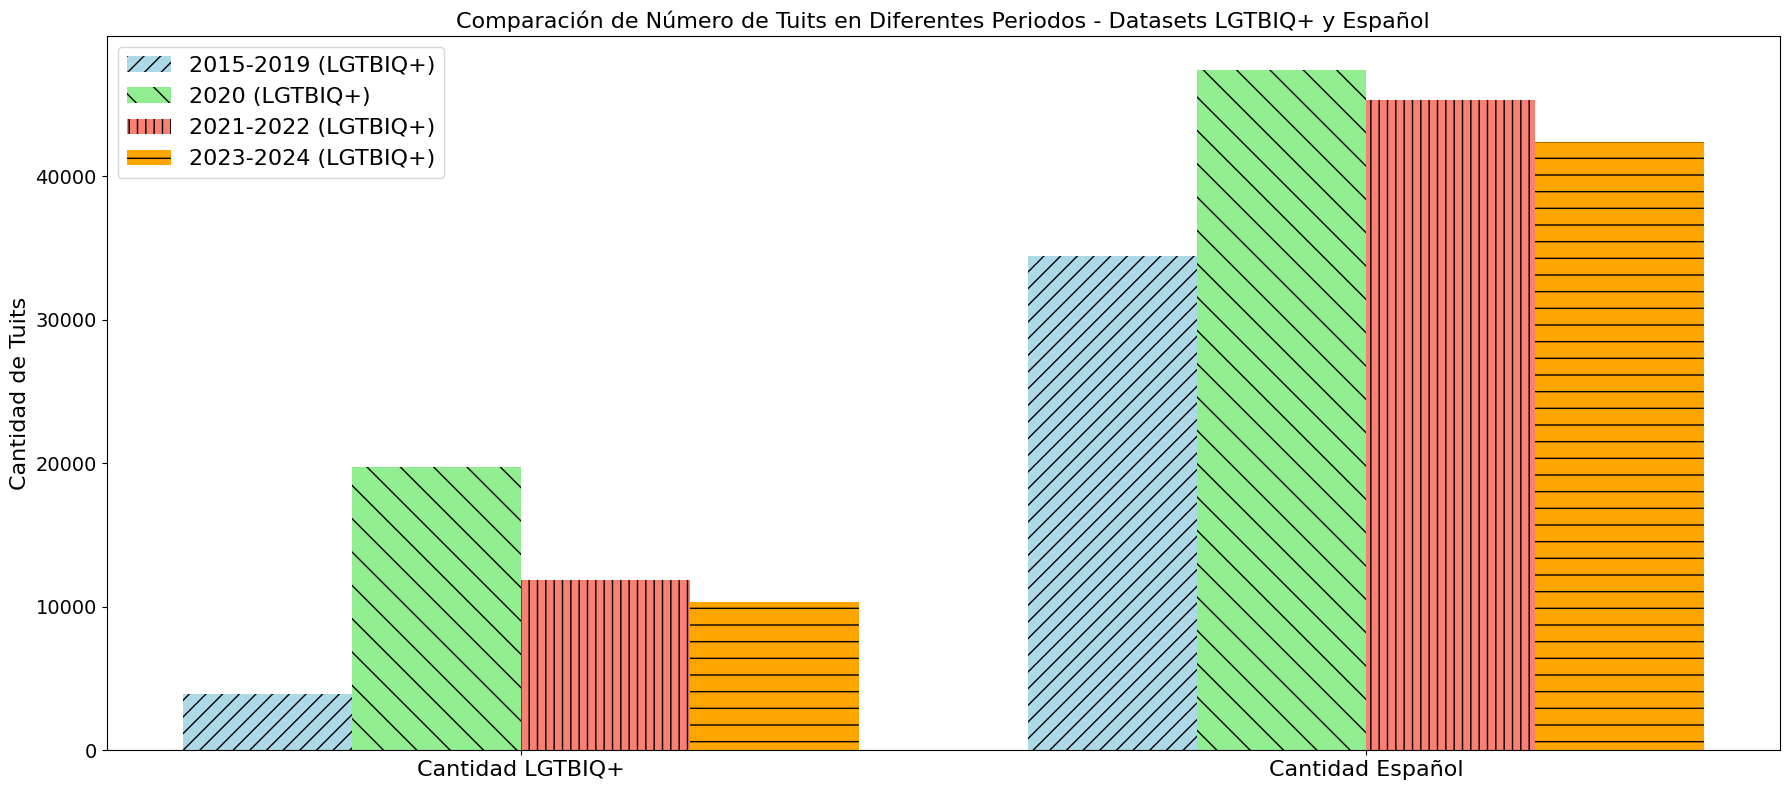

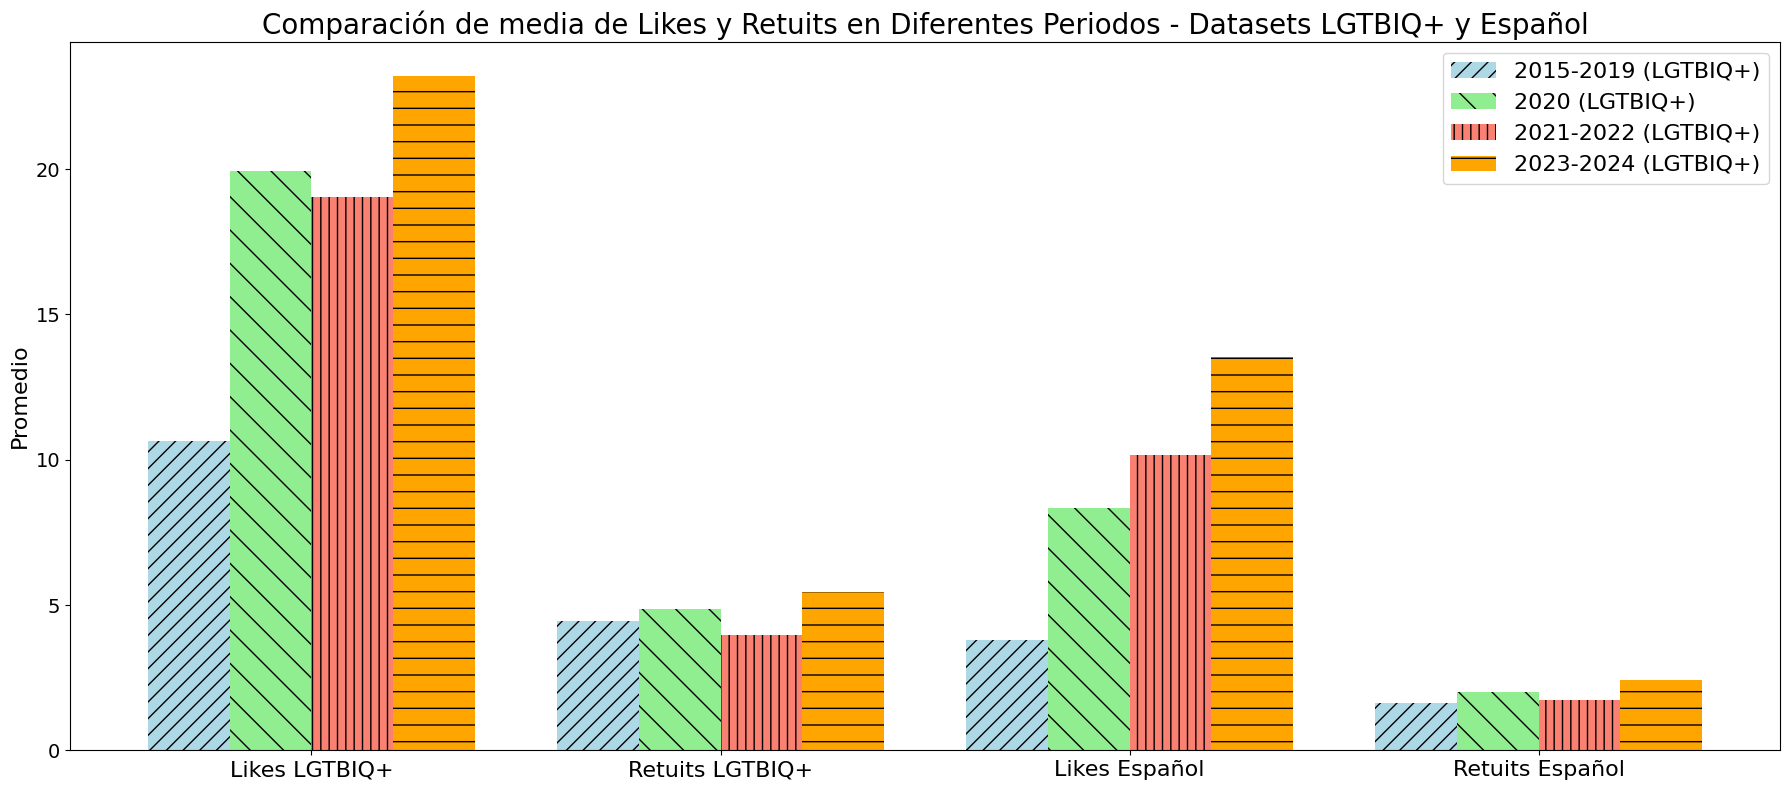

In [58]:
# Crear la figura y los ejes para la comparación de los números de tuits (longitudes)
fig, ax1 = plt.subplots(figsize=(18, 8))

# Configuración de las posiciones de las barras para el número de tuits
x1 = np.arange(2)  # Solo una barra para la comparación de número de tuits
width = 0.2  # Ancho de las barras

# Crear las barras para cada grupo de años para el número de tuits (Dataset LGTBIQ+)
rects1 = ax1.bar(x1 - width*1.5, [lengths_2015_2019_o, lengths_2015_2019_e], width, label='2015-2019 (LGTBIQ+)', color='lightblue', hatch='//')
rects2 = ax1.bar(x1 - width/2, [lengths_2020_o, lengths_2020_e], width, label='2020 (LGTBIQ+)', color='lightgreen', hatch='\\')
rects3 = ax1.bar(x1 + width/2, [lengths_2021_2022_o, lengths_2021_2022_e], width, label='2021-2022 (LGTBIQ+)', color='salmon', hatch='||')
rects4 = ax1.bar(x1 + width*1.5, [lengths_2023_2024_o, lengths_2023_2024_e], width, label='2023-2024 (LGTBIQ+)', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de números de tuits
ax1.set_xlabel(None)
ax1.set_ylabel('Cantidad de Tuits', fontsize=16)
ax1.set_title('Comparación de Número de Tuits en Diferentes Periodos - Datasets LGTBIQ+ y Español', fontsize=16)
ax1.set_xticks(x1)
ax1.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax1.set_xticklabels(['Cantidad LGTBIQ+', 'Cantidad Español'], fontsize=16)
ax1.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Crear la figura para la comparación de likes y retuits
fig2, ax2 = plt.subplots(figsize=(18, 8))

# Configuración de las posiciones de las barras para likes y retuits
x2 = np.arange(4)  # Dos barras para Likes y Retuits

# Crear las barras para cada grupo de años para likes y retuits (Dataset LGTBIQ+)
rects9 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_o, rts_2015_2019_o, mgs_2015_2019_e, rts_2015_2019_e], width, label='2015-2019 (LGTBIQ+)', color='lightblue', hatch='//')
rects10 = ax2.bar(x2 - width/2, [mgs_2020_o, rts_2020_o, mgs_2020_e, rts_2020_e], width, label='2020 (LGTBIQ+)', color='lightgreen', hatch='\\')
rects11 = ax2.bar(x2 + width/2, [mgs_2021_2022_o, rts_2021_2022_o, mgs_2021_2022_e, rts_2021_2022_e], width, label='2021-2022 (LGTBIQ+)', color='salmon', hatch='||')
rects12 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_o, rts_2023_2024_o, mgs_2023_2024_e, rts_2023_2024_e], width, label='2023-2024 (LGTBIQ+)', color='orange', hatch='-')

# Añadir etiquetas y título para la figura de likes y retuits
ax2.set_xlabel(None)
ax2.set_ylabel('Promedio', fontsize=16)
ax2.set_title('Comparación de media de Likes y Retuits en Diferentes Periodos - Datasets LGTBIQ+ y Español', fontsize=20)
ax2.set_xticks(x2)
ax2.tick_params(axis='y', labelsize=14)  # Cambiar el tamaño de las etiquetas del eje y
ax2.set_xticklabels(['Likes LGTBIQ+', 'Retuits LGTBIQ+', 'Likes Español', 'Retuits Español'], fontsize=16)
ax2.legend(fontsize=16)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


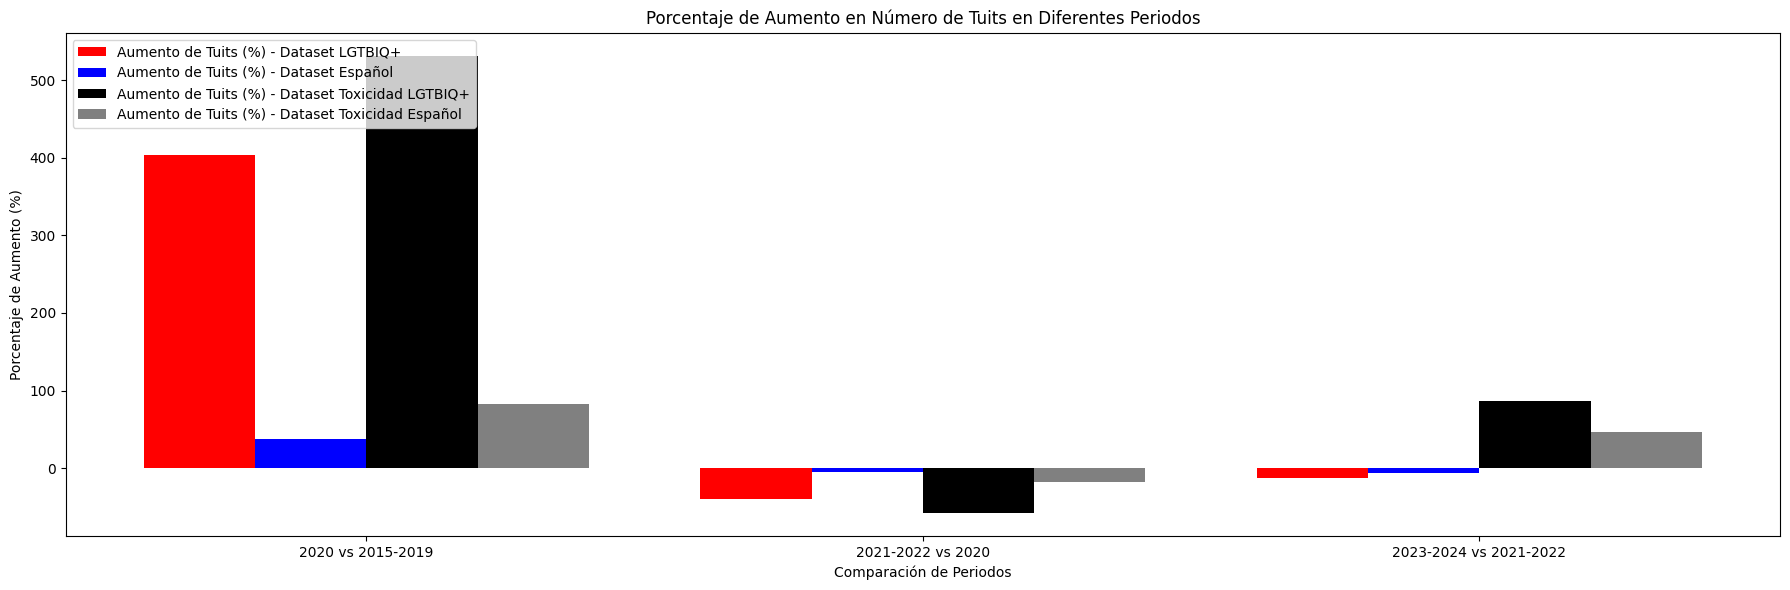

In [59]:
# Cálculo del aumento en el número de tuits (datos 'o')
aumento_2020_vs_2015_2019_tuits_o = calcular_aumento(lengths_2015_2019_o, lengths_2020_o)
aumento_2021_2022_vs_2020_tuits_o = calcular_aumento(lengths_2020_o, lengths_2021_2022_o)
aumento_2023_2024_vs_2021_2022_tuits_o = calcular_aumento(lengths_2021_2022_o, lengths_2023_2024_o)

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits_e = calcular_aumento(lengths_2015_2019_e, lengths_2020_e)
aumento_2021_2022_vs_2020_tuits_e = calcular_aumento(lengths_2020_e, lengths_2021_2022_e)
aumento_2023_2024_vs_2021_2022_tuits_e = calcular_aumento(lengths_2021_2022_e, lengths_2023_2024_e)

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits = calcular_aumento(lengths_2015_2019[0], lengths_2020[0])
aumento_2021_2022_vs_2020_tuits = calcular_aumento(lengths_2020[0], lengths_2021_2022[0])
aumento_2023_2024_vs_2021_2022_tuits = calcular_aumento(lengths_2021_2022[0], lengths_2023_2024[0])

# Cálculo del aumento en el número de tuits (datos 'e')
aumento_2020_vs_2015_2019_tuits_toe = calcular_aumento(lengths_2015_2019_toe[0], lengths_2020_toe[0])
aumento_2021_2022_vs_2020_tuits_toe = calcular_aumento(lengths_2020_toe[0], lengths_2021_2022_toe[0])
aumento_2023_2024_vs_2021_2022_tuits_toe = calcular_aumento(lengths_2021_2022_toe[0], lengths_2023_2024_toe[0])

# Crear los datos para la visualización de los aumentos de tuits
aumentos_tuits_o = [aumento_2020_vs_2015_2019_tuits_o, aumento_2021_2022_vs_2020_tuits_o, aumento_2023_2024_vs_2021_2022_tuits_o]
aumentos_tuits_e = [aumento_2020_vs_2015_2019_tuits_e, aumento_2021_2022_vs_2020_tuits_e, aumento_2023_2024_vs_2021_2022_tuits_e]
aumentos_tuits = [aumento_2020_vs_2015_2019_tuits, aumento_2021_2022_vs_2020_tuits, aumento_2023_2024_vs_2021_2022_tuits]
aumentos_tuits_toe = [aumento_2020_vs_2015_2019_tuits_toe, aumento_2021_2022_vs_2020_tuits_toe, aumento_2023_2024_vs_2021_2022_tuits_toe]

# Configuración de las posiciones de las barras para comparar los aumentos
x1 = np.arange(3)  # Tres barras (una por cada comparación de aumento)
width = 0.2  # Ancho de las barras

# Crear la figura para los aumentos de número de tuits y longitudes de los tuits en 2015-2019
fig, ax1 = plt.subplots(figsize=(18, 6))

# Crear las barras para los porcentajes de aumento en número de tuits (Dataset LGTBIQ+)
rects1 = ax1.bar(x1 - 1.5 * width, aumentos_tuits_o, width, label='Aumento de Tuits (%) - Dataset LGTBIQ+', color='r')

# Crear las barras para los porcentajes de aumento en número de tuits (Dataset Español)
rects2 = ax1.bar(x1 - 0.5 * width, aumentos_tuits_e, width, label='Aumento de Tuits (%) - Dataset Español', color='b')

# Crear las barras para los porcentajes de aumento en número de tuits (Dataset Toxicidad LGTBIQ+)
rects3 = ax1.bar(x1 + 0.5 * width, aumentos_tuits, width, label='Aumento de Tuits (%) - Dataset Toxicidad LGTBIQ+', color='black')

# Crear las barras para los porcentajes de aumento en número de tuits (Dataset Toxicidad Español)
rects4 = ax1.bar(x1 + 1.5 * width, aumentos_tuits_toe, width, label='Aumento de Tuits (%) - Dataset Toxicidad Español', color='gray')

# Añadir etiquetas y título para la figura
ax1.set_xlabel('Comparación de Periodos')
ax1.set_ylabel('Porcentaje de Aumento (%)')
ax1.set_title('Porcentaje de Aumento en Número de Tuits en Diferentes Periodos')
ax1.set_xticks(x1)
ax1.set_xticklabels(['2020 vs 2015-2019', '2021-2022 vs 2020', '2023-2024 vs 2021-2022'])

# Añadir las leyendas
ax1.legend(loc='upper left')

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [60]:
# Imprimir los porcentajes de aumento
print("Porcentaje de aumento de tuits - Dataset LGTBIQ+:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_o:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_o:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_o:.2f}%")

print("\nPorcentaje de aumento de tuits - Dataset Español:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_e:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_e:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_e:.2f}%")

print("\nPorcentaje de aumento de tuits - Dataset Toxicidad LGTBIQ+:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits:.2f}%")

print("\nPorcentaje de aumento de tuits - Dataset Toxicidad Español:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_toe:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_toe:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_toe:.2f}%")

Porcentaje de aumento de tuits - Dataset LGTBIQ+:
2020 vs 2015-2019: 404.08%
2021-2022 vs 2020: -39.93%
2023-2024 vs 2021-2022: -12.81%

Porcentaje de aumento de tuits - Dataset Español:
2020 vs 2015-2019: 37.56%
2021-2022 vs 2020: -4.44%
2023-2024 vs 2021-2022: -6.51%

Porcentaje de aumento de tuits - Dataset Toxicidad LGTBIQ+:
2020 vs 2015-2019: 531.47%
2021-2022 vs 2020: -58.11%
2023-2024 vs 2021-2022: 86.15%

Porcentaje de aumento de tuits - Dataset Toxicidad Español:
2020 vs 2015-2019: 82.94%
2021-2022 vs 2020: -17.19%
2023-2024 vs 2021-2022: 46.80%


puedo hacer una tabla con lo de todos los atributos no seeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

In [61]:
# Imprimir los porcentajes de aumento
print("Porcentaje de aumento de tuits - Dataset O:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_o:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_o:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_o:.2f}%")

print("\nPorcentaje de aumento de tuits - Dataset E:")
print(f"2020 vs 2015-2019: {aumento_2020_vs_2015_2019_tuits_e:.2f}%")
print(f"2021-2022 vs 2020: {aumento_2021_2022_vs_2020_tuits_e:.2f}%")
print(f"2023-2024 vs 2021-2022: {aumento_2023_2024_vs_2021_2022_tuits_e:.2f}%")

Porcentaje de aumento de tuits - Dataset O:
2020 vs 2015-2019: 404.08%
2021-2022 vs 2020: -39.93%
2023-2024 vs 2021-2022: -12.81%

Porcentaje de aumento de tuits - Dataset E:
2020 vs 2015-2019: 37.56%
2021-2022 vs 2020: -4.44%
2023-2024 vs 2021-2022: -6.51%


cantidad con respecto al total

In [62]:
# Calcular la longitud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019_t = []
lengths_2020_t = []
lengths_2021_2022_t = []
lengths_2023_2024_t = []

# Calcular las longitudes de cada columna en los dataframes
for i in range(0,len(toxicity_columns)):
    len_2015_2019_t = lengths_2015_2019[i] / lengths_2015_2019_o
    len_2020_t = lengths_2020[i] / lengths_2020_o
    len_2021_2022_t = lengths_2021_2022[i] / lengths_2021_2022_o
    len_2023_2024_t = lengths_2023_2024[i] / lengths_2023_2024_o
    
    lengths_2015_2019_t.append(len_2015_2019_t)
    lengths_2020_t.append(len_2020_t)
    lengths_2021_2022_t.append(len_2021_2022_t)
    lengths_2023_2024_t.append(len_2023_2024_t)

Aumento de longitudes entre 2015-2019 y 2020:
[25.27121123872171, 32.25447557398604, 67.86144976698229, 32.938550447644594, -31.329406913507253, 21.43736568907668]

Aumento de longitudes entre 2020 y 2021-2022:
[-30.253347058962976, -73.24382836696034, -60.27113909033505, -29.75166372846305, -81.50190603147874, -28.930012080605756]

Aumento de longitudes entre 2021-2022 y 2023-2024:
[113.49991228753326, 690.1002102914039, 276.84503117585393, 127.05279449955566, 129.38393202008496, 58.26588223039326]


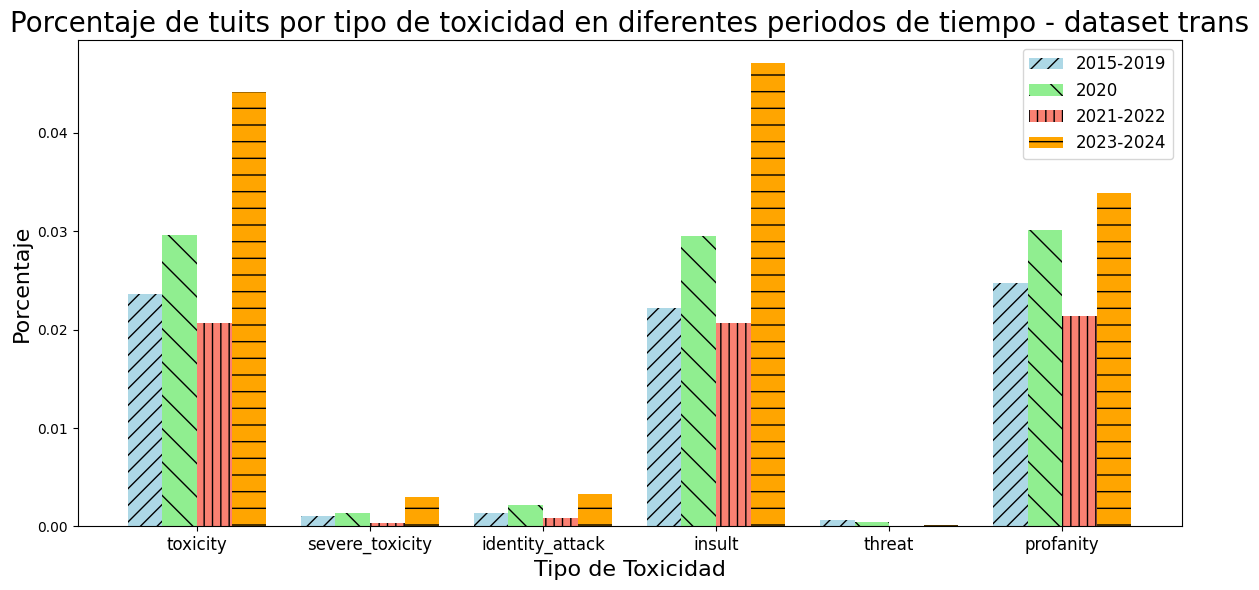

In [82]:
# Calcular el aumento en las longitudes de los tuits
aumento_2015_2019_vs_2020 = [(lengths_2020_t[i] - lengths_2015_2019_t[i]) / lengths_2015_2019_t[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022 = [(lengths_2021_2022_t[i] - lengths_2020_t[i]) / lengths_2020_t[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024 = [(lengths_2023_2024_t[i] - lengths_2021_2022_t[i]) / lengths_2021_2022_t[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos
print("Aumento de longitudes entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020)

print("\nAumento de longitudes entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022)

print("\nAumento de longitudes entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019_t, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020_t, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022_t, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024_t, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad', fontsize=16)
ax.set_ylabel('Porcentaje', fontsize=16)
ax.set_title('Porcentaje de tuits por tipo de toxicidad en diferentes periodos de tiempo - dataset trans', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, fontsize=12)
ax.legend(fontsize=12)

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [64]:
def calcular_p_value(tuits): 
    # Crear las listas para la prueba de Kruskal-Wallis
    data_for_kruskal = [
        [tuits[2015], tuits[2016], tuits[2017], tuits[2018], tuits[2019]],  # 2015-2019
        [tuits[2020]],  # 2020
        [tuits[2021], tuits[2022]],  # 2021-2022
        [tuits[2023], tuits[2024]]  # 2023-2024
    ]

    # Realizar el test de Kruskal-Wallis
    _, p_value = stats.kruskal(*data_for_kruskal)
    return p_value

In [65]:
for atributo in toxicity_columns:    
    tuits_por_año_tox_porcentaje = df_filtered[atributo].groupby('year').size() / df_orgullo.groupby('year').size() 
    p = calcular_p_value(tuits_por_año_tox_porcentaje)
    print(atributo,':', p)

toxicity : 0.170470613303421
severe_toxicity : 0.09309423194794288
identity_attack : 0.22787785591368345
insult : 0.15312065607097727
threat : nan
profanity : 0.3882734593841269


In [66]:
print(lengths_2015_2019_toe)

[639.0, 12.8, 9.8, 666.0, 47.6, 1133.6]


Aumento de longitudes entre 2015-2019 y 2020:
[32.9902929565847, 59.02095284292221, -3.5674688299480737, 52.048863018577876, -58.765275133167826, 1.3860778081096818]

Aumento de longitudes entre 2020 y 2021-2022:
[-13.346341004600818, -58.8887470107055, -23.527319614319314, -12.59398290901023, -18.608024384831086, -13.158358356924674]

Aumento de longitudes entre 2021-2022 y 2023-2024:
[57.01313803286765, 274.3564473295957, 203.98869407215295, 62.66774720356552, 88.45154491421827, 27.502936329156746]


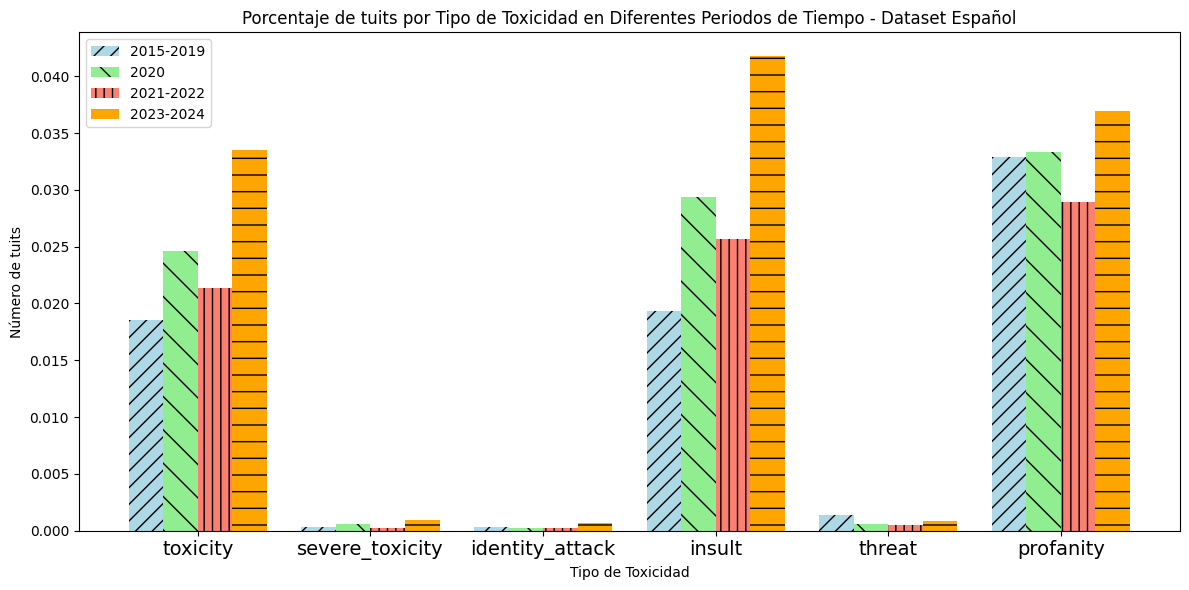

In [67]:
# Calcular la longi_ttud de los DataFrames para cada grupo de años y tipo de toxicidad
lengths_2015_2019_toe_t = []
lengths_2020_toe_t = []
lengths_2021_2022_toe_t = []
lengths_2023_2024_toe_t = []

# Calcular las longitudes de cada columna en los dataframes
for i in range(0,len(toxicity_columns)):
    len_2015_2019_toe_t = lengths_2015_2019_toe[i] / lengths_2015_2019_e
    len_2020_toe_t = lengths_2020_toe[i] / lengths_2020_e
    len_2021_2022_toe_t = lengths_2021_2022_toe[i] / lengths_2021_2022_e
    len_2023_2024_toe_t = lengths_2023_2024_toe[i] / lengths_2023_2024_e
    
    lengths_2015_2019_toe_t.append(len_2015_2019_toe_t)
    lengths_2020_toe_t.append(len_2020_toe_t)
    lengths_2021_2022_toe_t.append(len_2021_2022_toe_t)
    lengths_2023_2024_toe_t.append(len_2023_2024_toe_t)

# Calcular el aumento en las longitudes de los tuits
aumento_2015_2019_vs_2020_toe_t = [(lengths_2020_toe_t[i] - lengths_2015_2019_toe_t[i]) / lengths_2015_2019_toe_t[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022_toe_t = [(lengths_2021_2022_toe_t[i] - lengths_2020_toe_t[i]) / lengths_2020_toe_t[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024_toe_t = [(lengths_2023_2024_toe_t[i] - lengths_2021_2022_toe_t[i]) / lengths_2021_2022_toe_t[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos
print("Aumento de longitudes entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020_toe_t)

print("\nAumento de longitudes entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022_toe_t)

print("\nAumento de longitudes entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024_toe_t)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los cuatro grupos de años
rects1 = ax.bar(x - width*1.5, lengths_2015_2019_toe_t, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, lengths_2020_toe_t, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, lengths_2021_2022_toe_t, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, lengths_2023_2024_toe_t, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de tuits')
ax.set_title('Porcentaje de tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo - Dataset Español')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, fontsize=14)
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [ ]:
aumento_2020_vs_2015_2019_t = []
aumento_2021_2022_vs_2020_t = []
aumento_2023_2024_vs_2021_2022_t = []

for i, column in enumerate(toxicity_columns):
    aumento_2020_vs_2015_2019_t.append(calcular_aumento(lengths_2015_2019_t[i], lengths_2020_t[i]))
    aumento_2021_2022_vs_2020_t.append(calcular_aumento(lengths_2020_t[i], lengths_2021_2022_t[i]))
    aumento_2023_2024_vs_2021_2022_t.append(calcular_aumento(lengths_2021_2022_t[i], lengths_2023_2024_t[i]))

print(aumento_2020_vs_2015_2019_t)
print(aumento_2021_2022_vs_2020_t)
print(aumento_2023_2024_vs_2021_2022_t)


[25.27121123872171, 32.25447557398604, 67.86144976698229, 32.938550447644594, -31.329406913507253, 21.43736568907668]
[-30.253347058962976, -73.24382836696034, -60.27113909033505, -29.75166372846305, -81.50190603147874, -28.930012080605756]
[113.49991228753326, 690.1002102914039, 276.84503117585393, 127.05279449955566, 129.38393202008496, 58.26588223039326]


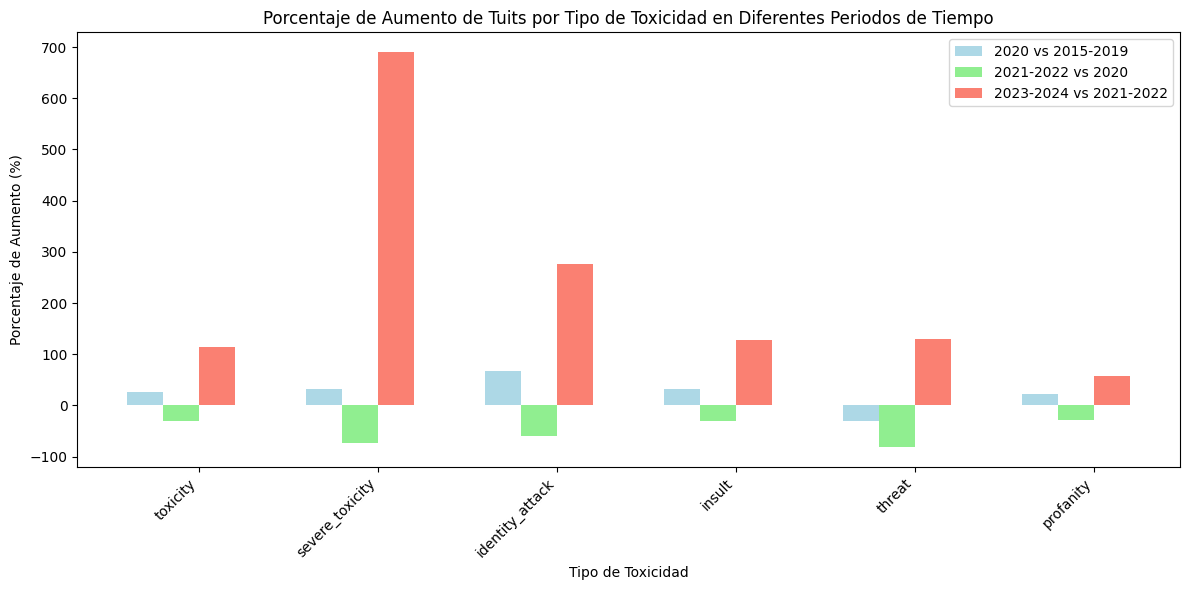

In [69]:
# Configuración de las posiciones de las barras para comparar los aumentos
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura para los porcentajes de aumento
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para los porcentajes de aumento entre los períodos
rects1 = ax.bar(x - width*1.5, aumento_2020_vs_2015_2019_t, width, label='2020 vs 2015-2019', color='lightblue')
rects2 = ax.bar(x - width/2, aumento_2021_2022_vs_2020_t, width, label='2021-2022 vs 2020', color='lightgreen')
rects3 = ax.bar(x + width/2, aumento_2023_2024_vs_2021_2022_t, width, label='2023-2024 vs 2021-2022', color='salmon')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Porcentaje de Aumento (%)')
ax.set_title('Porcentaje de Aumento de Tuits por Tipo de Toxicidad en Diferentes Periodos de Tiempo')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


### Suma de megustas

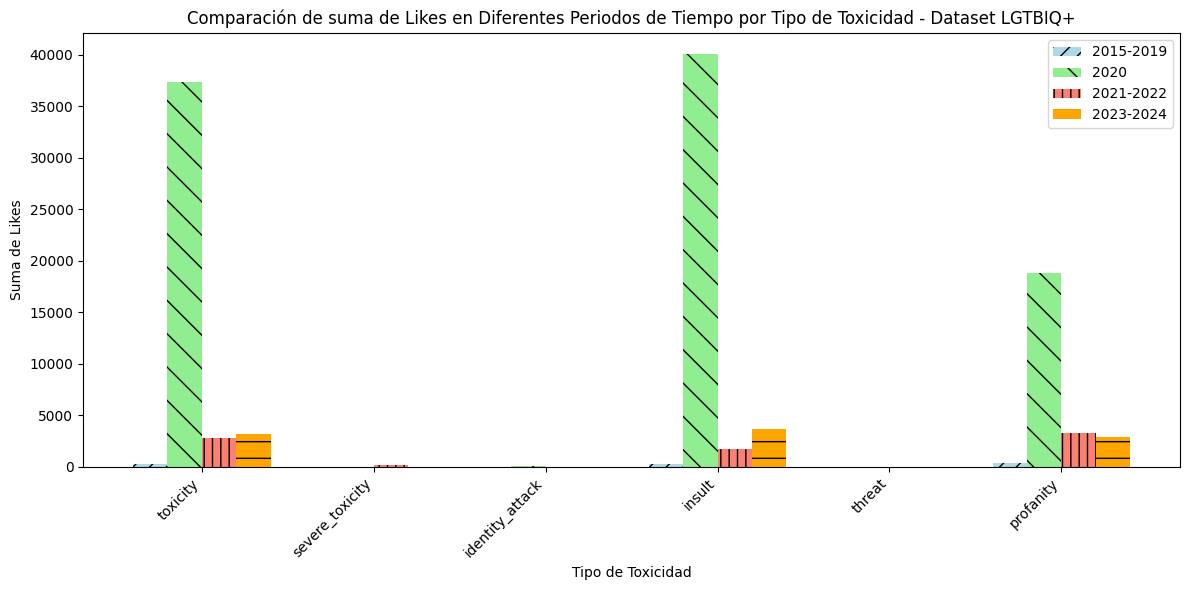

In [70]:
# Calcular la suma de los likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_s = []
mgs_2020_s = []
mgs_2021_2022_s = []
mgs_2023_2024_s = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los likes para cada columna en los dataframes de los diferentes periodos
    mgs_2015_2019_s.append(df_2015_2019[column]['likeCount'].sum()/5)
    mgs_2020_s.append(df_2020[column]['likeCount'].sum())
    mgs_2021_2022_s.append(df_2021_2022[column]['likeCount'].sum()/2)
    mgs_2023_2024_s.append(df_2023_2024[column]['likeCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para likes
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_s, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_s, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_s, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_s, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Suma de Likes')
ax.set_title('Comparación de suma de Likes en Diferentes Periodos de Tiempo por Tipo de Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [71]:
# Calcular el aumento en los likes entre los diferentes periodos
aumento_2015_2019_vs_2020 = [(mgs_2020_s[i] - mgs_2015_2019_s[i]) / mgs_2015_2019_s[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022 = [(mgs_2021_2022_s[i] - mgs_2020_s[i]) / mgs_2020_s[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024 = [(mgs_2023_2024_s[i] - mgs_2021_2022_s[i]) / mgs_2021_2022_s[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos
print("Aumento de likes entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020)

print("\nAumento de likes entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022)

print("\nAumento de likes entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024)

Aumento de likes entre 2015-2019 y 2020:
[14674.34679334917, 387.5, 2677.777777777778, 15863.375796178347, 650.0, 5560.649819494585]

Aumento de likes entre 2020 y 2021-2022:
[-92.56698821007502, 464.10256410256414, -72.5, -95.71820448877806, -8.333333333333332, -82.64508928571429]

Aumento de likes entre 2021-2022 y 2023-2024:
[14.401586157173757, -91.13636363636364, -34.54545454545455, 112.05591147350029, -77.27272727272727, -11.23870770173021]


ahora lo mismo pero con los retuits

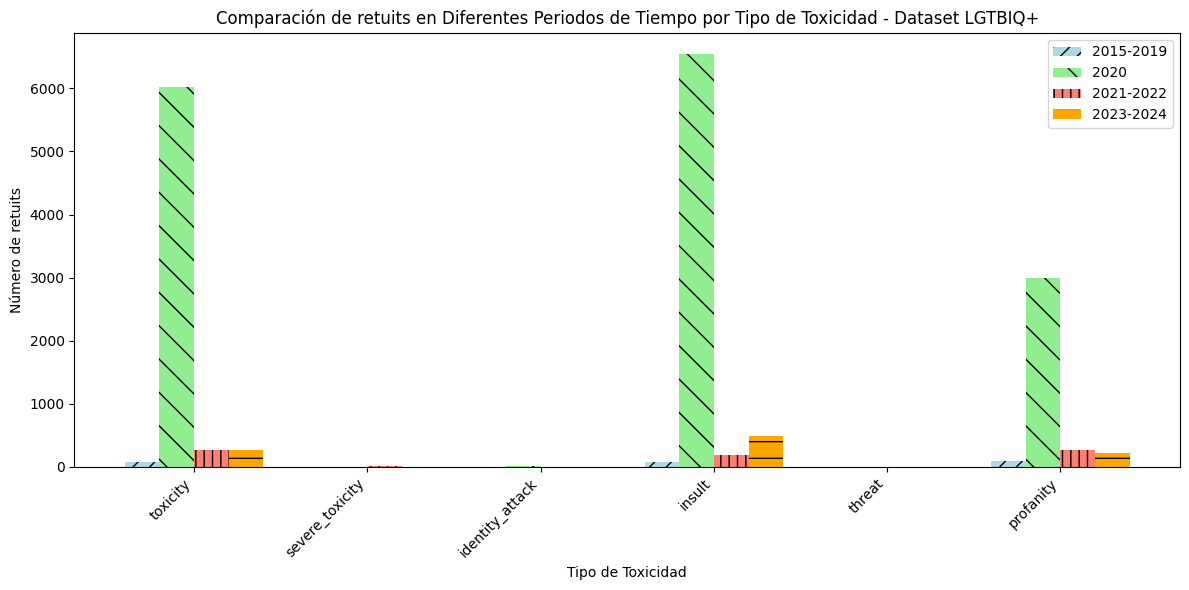

In [72]:
# Calcular la suma de los retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_s = []
rts_2020_s = []
rts_2021_2022_s = []
rts_2023_2024_s = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los retuits para cada columna en los dataframes de los diferentes periodos
    rts_2015_2019_s.append(df_2015_2019[column]['retweetCount'].sum()/5)
    rts_2020_s.append(df_2020[column]['retweetCount'].sum())
    rts_2021_2022_s.append(df_2021_2022[column]['retweetCount'].sum()/2)
    rts_2023_2024_s.append(df_2023_2024[column]['retweetCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para retuits
rects1 = ax.bar(x - width*1.5, rts_2015_2019_s, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_s, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_s, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_s, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de retuits')
ax.set_title('Comparación de retuits en Diferentes Periodos de Tiempo por Tipo de Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [73]:
# Calcular el aumento en los retuits entre los diferentes periodos
aumento_2015_2019_vs_2020_rts = [(rts_2020_s[i] - rts_2015_2019_s[i]) / rts_2015_2019_s[i] * 100 for i in range(len(toxicity_columns))]
aumento_2020_vs_2021_2022_rts = [(rts_2021_2022_s[i] - rts_2020_s[i]) / rts_2020_s[i] * 100 for i in range(len(toxicity_columns))]
aumento_2021_2022_vs_2023_2024_rts = [(rts_2023_2024_s[i] - rts_2021_2022_s[i]) / rts_2021_2022_s[i] * 100 for i in range(len(toxicity_columns))]

# Imprimir los aumentos de retuits
print("Aumento de retuits entre 2015-2019 y 2020:")
print(aumento_2015_2019_vs_2020_rts)

print("\nAumento de retuits entre 2020 y 2021-2022:")
print(aumento_2020_vs_2021_2022_rts)

print("\nAumento de retuits entre 2021-2022 y 2023-2024:")
print(aumento_2021_2022_vs_2023_2024_rts)

Aumento de retuits entre 2015-2019 y 2020:
[8055.826558265582, 149.99999999999997, 471.42857142857144, 7663.03317535545, 149.99999999999997, 3103.4261241970016]

Aumento de retuits entre 2020 y 2021-2022:
[-95.66373151686327, 300.0, -62.5, -97.08485958485959, -100.0, -90.82553475935828]

Aumento de retuits entre 2021-2022 y 2023-2024:
[0.0, -81.25, -33.33333333333333, 154.71204188481676, nan, -21.311475409836063]


C:\Users\mar\AppData\Local\Temp\ipykernel_15628\3479541163.py:4: RuntimeWarning: invalid value encountered in scalar divide
  aumento_2021_2022_vs_2023_2024_rts = [(rts_2023_2024_s[i] - rts_2021_2022_s[i]) / rts_2021_2022_s[i] * 100 for i in range(len(toxicity_columns))]


ahora para apoyo

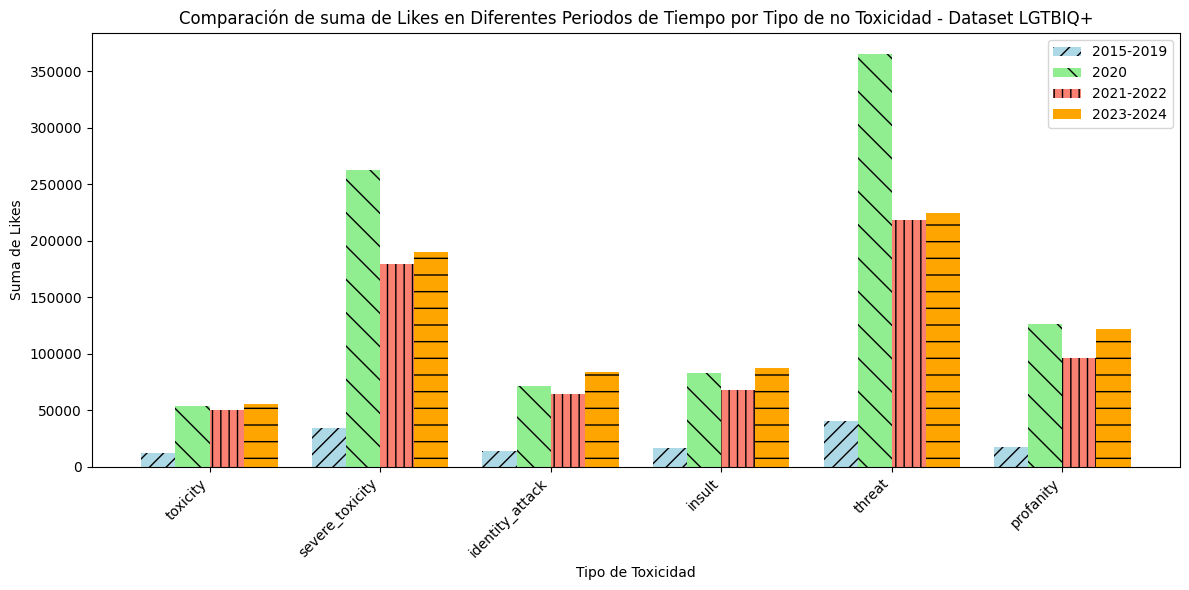

In [74]:
# Calcular la suma de los likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_s_apoyo = []
mgs_2020_s_apoyo = []
mgs_2021_2022_s_apoyo = []
mgs_2023_2024_s_apoyo = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los likes para cada columna en los dataframes de los diferentes periodos
    mgs_2015_2019_s_apoyo.append(df_2015_2019_apoyo[column]['likeCount'].sum()/5)
    mgs_2020_s_apoyo.append(df_2020_apoyo[column]['likeCount'].sum())
    mgs_2021_2022_s_apoyo.append(df_2021_2022_apoyo[column]['likeCount'].sum()/2)
    mgs_2023_2024_s_apoyo.append(df_2023_2024_apoyo[column]['likeCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para likes
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_s_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_s_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_s_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_s_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Suma de Likes')
ax.set_title('Comparación de suma de Likes en Diferentes Periodos de Tiempo por Tipo de no Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

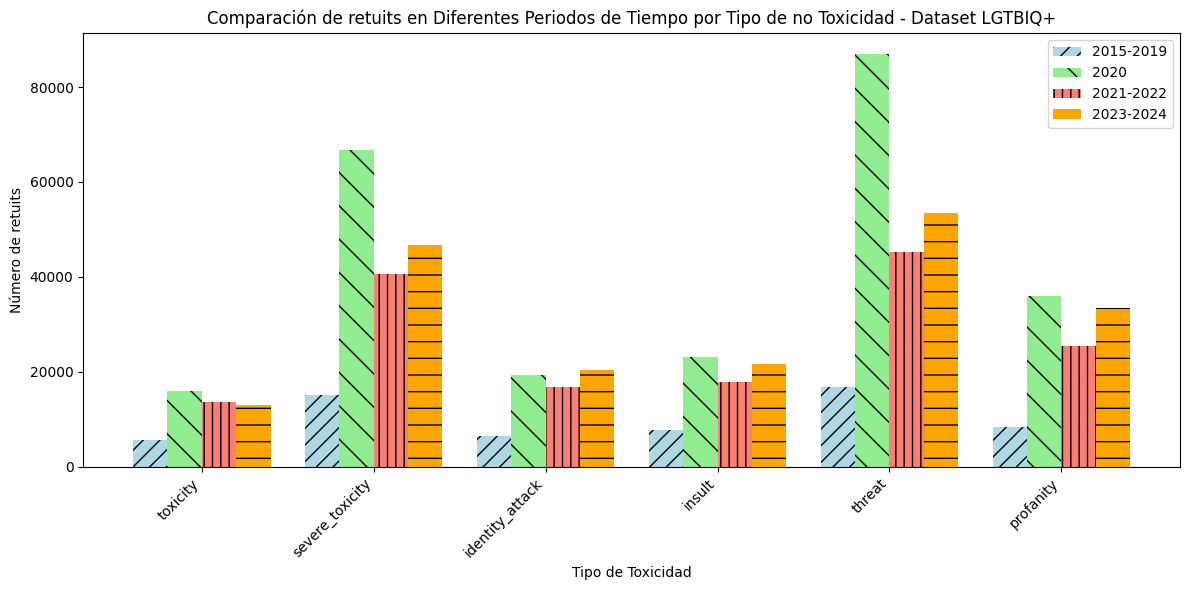

In [75]:
# Calcular la suma de los retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_s_apoyo = []
rts_2020_s_apoyo = []
rts_2021_2022_s_apoyo = []
rts_2023_2024_s_apoyo = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los retuits para cada columna en los dataframes de los diferentes periodos
    rts_2015_2019_s_apoyo.append(df_2015_2019_apoyo[column]['retweetCount'].sum()/5)
    rts_2020_s_apoyo.append(df_2020_apoyo[column]['retweetCount'].sum())
    rts_2021_2022_s_apoyo.append(df_2021_2022_apoyo[column]['retweetCount'].sum()/2)
    rts_2023_2024_s_apoyo.append(df_2023_2024_apoyo[column]['retweetCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para retuits
rects1 = ax.bar(x - width*1.5, rts_2015_2019_s_apoyo, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_s_apoyo, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_s_apoyo, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_s_apoyo, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de retuits')
ax.set_title('Comparación de retuits en Diferentes Periodos de Tiempo por Tipo de no Toxicidad - Dataset LGTBIQ+')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Tóxicos en español

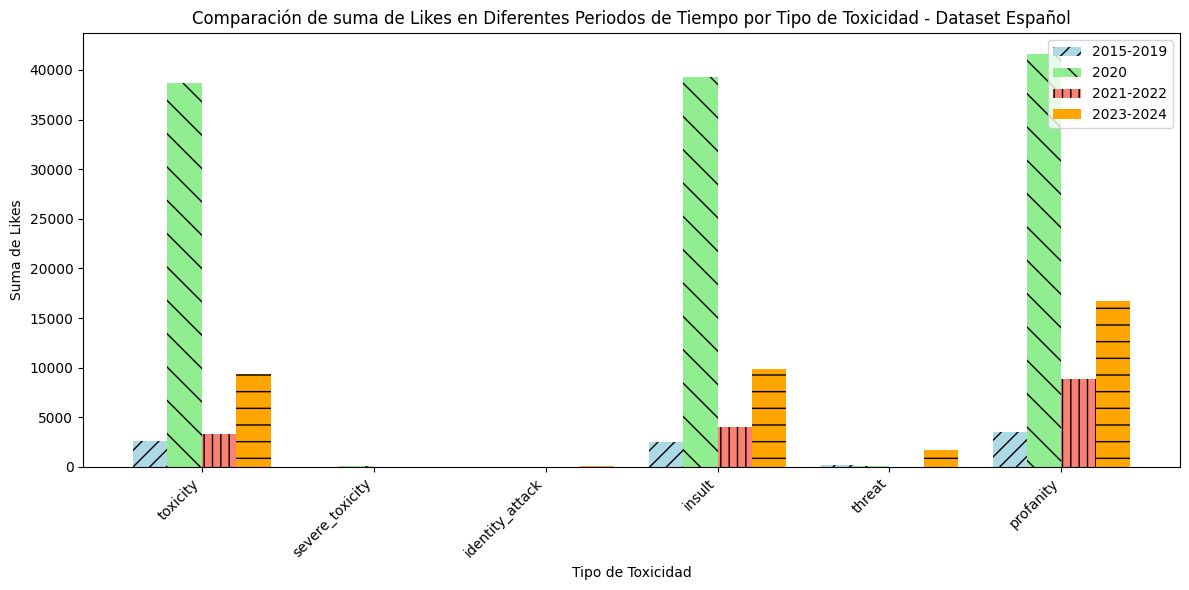

In [76]:
# Calcular la suma de los likes para cada grupo de años y tipo de toxicidad
mgs_2015_2019_s_toe = []
mgs_2020_s_toe = []
mgs_2021_2022_s_toe = []
mgs_2023_2024_s_toe = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los likes para cada columna en los dataframes de los diferentes periodos
    mgs_2015_2019_s_toe.append(df_2015_2019_toe[column]['likeCount'].sum()/5)
    mgs_2020_s_toe.append(df_2020_toe[column]['likeCount'].sum())
    mgs_2021_2022_s_toe.append(df_2021_2022_toe[column]['likeCount'].sum()/2)
    mgs_2023_2024_s_toe.append(df_2023_2024_toe[column]['likeCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para likes
rects1 = ax.bar(x - width*1.5, mgs_2015_2019_s_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, mgs_2020_s_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, mgs_2021_2022_s_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, mgs_2023_2024_s_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Suma de Likes')
ax.set_title('Comparación de suma de Likes en Diferentes Periodos de Tiempo por Tipo de Toxicidad - Dataset Español')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

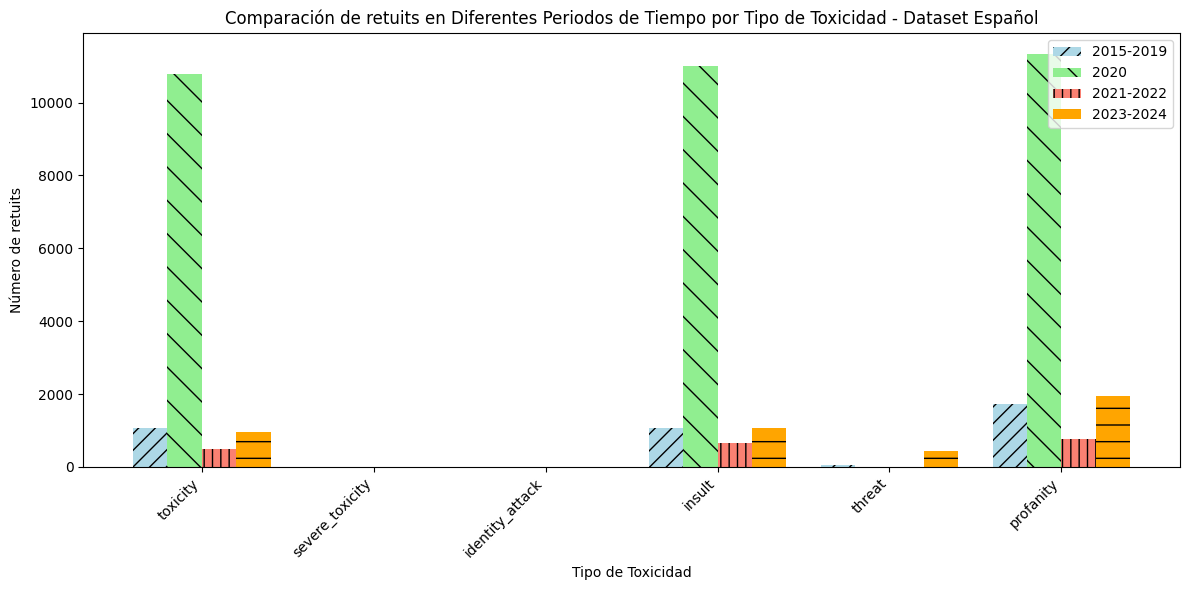

In [77]:
# Calcular la suma de los retuits para cada grupo de años y tipo de toxicidad
rts_2015_2019_s_toe = []
rts_2020_s_toe = []
rts_2021_2022_s_toe = []
rts_2023_2024_s_toe = []

# Iterar sobre las columnas de toxicidad
for column in toxicity_columns:
    # Sumar los retuits para cada columna en los dataframes de los diferentes periodos
    rts_2015_2019_s_toe.append(df_2015_2019_toe[column]['retweetCount'].sum()/5)
    rts_2020_s_toe.append(df_2020_toe[column]['retweetCount'].sum())
    rts_2021_2022_s_toe.append(df_2021_2022_toe[column]['retweetCount'].sum()/2)
    rts_2023_2024_s_toe.append(df_2023_2024_toe[column]['retweetCount'].sum()/2)

# Configuración de las posiciones de las barras
x = np.arange(len(toxicity_columns))  # Número de barras (nombres de columnas)
width = 0.2  # Ancho de las barras

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras para cada grupo de años para retuits
rects1 = ax.bar(x - width*1.5, rts_2015_2019_s_toe, width, label='2015-2019', color='lightblue', hatch='//')
rects2 = ax.bar(x - width/2, rts_2020_s_toe, width, label='2020', color='lightgreen', hatch='\\')
rects3 = ax.bar(x + width/2, rts_2021_2022_s_toe, width, label='2021-2022', color='salmon', hatch='||')
rects4 = ax.bar(x + width*1.5, rts_2023_2024_s_toe, width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Toxicidad')
ax.set_ylabel('Número de retuits')
ax.set_title('Comparación de retuits en Diferentes Periodos de Tiempo por Tipo de Toxicidad - Dataset Español')
ax.set_xticks(x)
ax.set_xticklabels(toxicity_columns, rotation=45, ha='right')
ax.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Dataset LGTBIQ+ en general

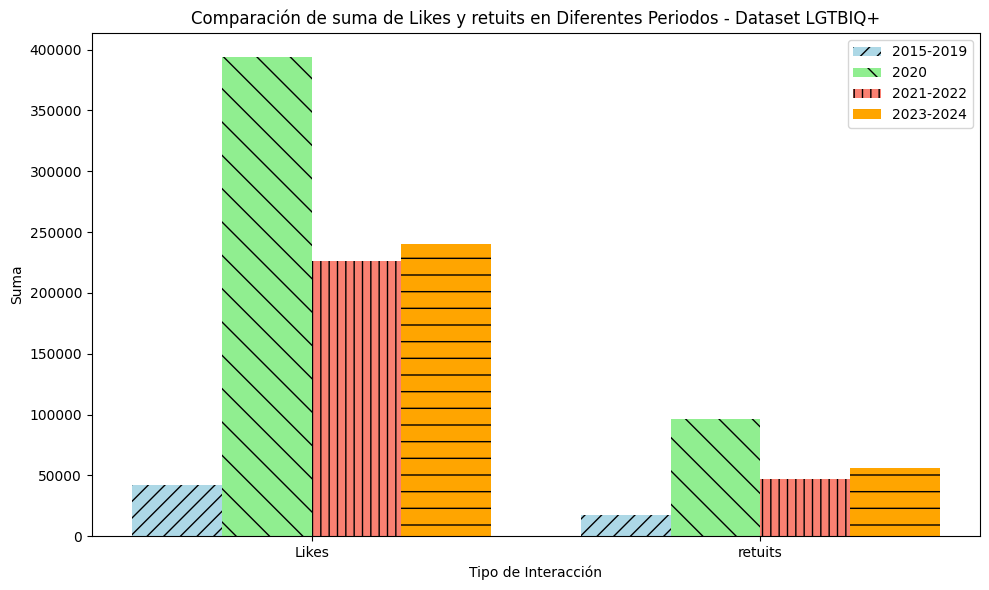

In [78]:
# Calcular la media de likes y retuits para cada grupo de años
mgs_2015_2019_o_sum = df_2015_2019_o['likeCount'].sum() / 5
mgs_2020_o_sum = df_2020_o['likeCount'].sum()
mgs_2021_2022_o_sum = df_2021_2022_o['likeCount'].sum() / 2
mgs_2023_2024_o_sum = df_2023_2024_o['likeCount'].sum() / 2

rts_2015_2019_o_sum = df_2015_2019_o['retweetCount'].sum() / 5
rts_2020_o_sum = df_2020_o['retweetCount'].sum() 
rts_2021_2022_o_sum = df_2021_2022_o['retweetCount'].sum() / 2
rts_2023_2024_o_sum = df_2023_2024_o['retweetCount'].sum() / 2

# Crear la figura para la comparación de likes y retuits
x2 = np.arange(2)  # Dos barras para Likes y retuits
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Crear las barras para cada grupo de años para likes y retuits
rects5 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_o_sum, rts_2015_2019_o_sum], width, label='2015-2019', color='lightblue', hatch='//')
rects6 = ax2.bar(x2 - width/2, [mgs_2020_o_sum, rts_2020_o_sum], width, label='2020', color='lightgreen', hatch='\\')
rects7 = ax2.bar(x2 + width/2, [mgs_2021_2022_o_sum, rts_2021_2022_o_sum], width, label='2021-2022', color='salmon', hatch='||')
rects8 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_o_sum, rts_2023_2024_o_sum], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 2
ax2.set_xlabel('Tipo de Interacción')
ax2.set_ylabel('Suma')
ax2.set_title('Comparación de suma de Likes y retuits en Diferentes Periodos - Dataset LGTBIQ+')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Likes', 'retuits'])
ax2.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()

In [79]:
aumento_2015_2019_vs_2020_likes = (mgs_2020_o_sum - mgs_2015_2019_o_sum) / mgs_2015_2019_o_sum * 100
aumento_2020_vs_2021_2022_likes = (mgs_2021_2022_o_sum - mgs_2020_o_sum) / mgs_2020_o_sum * 100
aumento_2021_2022_vs_2023_2024_likes = (mgs_2023_2024_o_sum - mgs_2021_2022_o_sum) / mgs_2021_2022_o_sum * 100

# Calcular el aumento en los retuits entre los diferentes periodos
aumento_2015_2019_vs_2020_rts = (rts_2020_o_sum - rts_2015_2019_o_sum) / rts_2015_2019_o_sum * 100
aumento_2020_vs_2021_2022_rts = (rts_2021_2022_o_sum - rts_2020_o_sum) / rts_2020_o_sum * 100
aumento_2021_2022_vs_2023_2024_rts = (rts_2023_2024_o_sum - rts_2021_2022_o_sum) / rts_2021_2022_o_sum * 100

# Imprimir los aumentos
print("Aumento de Likes entre 2015-2019 y 2020:")
print(f"{aumento_2015_2019_vs_2020_likes:.2f}%")

print("\nAumento de Likes entre 2020 y 2021-2022:")
print(f"{aumento_2020_vs_2021_2022_likes:.2f}%")

print("\nAumento de Likes entre 2021-2022 y 2023-2024:")
print(f"{aumento_2021_2022_vs_2023_2024_likes:.2f}%")

print("\nAumento de Retuits entre 2015-2019 y 2020:")
print(f"{aumento_2015_2019_vs_2020_rts:.2f}%")

print("\nAumento de Retuits entre 2020 y 2021-2022:")
print(f"{aumento_2020_vs_2021_2022_rts:.2f}%")

print("\nAumento de Retuits entre 2021-2022 y 2023-2024:")
print(f"{aumento_2021_2022_vs_2023_2024_rts:.2f}%")

Aumento de Likes entre 2015-2019 y 2020:
844.69%

Aumento de Likes entre 2020 y 2021-2022:
-42.63%

Aumento de Likes entre 2021-2022 y 2023-2024:
6.37%

Aumento de Retuits entre 2015-2019 y 2020:
451.10%

Aumento de Retuits entre 2020 y 2021-2022:
-50.94%

Aumento de Retuits entre 2021-2022 y 2023-2024:
19.37%


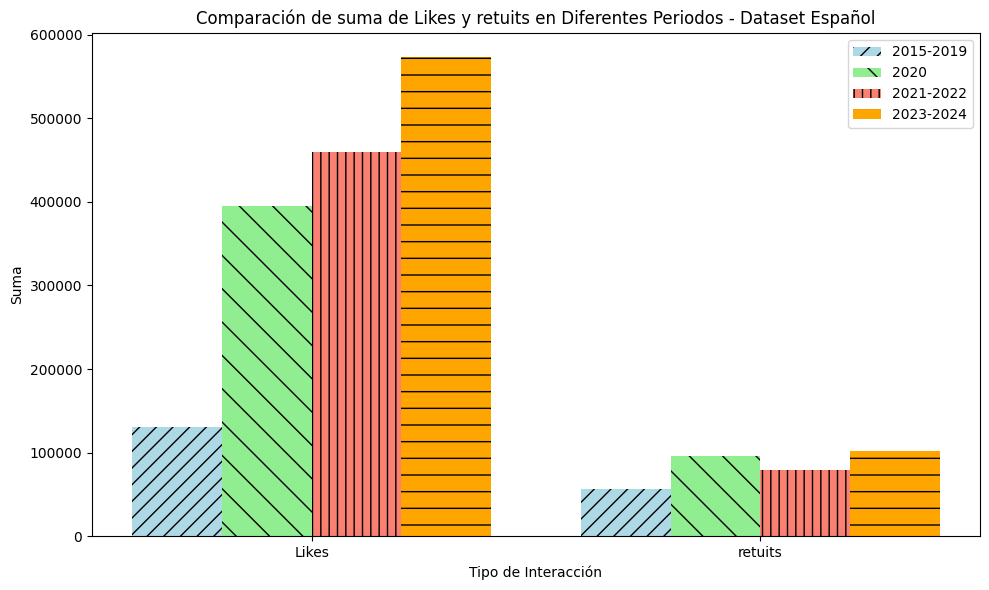

In [80]:
# Calcular la media de likes y retuits para cada grupo de años
mgs_2015_2019_e_sum = df_2015_2019_e['likeCount'].sum() / 5
mgs_2020_e_sum = df_2020_e['likeCount'].sum()
mgs_2021_2022_e_sum = df_2021_2022_e['likeCount'].sum() / 2
mgs_2023_2024_e_sum = df_2023_2024_e['likeCount'].sum() / 2

rts_2015_2019_e_sum = df_2015_2019_e['retweetCount'].sum() / 5
rts_2020_e_sum = df_2020_e['retweetCount'].sum() 
rts_2021_2022_e_sum = df_2021_2022_e['retweetCount'].sum() / 2
rts_2023_2024_e_sum = df_2023_2024_e['retweetCount'].sum() / 2

# Crear la figura para la comparación de likes y retuits
x2 = np.arange(2)  # Dos barras para Likes y retuits
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Crear las barras para cada grupo de años para likes y retuits
rects5 = ax2.bar(x2 - width*1.5, [mgs_2015_2019_e_sum, rts_2015_2019_e_sum], width, label='2015-2019', color='lightblue', hatch='//')
rects6 = ax2.bar(x2 - width/2, [mgs_2020_e_sum, rts_2020_e_sum], width, label='2020', color='lightgreen', hatch='\\')
rects7 = ax2.bar(x2 + width/2, [mgs_2021_2022_e_sum, rts_2021_2022_e_sum], width, label='2021-2022', color='salmon', hatch='||')
rects8 = ax2.bar(x2 + width*1.5, [mgs_2023_2024_e_sum, rts_2023_2024_e_sum], width, label='2023-2024', color='orange', hatch='-')

# Añadir etiquetas y título para la figura 2
ax2.set_xlabel('Tipo de Interacción')
ax2.set_ylabel('Suma')
ax2.set_title('Comparación de suma de Likes y retuits en Diferentes Periodos - Dataset Español')
ax2.set_xticks(x2)
ax2.set_xticklabels(['Likes', 'retuits'])
ax2.legend()

# Ajustar el layout para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()

In [81]:
# Calcular el aumento en los likes entre los diferentes periodos
aumento_2015_2019_vs_2020_likes_e = (mgs_2020_e_sum - mgs_2015_2019_e_sum) / mgs_2015_2019_e_sum * 100
aumento_2020_vs_2021_2022_likes_e = (mgs_2021_2022_e_sum - mgs_2020_e_sum) / mgs_2020_e_sum * 100
aumento_2021_2022_vs_2023_2024_likes_e = (mgs_2023_2024_e_sum - mgs_2021_2022_e_sum) / mgs_2021_2022_e_sum * 100

# Calcular el aumento en los retuits entre los diferentes periodos
aumento_2015_2019_vs_2020_rts_e = (rts_2020_e_sum - rts_2015_2019_e_sum) / rts_2015_2019_e_sum * 100
aumento_2020_vs_2021_2022_rts_e = (rts_2021_2022_e_sum - rts_2020_e_sum) / rts_2020_e_sum * 100
aumento_2021_2022_vs_2023_2024_rts_e = (rts_2023_2024_e_sum - rts_2021_2022_e_sum) / rts_2021_2022_e_sum * 100

# Imprimir los aumentos de likes y retuits
print("Aumento de Likes entre 2015-2019 y 2020 (Dataset Español):")
print(f"{aumento_2015_2019_vs_2020_likes_e:.2f}%")

print("\nAumento de Likes entre 2020 y 2021-2022 (Dataset Español):")
print(f"{aumento_2020_vs_2021_2022_likes_e:.2f}%")

print("\nAumento de Likes entre 2021-2022 y 2023-2024 (Dataset Español):")
print(f"{aumento_2021_2022_vs_2023_2024_likes_e:.2f}%")

print("\nAumento de Retuits entre 2015-2019 y 2020 (Dataset Español):")
print(f"{aumento_2015_2019_vs_2020_rts_e:.2f}%")

print("\nAumento de Retuits entre 2020 y 2021-2022 (Dataset Español):")
print(f"{aumento_2020_vs_2021_2022_rts_e:.2f}%")

print("\nAumento de Retuits entre 2021-2022 y 2023-2024 (Dataset Español):")
print(f"{aumento_2021_2022_vs_2023_2024_rts_e:.2f}%")

Aumento de Likes entre 2015-2019 y 2020 (Dataset Español):
203.22%

Aumento de Likes entre 2020 y 2021-2022 (Dataset Español):
16.42%

Aumento de Likes entre 2021-2022 y 2023-2024 (Dataset Español):
24.76%

Aumento de Retuits entre 2015-2019 y 2020 (Dataset Español):
69.97%

Aumento de Retuits entre 2020 y 2021-2022 (Dataset Español):
-17.21%

Aumento de Retuits entre 2021-2022 y 2023-2024 (Dataset Español):
29.47%
